In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle
import re

# New Section

In [127]:
# df = pd.read_excel('/content/Site Visit All Details-2024-09-19-19-03-16.xlsx')

In [128]:
# df = pd.read_excel('/content/Site Visit All Details-2024-10-10-11-06-25_Kunal.xlsx')

In [129]:
# df = pd.read_excel('/content/2023_Data Points.xlsx')

In [130]:
# df = pd.read_excel(r'C:\Users\lti-10761456\Desktop\Marketing.Ai_New\Model_pred\Site Visit All Details-2024-12-03-12-36-21.xlsx')

In [131]:
# df = pd.read_excel(r'C:\Users\lti-10761456\Desktop\Marketing.Ai_New\Model_pred\10days\Site Visit All Details-2025-01-02-14-32-38.xlsx')

In [132]:
# df = pd.read_excel(r'C:\Users\lti-10761456\Desktop\Marketing.Ai_New\Model_pred\Site Visit All Details - 2025-01-03-09-51-28_trail.xlsx')

In [133]:
# df = pd.read_excel(r'C:\Users\lti-10761456\Desktop\Marketing.Ai_New\Model_pred\Site Visit All Details-2025-01-03-11-42-03_trail _3.xlsx')

In [134]:
# df = pd.read_excel(r'C:\Users\lti-10761456\Desktop\Marketing.Ai_New\Model_pred\Site Visit All Details-2025-01-07-12-10-34_trail_4.xlsx')

In [135]:
# df = pd.read_excel(r'c:\Users\lti-10761456\Desktop\Marketing.Ai_New_2\Model_pred\Site Visit All Details-2025-01-14-11-16-07_trail_5.xlsx')

In [136]:
df = pd.read_excel(r'c:\Users\lti-10761456\Desktop\Marketing.Ai_New_2\Model_pred\Site Visit All Details-2025-01-14-11-16-07_trail_5.xlsx')

In [137]:
df.head()



Project: Project Name Site Visit Name Created Date Walkin Date  \
0        Elixir Reserve        SV-37487     4/1/2025    4/1/2025   
1              Centrona        SV-37488     4/1/2025    4/1/2025   
2           THE GATEWAY        SV-37489     4/1/2025    4/1/2025   
3              Centrona        SV-37490     4/1/2025    4/1/2025   
4              Centrona        SV-37493     4/1/2025    4/1/2025   

  Permanent Zip/Postal Code Are you associated with L&T?  Age  Gender  \
0                    560023                          NaN   50  Female   
1                    400708                          NaN   41    Male   
2                    400053                          NaN   36    Male   
3                    400076                          NaN   58    Male   
4                    431602                          NaN   38    Male   

  Nature of Purchase Current Residential Type  ...  \
0           Self-use                    Owned  ...   
1           Self-use                    Owned  ...   
2         Investment                   Rented  ...   
3           Self-use                    Owned  ...   
4           Self-use                    Owned  ...   

  Associated Account: Account Name Referred by Account: Account Name  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   

  No of revisit Last Modified Date Number of Activity      Lead Source  \
0             0           6/1/2025                  5  Channel Partner   
1             0          11/1/2025                  8  Channel Partner   
2             0           6/1/2025                  2          Website   
3             0          10/1/2025                  3  Channel Partner   
4             0           5/1/2025                  1  Channel Partner   

  Office Location  Organization         Account Name  \
0              Na            Na             Kejriwal   
1              Na            Na              krishna   
2             NaN          Abcd              Karan P   
3             NaN    Electrical        P b choudhary   
4             NaN          MCGM  Dr Pradeep kapsiker   

                     Channel Partner: Account Name  
0                  PROPSOLUTIONS4U PRIVATE LIMITED  
1                   Home Bazaar Services Pvt. Ltd.  
2                                              NaN  
3  Nobroker Technologies Solutions Private Limited  
4                                  Kaustubh yelkar  

[5 rows x 39 columns]

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Project: Project Name              599 non-null    object 
 1   Site Visit Name                    599 non-null    object 
 2   Created Date                       599 non-null    object 
 3   Walkin Date                        599 non-null    object 
 4   Permanent Zip/Postal Code          599 non-null    object 
 5   Are you associated with L&T?       3 non-null      object 
 6   Age                                599 non-null    int64  
 7   Gender                             599 non-null    object 
 8   Nature of Purchase                 599 non-null    object 
 9   Current Residential Type           599 non-null    object 
 10  Home Loan Status                   599 non-null    object 
 11  Occupation                         599 non-null    object 

In [139]:
df.describe()

Age      Budget  Desired Carpet Area  Actual Budget  \
count  599.000000  599.000000           599.000000     599.000000   
mean    43.273790    2.991235           956.010017       1.709482   
std      9.299468    2.149518           407.821449       1.941989   
min     24.000000    0.250000           500.000000       0.000000   
25%     37.000000    1.500000           650.000000       0.000000   
50%     42.000000    2.500000           850.000000       1.490000   
75%     48.000000    4.000000          1200.000000       2.550000   
max     80.000000   15.500000          2000.000000      15.000000   

       Referred by Account: Account Name  No of revisit  Number of Activity  
count                                0.0     599.000000          599.000000  
mean                                 NaN       0.186978            2.789649  
std                                  NaN       0.571126            2.186725  
min                                  NaN       0.000000            1.000000  
25%                                  NaN       0.000000            2.000000  
50%                                  NaN       0.000000            2.000000  
75%                                  NaN       0.000000            3.000000  
max                                  NaN       6.000000           18.000000

In [140]:
null = df.isnull().sum() / df.shape[0] * 100
null

Project: Project Name                  0.000000
Site Visit Name                        0.000000
Created Date                           0.000000
Walkin Date                            0.000000
Permanent Zip/Postal Code              0.000000
Are you associated with L&T?          99.499165
Age                                    0.000000
Gender                                 0.000000
Nature of Purchase                     0.000000
Current Residential Type               0.000000
Home Loan Status                       0.000000
Occupation                             0.000000
Company Name                          29.549249
Designation                            7.846411
Industry                               0.000000
Possession Required                    0.000000
Configuration                          0.000000
Budget                                 0.000000
Desired Carpet Area                    0.000000
Cultural Background                    0.000000
Office location                       23

In [141]:
# Save the DataFrame to a CSV file
null.to_csv('null3.csv', index=True)

In [142]:
missing_percentage = df.isnull().sum() / df.shape[0] * 100
columns_to_drop = missing_percentage[missing_percentage > 15].index

print("Columns with more than 15% missing values:", columns_to_drop)

Columns with more than 15% missing values: Index(['Are you associated with L&T?', 'Company Name', 'Office location',
       'ICs', 'Associated Account: Account Name',
       'Referred by Account: Account Name', 'Office Location',
       'Channel Partner: Account Name'],
      dtype='object')


No. of columns drop add krna

In [143]:
df = df.drop(columns=columns_to_drop)
df.transpose()
vishal = df.transpose()

In [144]:
df.columns

Index(['Project: Project Name', 'Site Visit Name', 'Created Date',
       'Walkin Date', 'Permanent Zip/Postal Code', 'Age', 'Gender',
       'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
       'Occupation', 'Designation', 'Industry', 'Possession Required',
       'Configuration', 'Budget', 'Desired Carpet Area', 'Cultural Background',
       'Actual Budget', 'Address details', 'Tower/Unit pitched',
       'Visited with Family', 'Task Status', 'Primary Reason', 'Remarks',
       'No of revisit', 'Last Modified Date', 'Number of Activity',
       'Lead Source', 'Organization', 'Account Name'],
      dtype='object')

In [145]:
if 'Primary Reason' in df.columns:
    df.drop(columns=['Primary Reason'], inplace=True)

In [146]:
df.columns

Index(['Project: Project Name', 'Site Visit Name', 'Created Date',
       'Walkin Date', 'Permanent Zip/Postal Code', 'Age', 'Gender',
       'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
       'Occupation', 'Designation', 'Industry', 'Possession Required',
       'Configuration', 'Budget', 'Desired Carpet Area', 'Cultural Background',
       'Actual Budget', 'Address details', 'Tower/Unit pitched',
       'Visited with Family', 'Task Status', 'Remarks', 'No of revisit',
       'Last Modified Date', 'Number of Activity', 'Lead Source',
       'Organization', 'Account Name'],
      dtype='object')

                          Age    Budget  Desired Carpet Area  Actual Budget  \
Age                  1.000000  0.121652             0.168310       0.099217   
Budget               0.121652  1.000000             0.758427       0.370338   
Desired Carpet Area  0.168310  0.758427             1.000000       0.405157   
Actual Budget        0.099217  0.370338             0.405157       1.000000   
No of revisit       -0.029176  0.058207             0.092450       0.129751   
Number of Activity   0.040582  0.115142             0.082801       0.007822   

                     No of revisit  Number of Activity  
Age                      -0.029176            0.040582  
Budget                    0.058207            0.115142  
Desired Carpet Area       0.092450            0.082801  
Actual Budget             0.129751            0.007822  
No of revisit             1.000000            0.560441  
Number of Activity        0.560441            1.000000  


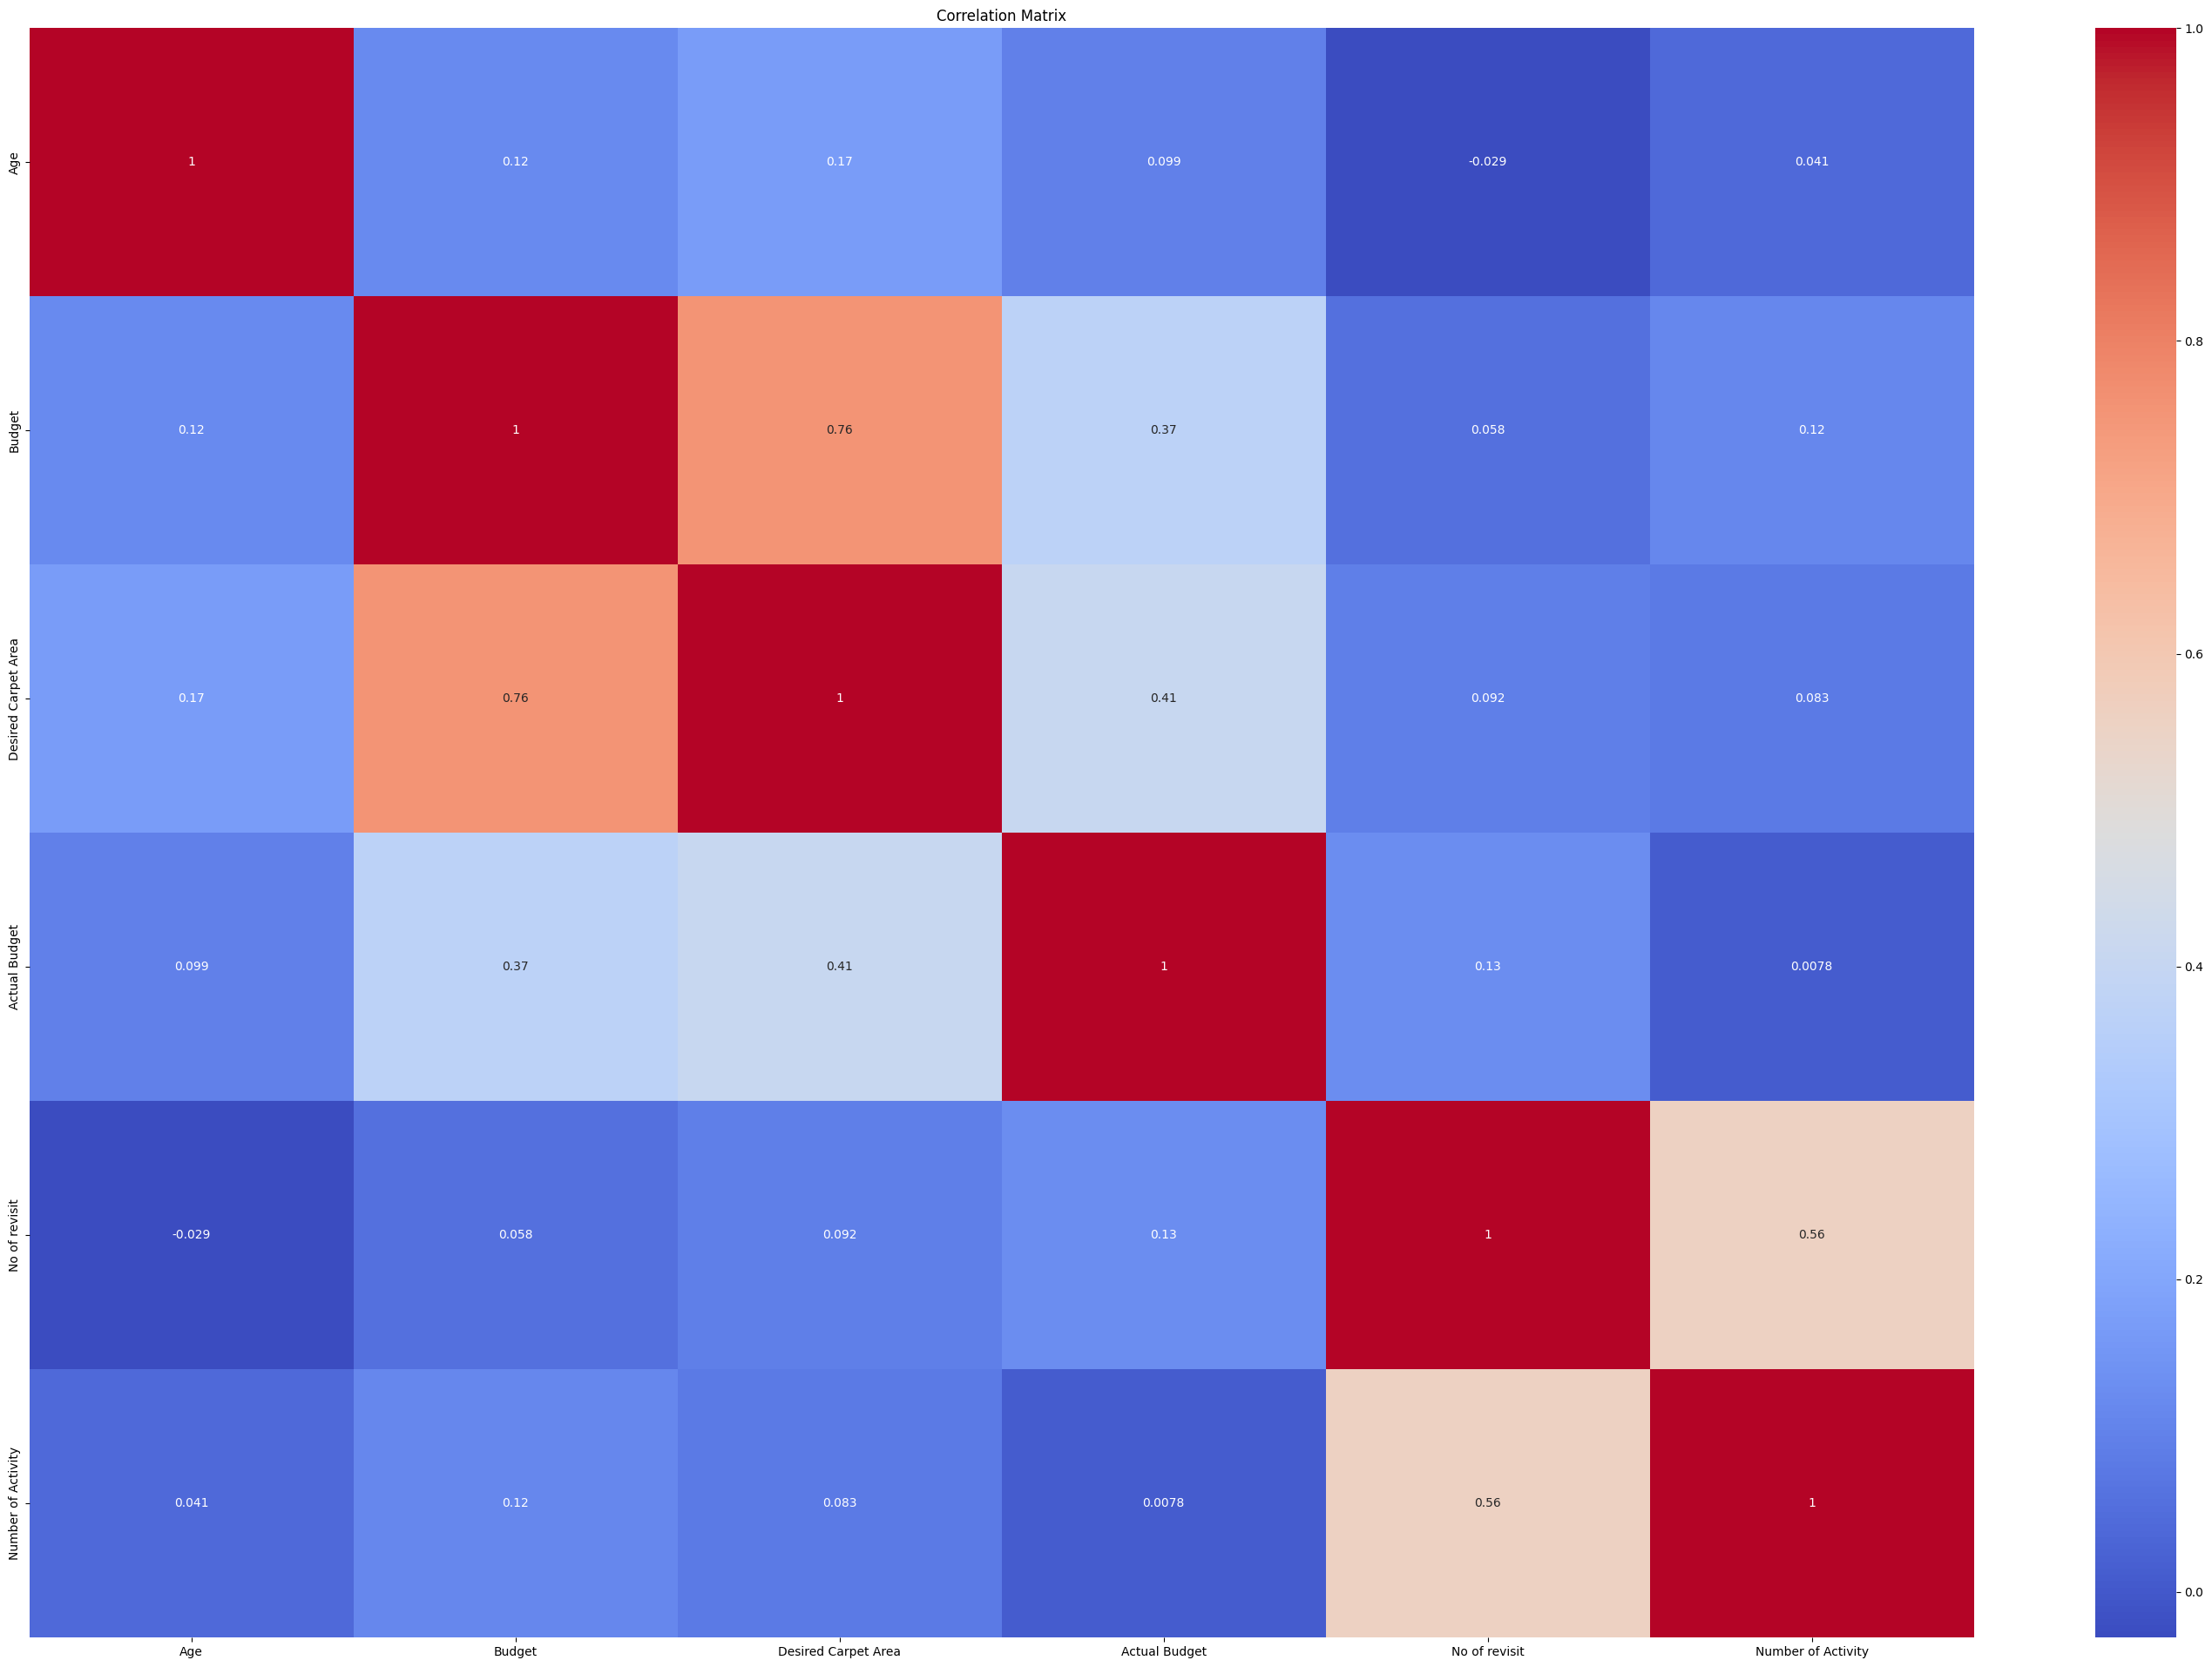

<Figure size 1600x800 with 0 Axes>

In [147]:
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlation matrix using the numeric DataFrame
correlation_matrix = numerical_df.corr()

# Proceed with printing and visualizing the correlation matrix
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.figure(figsize=(16,8))
plt.show()

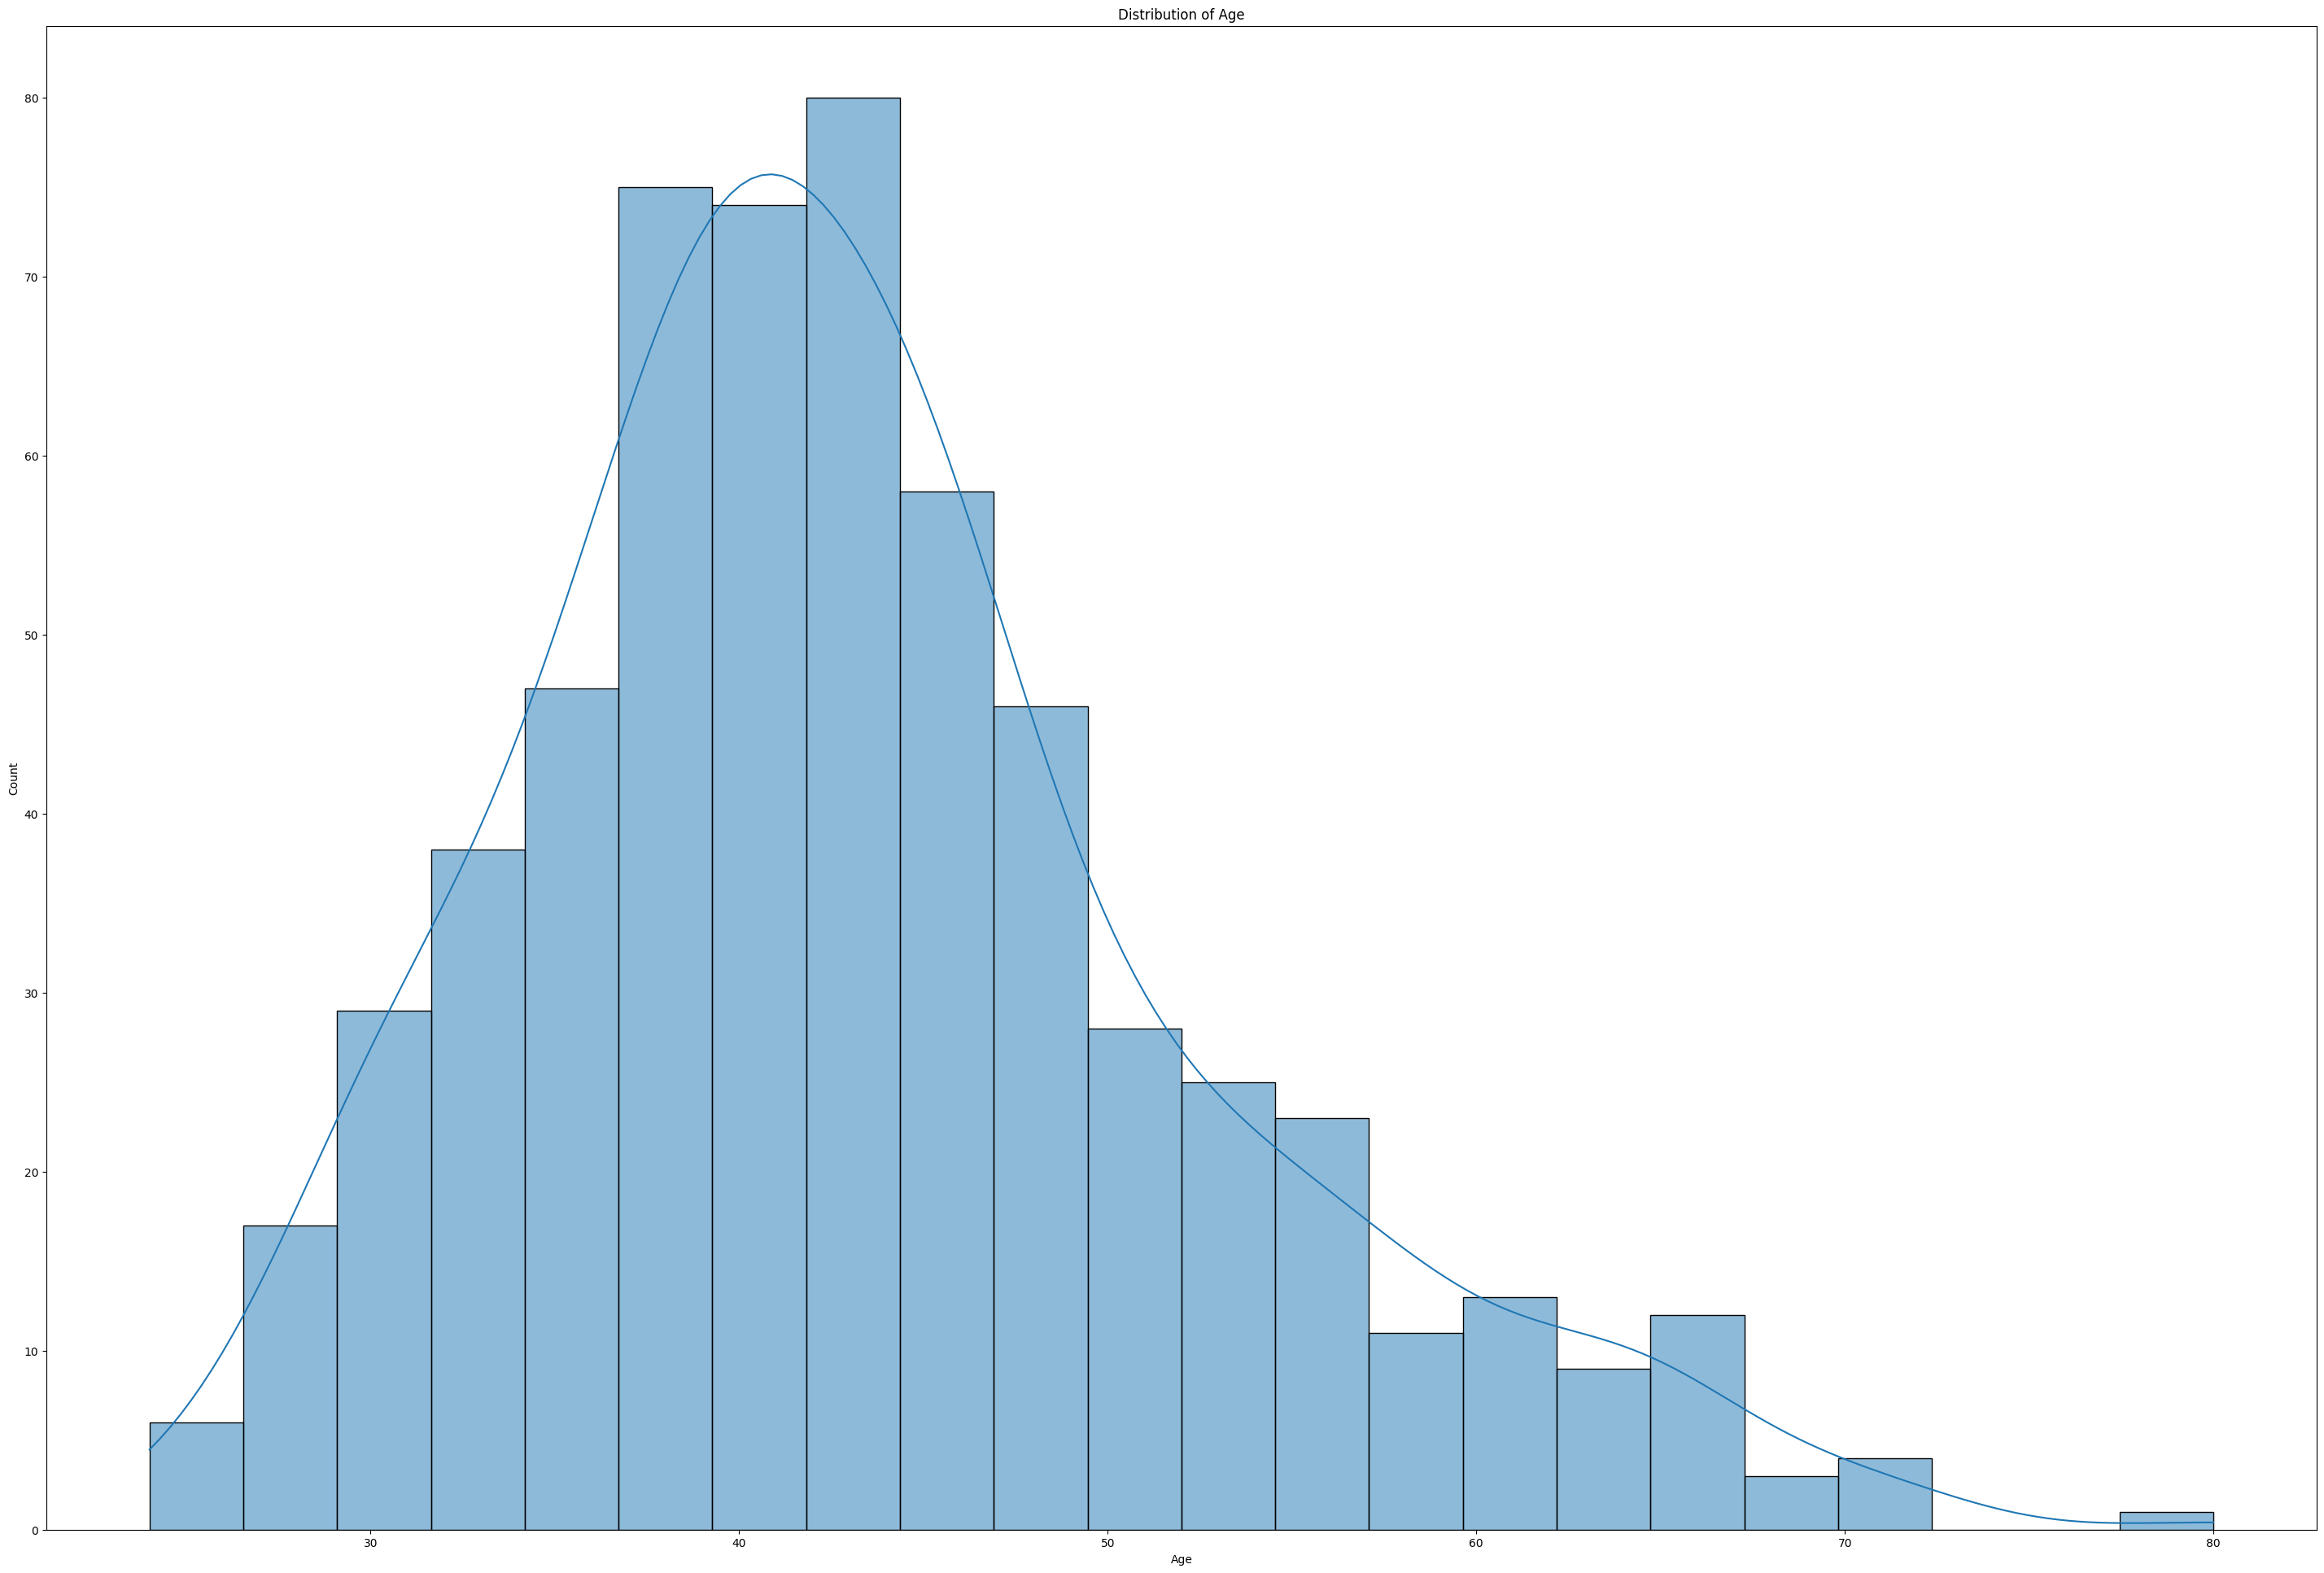

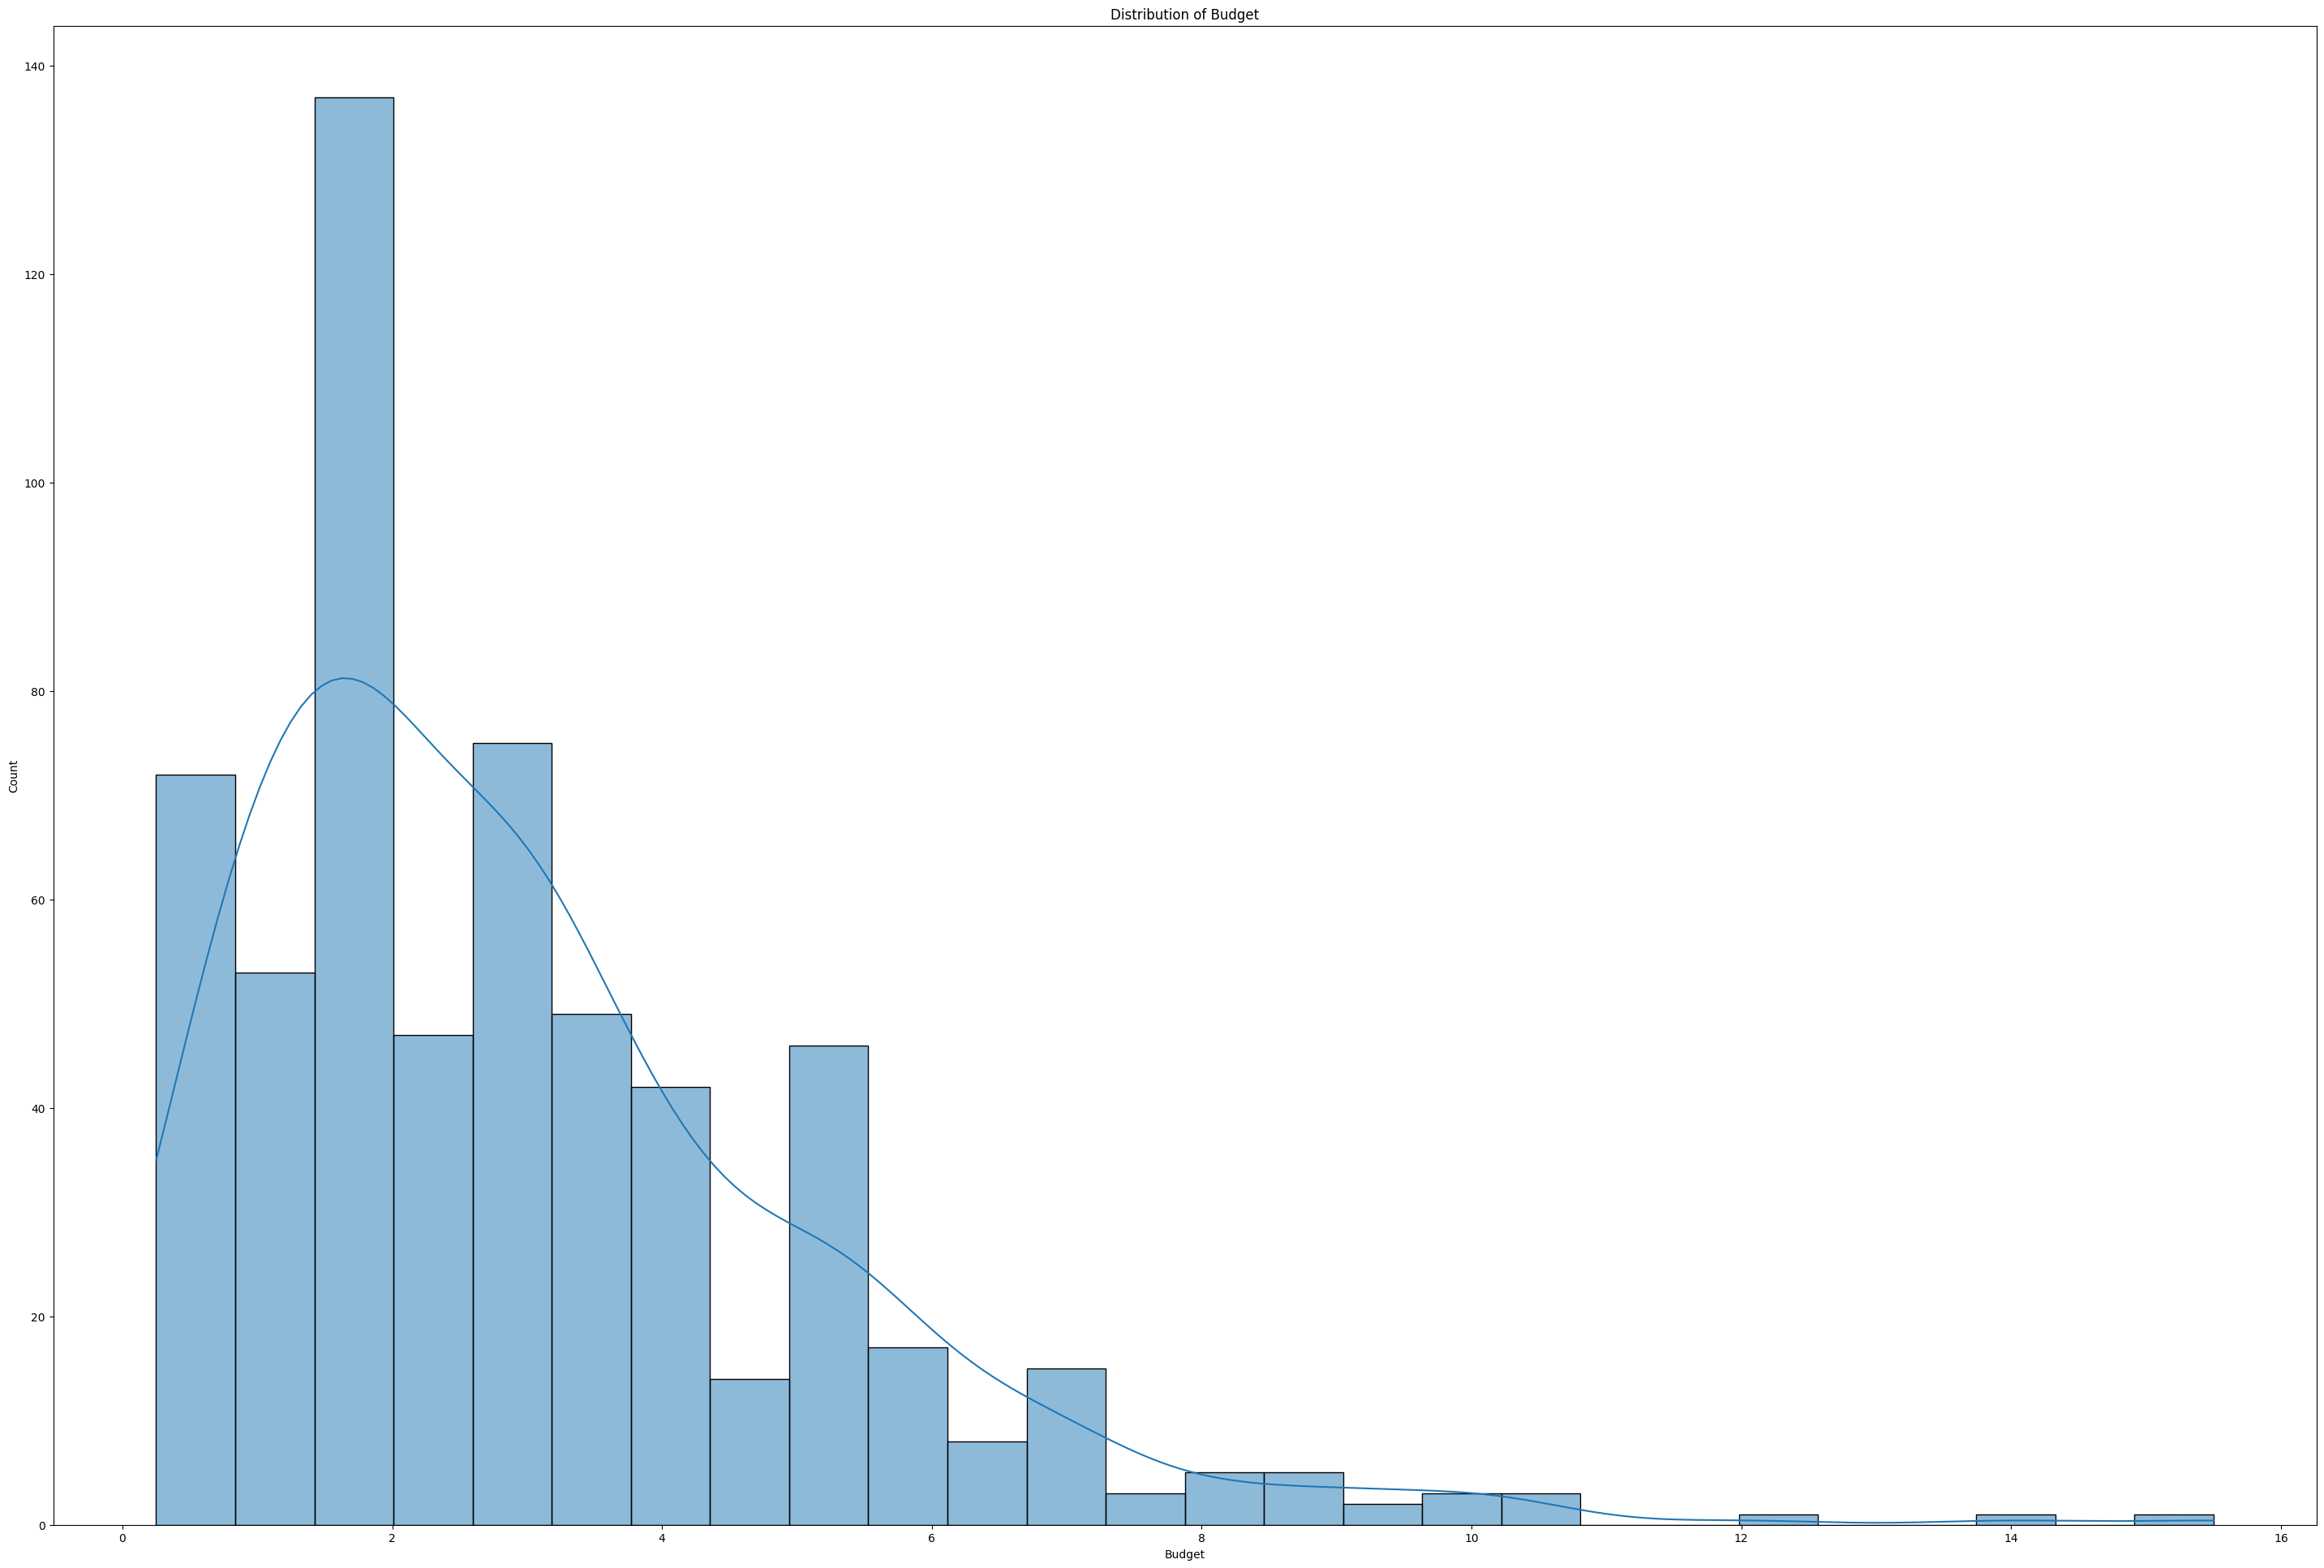

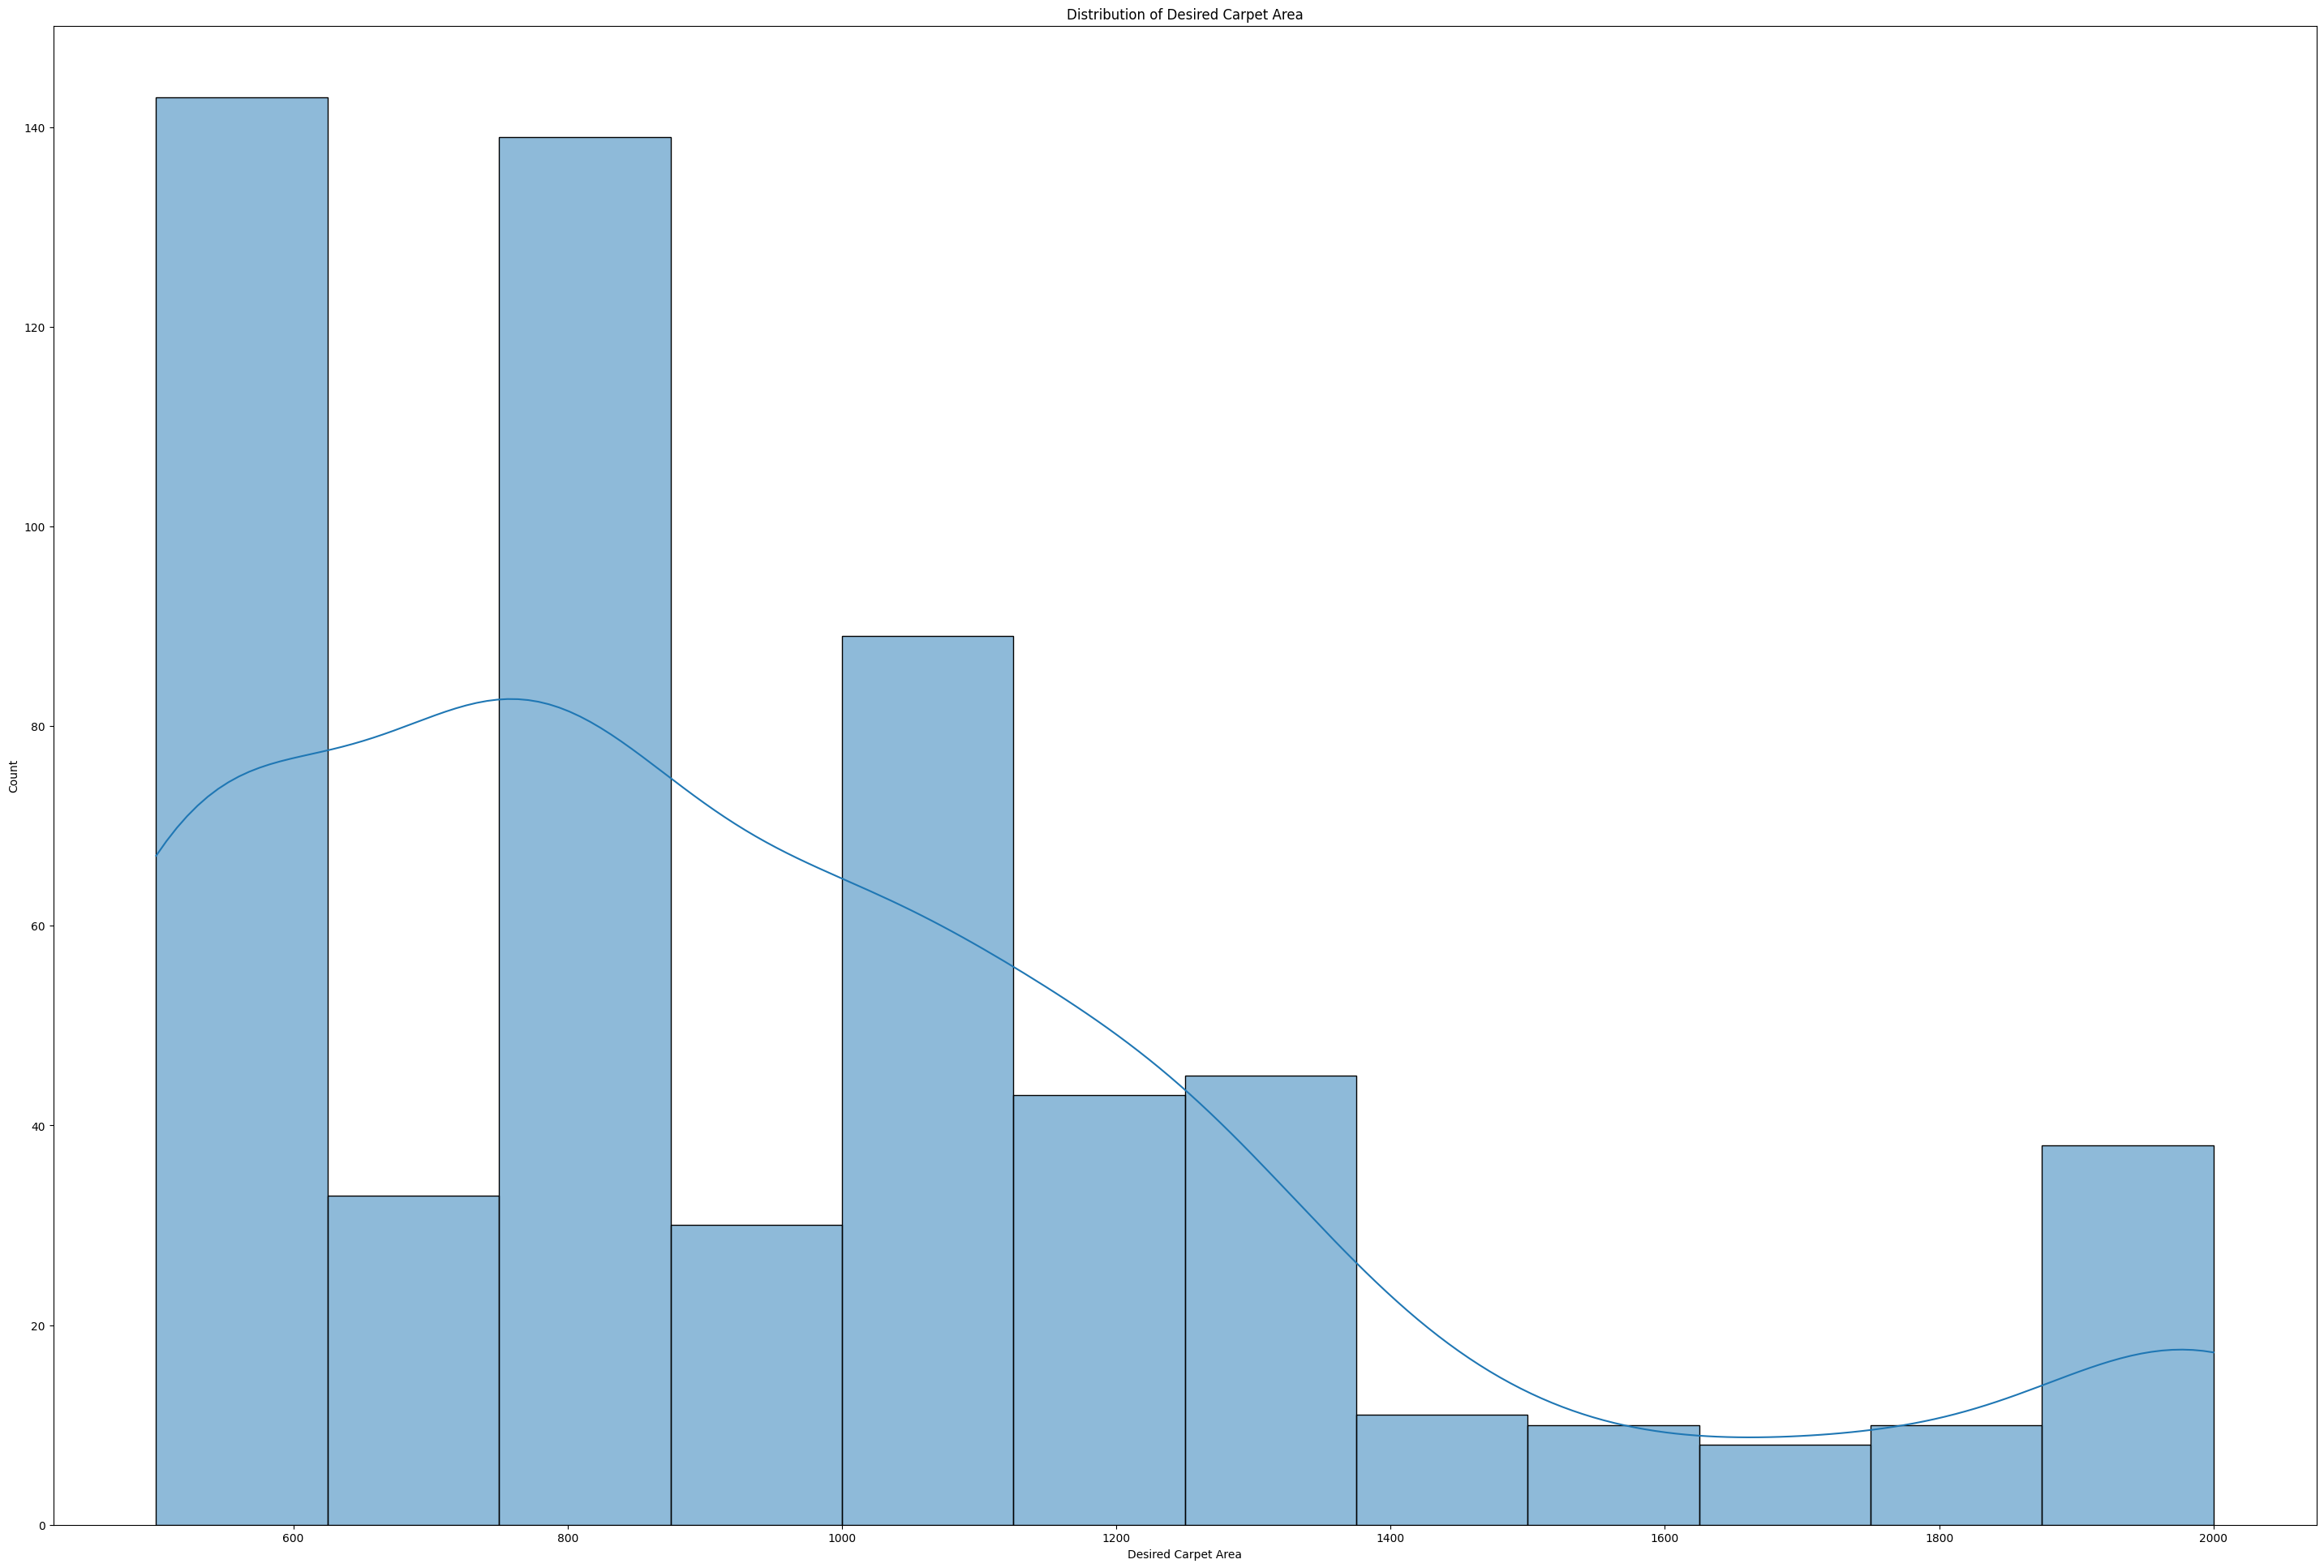

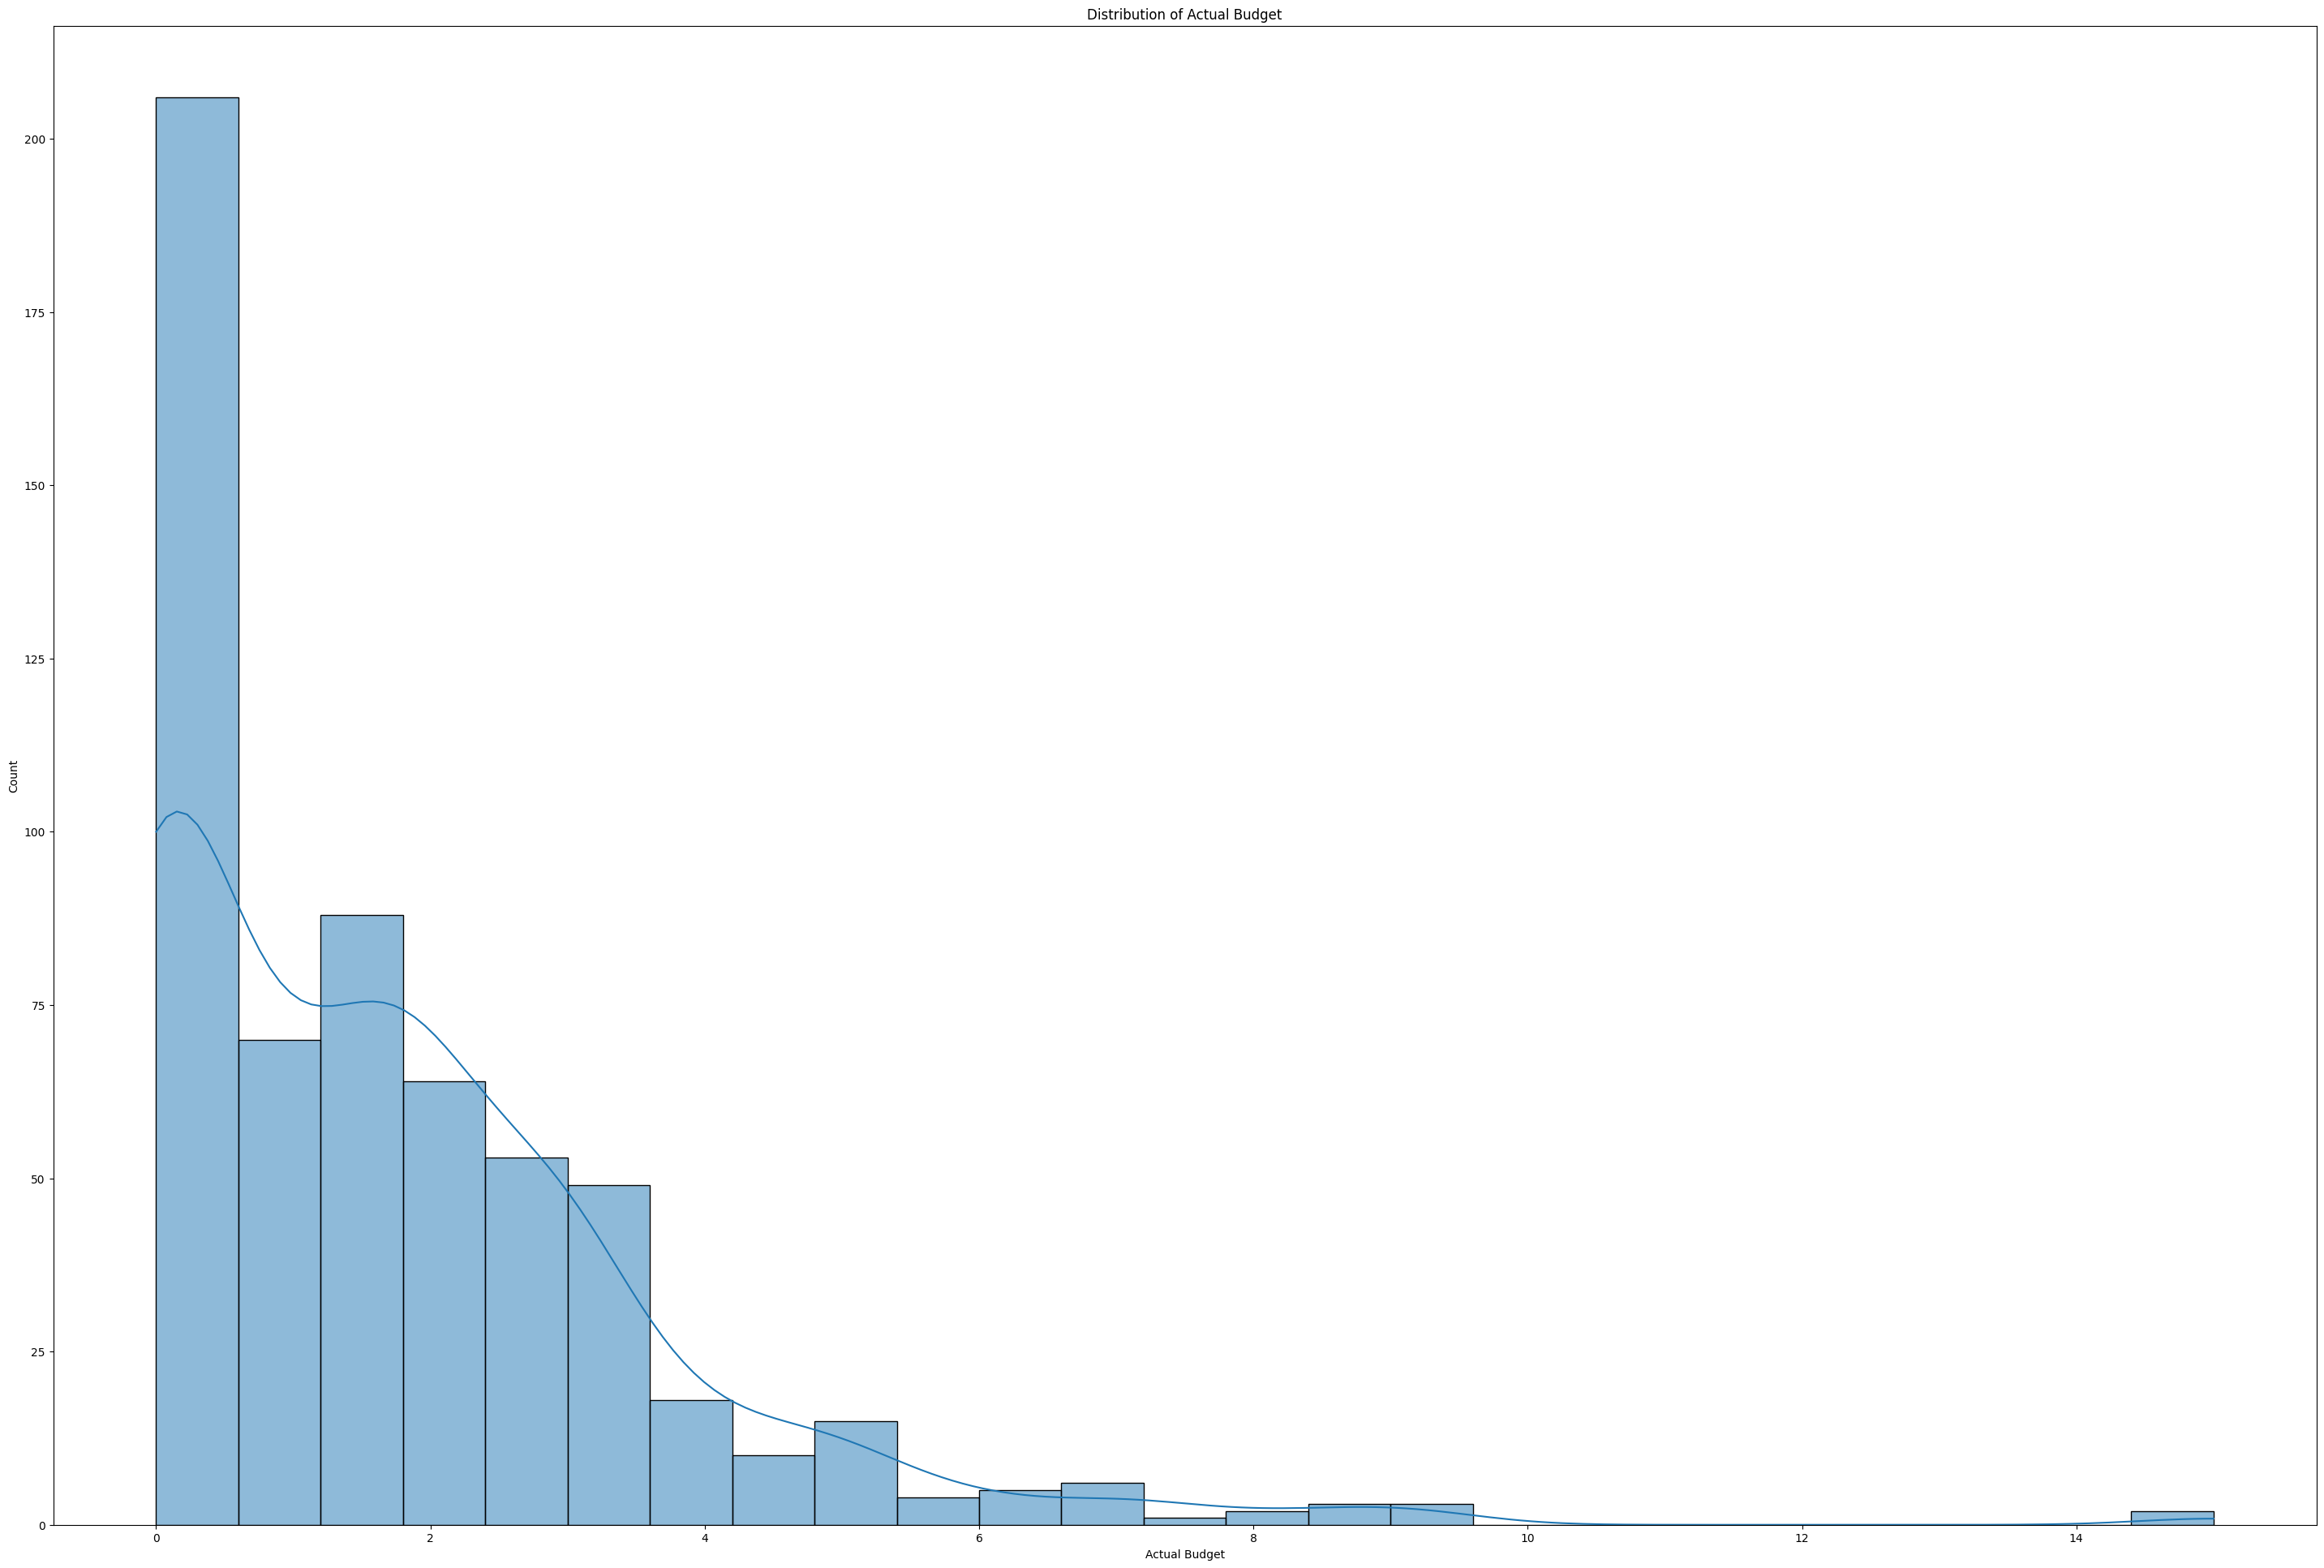

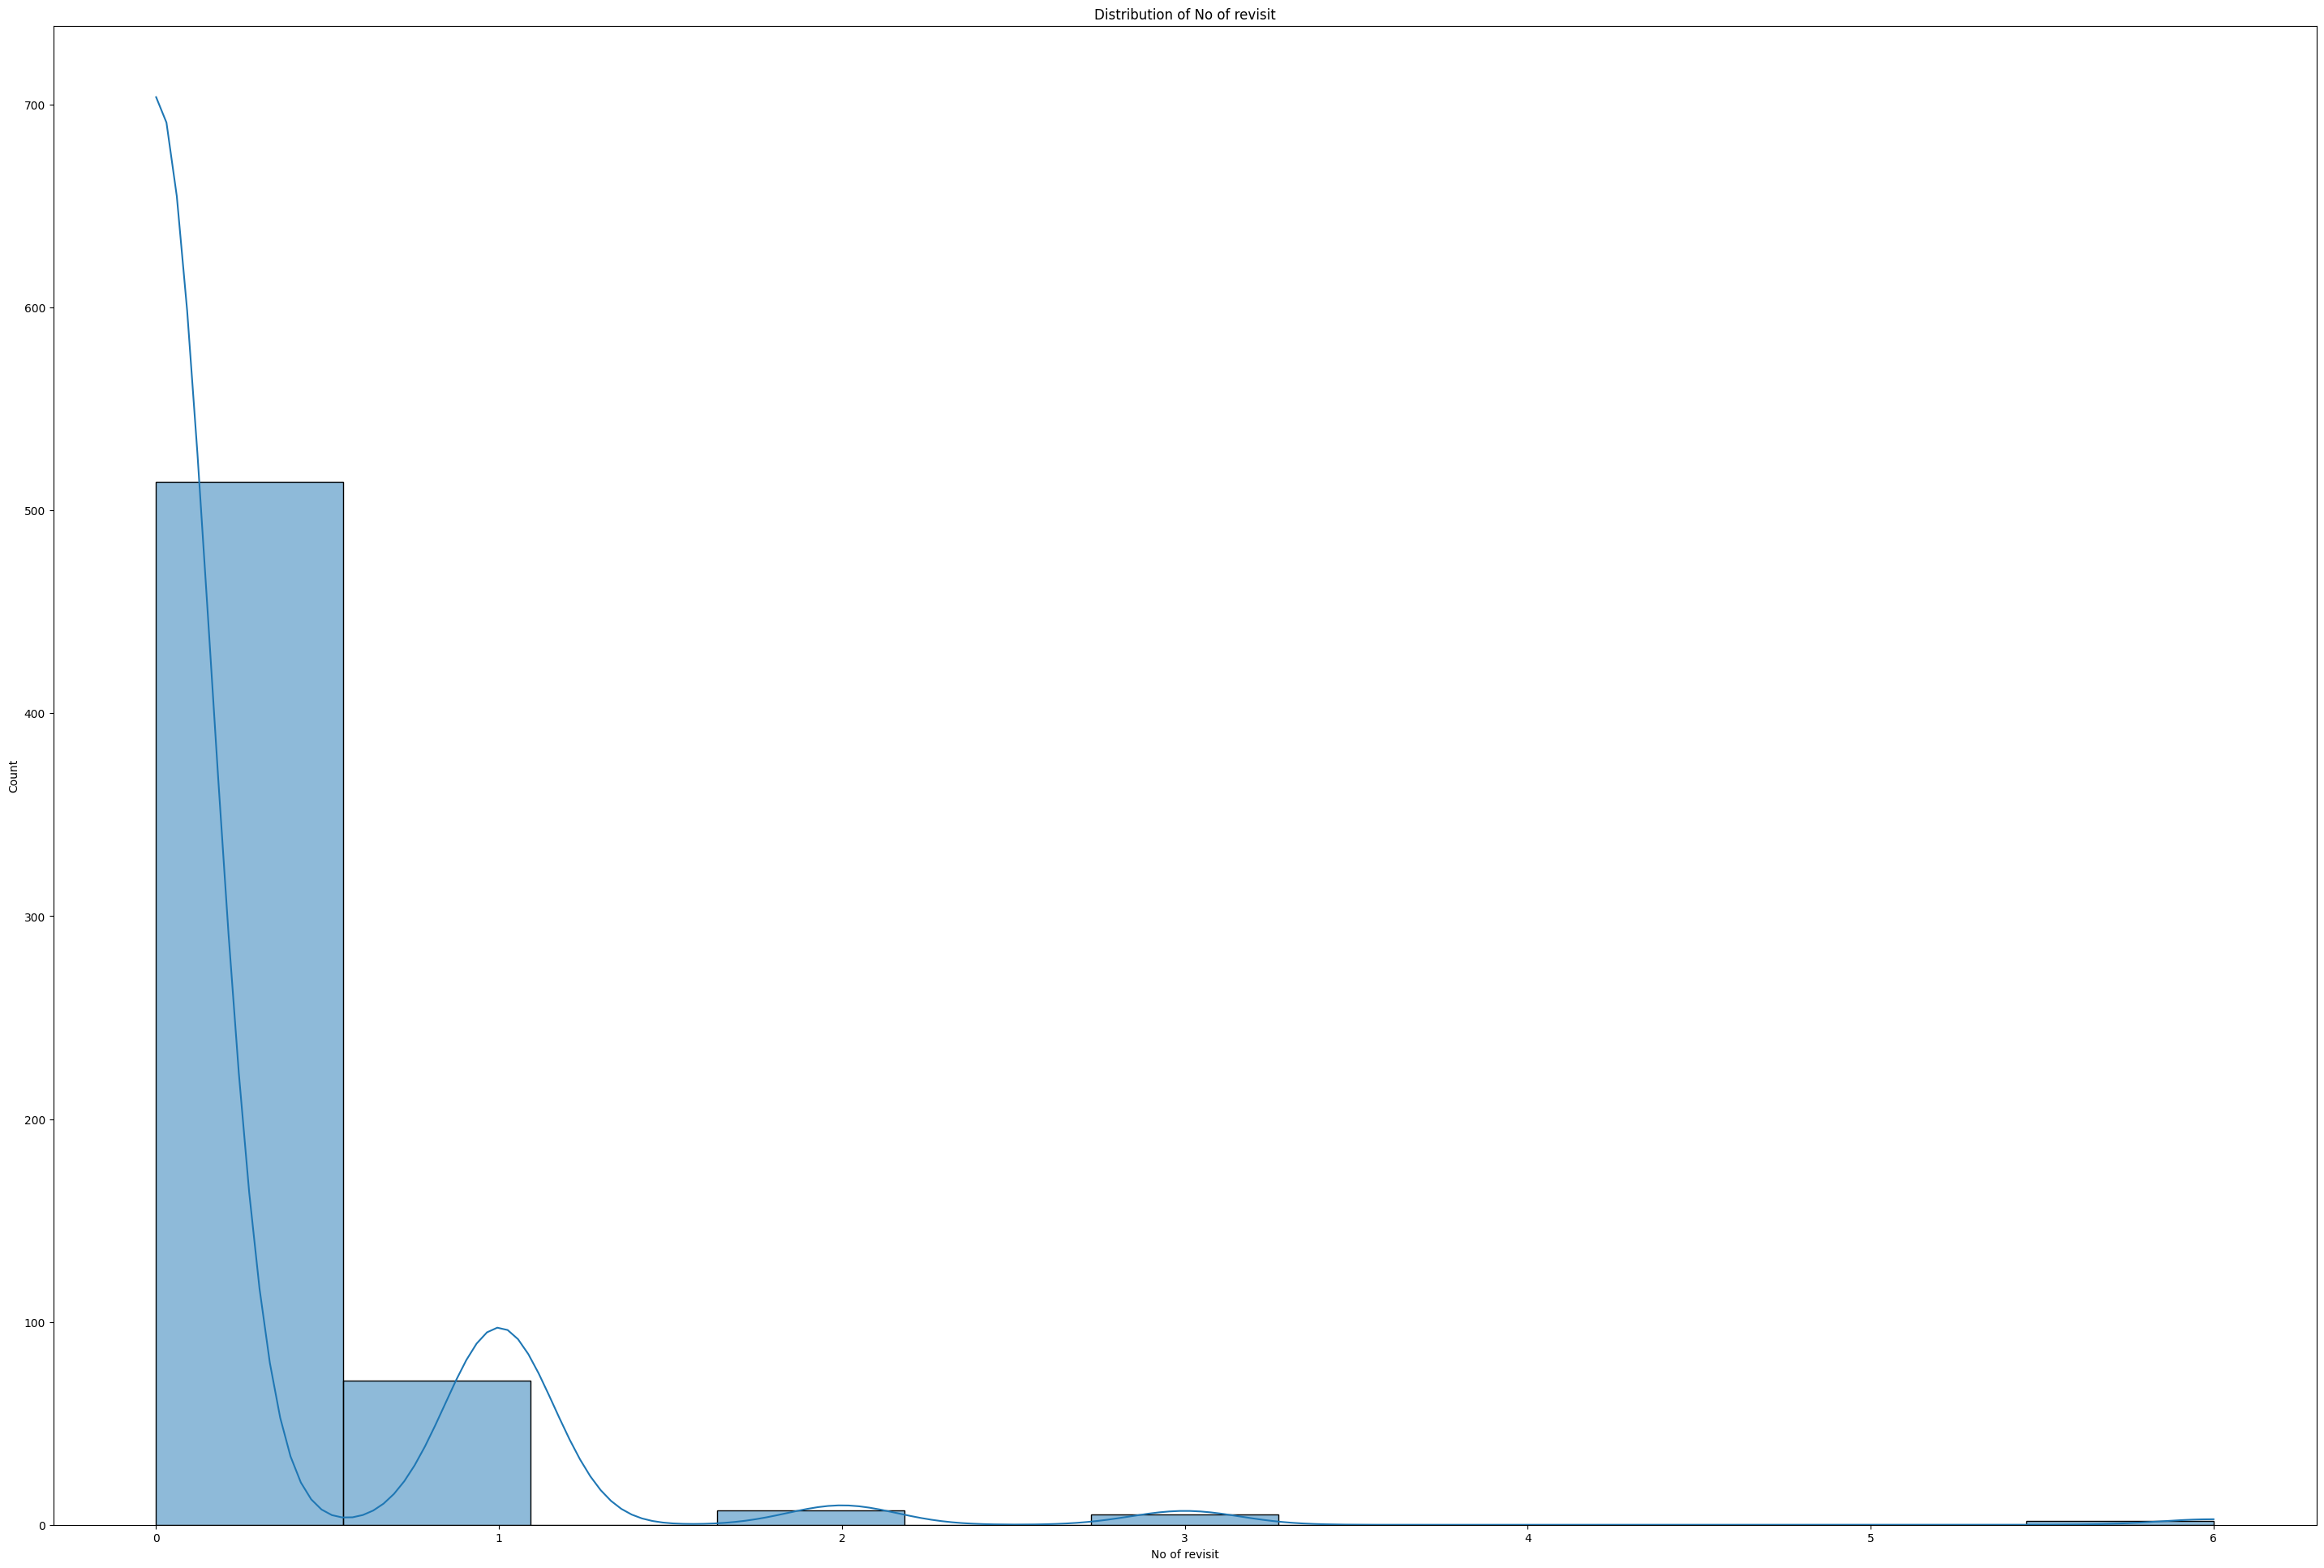

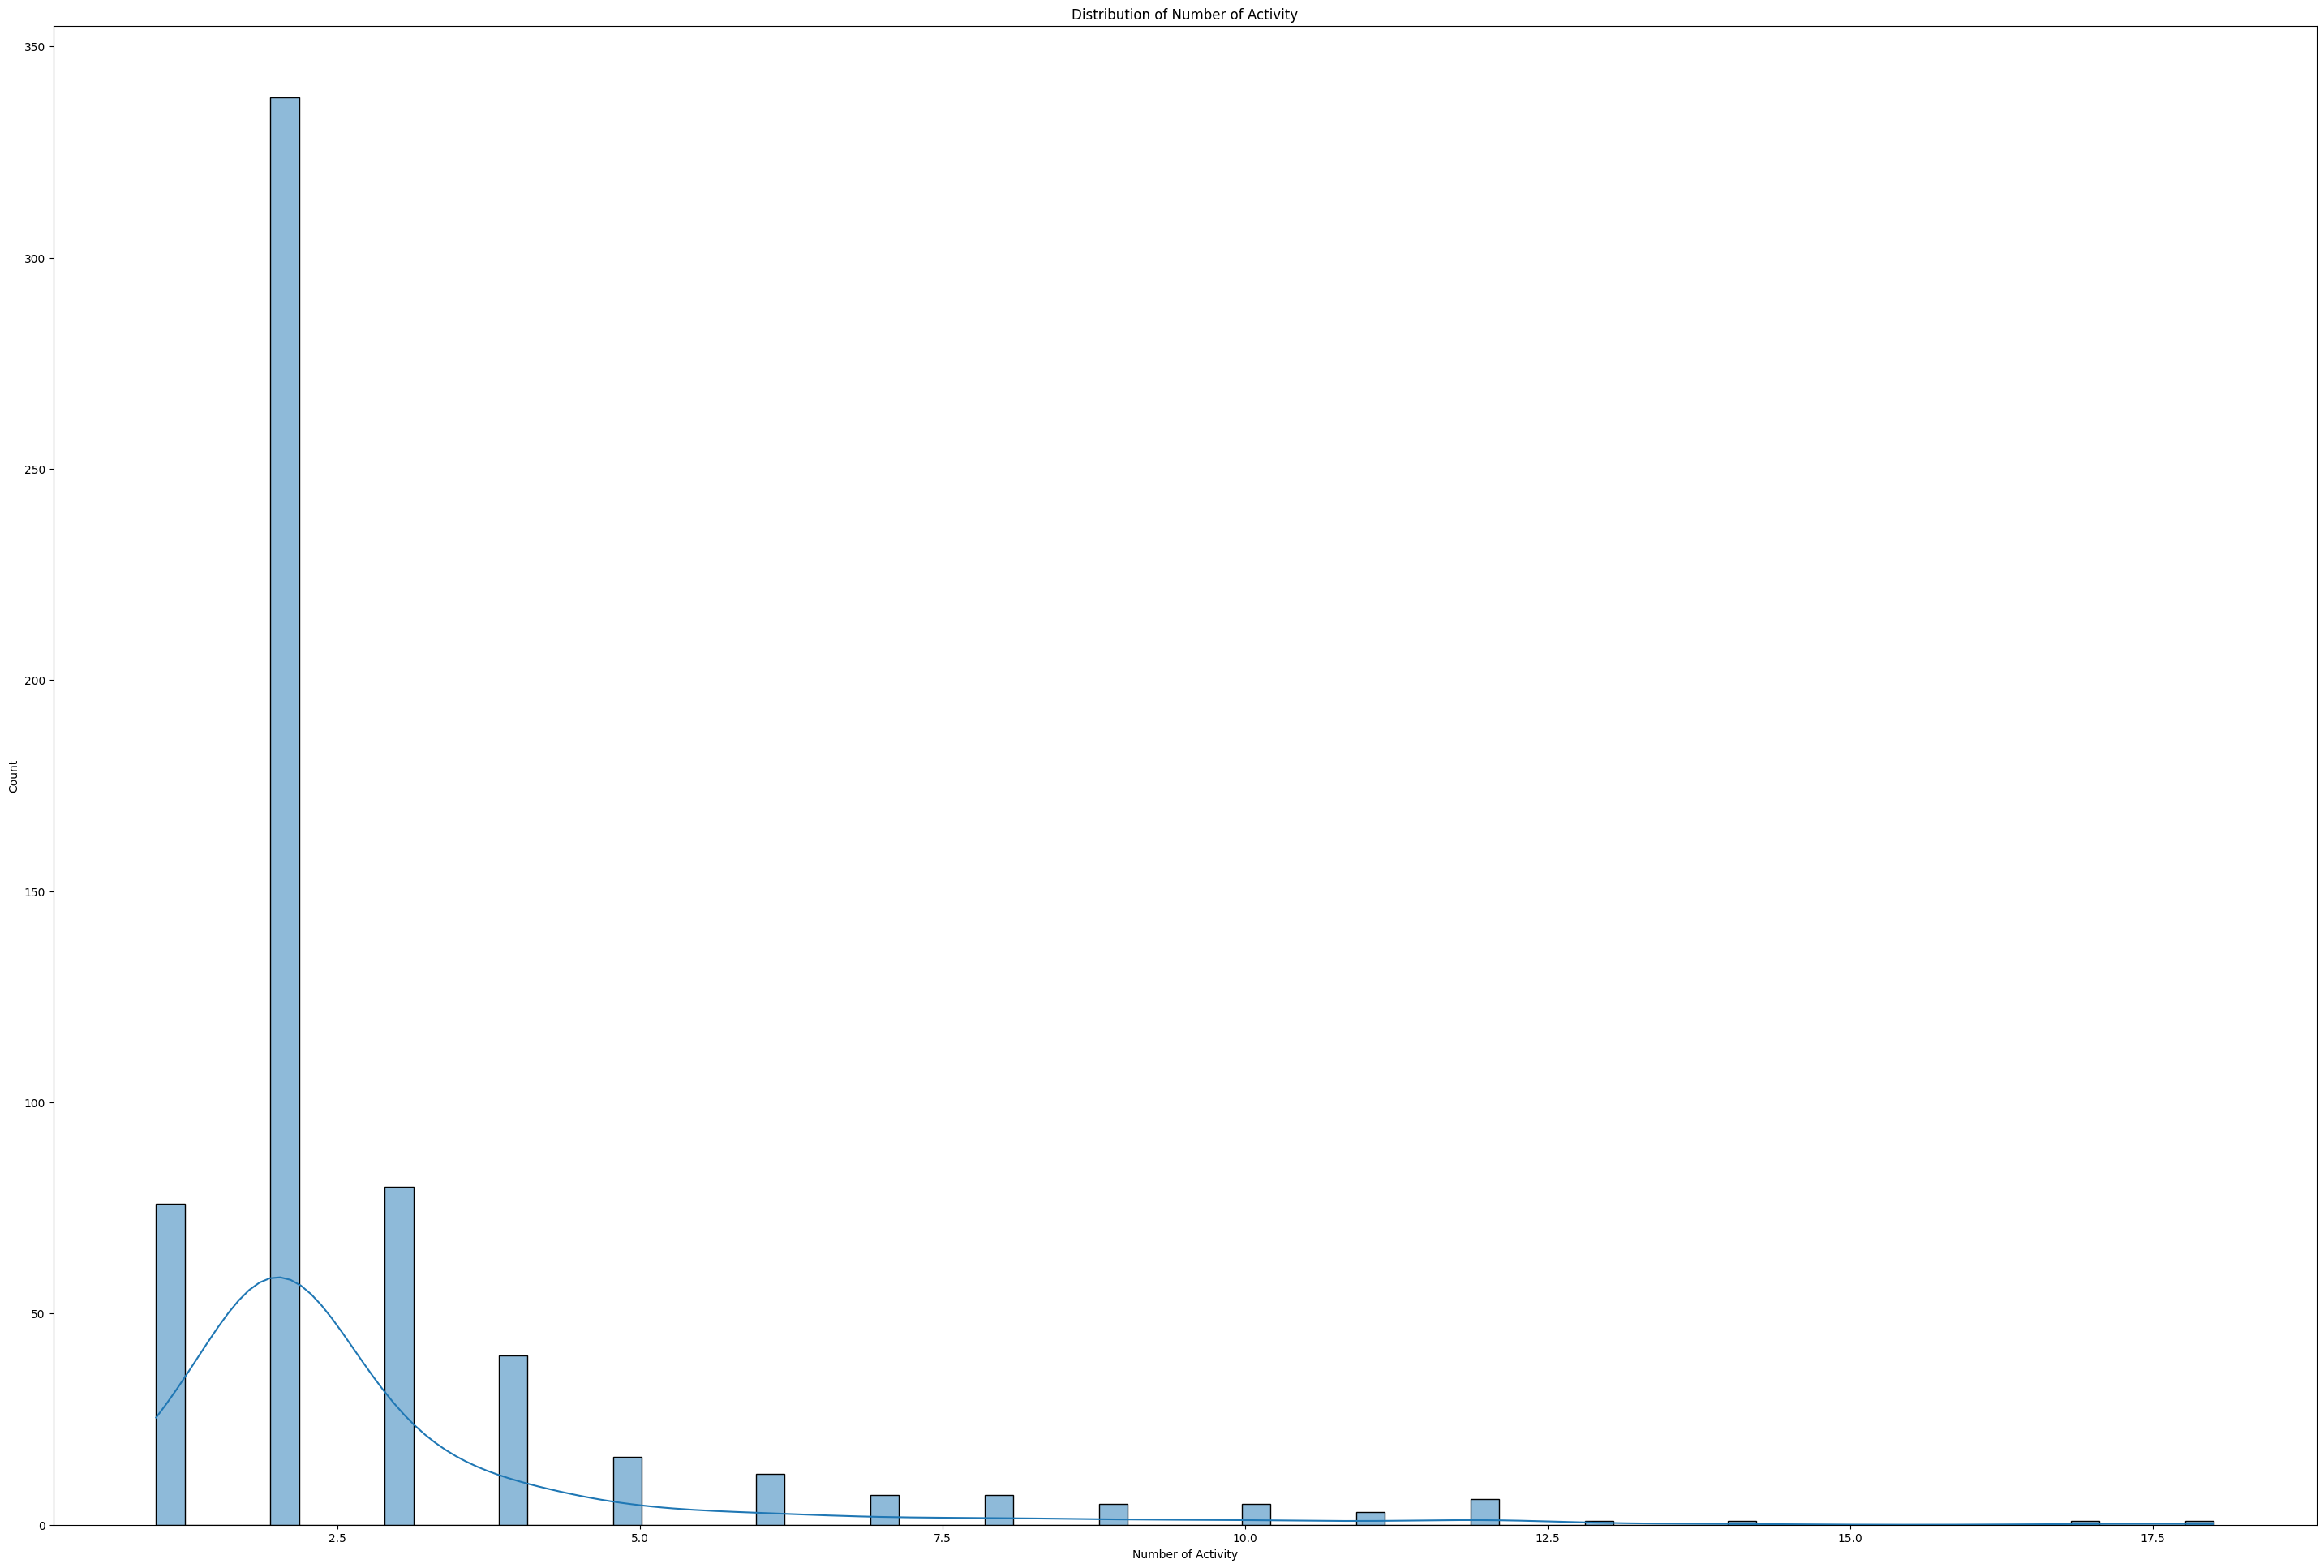

In [148]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()


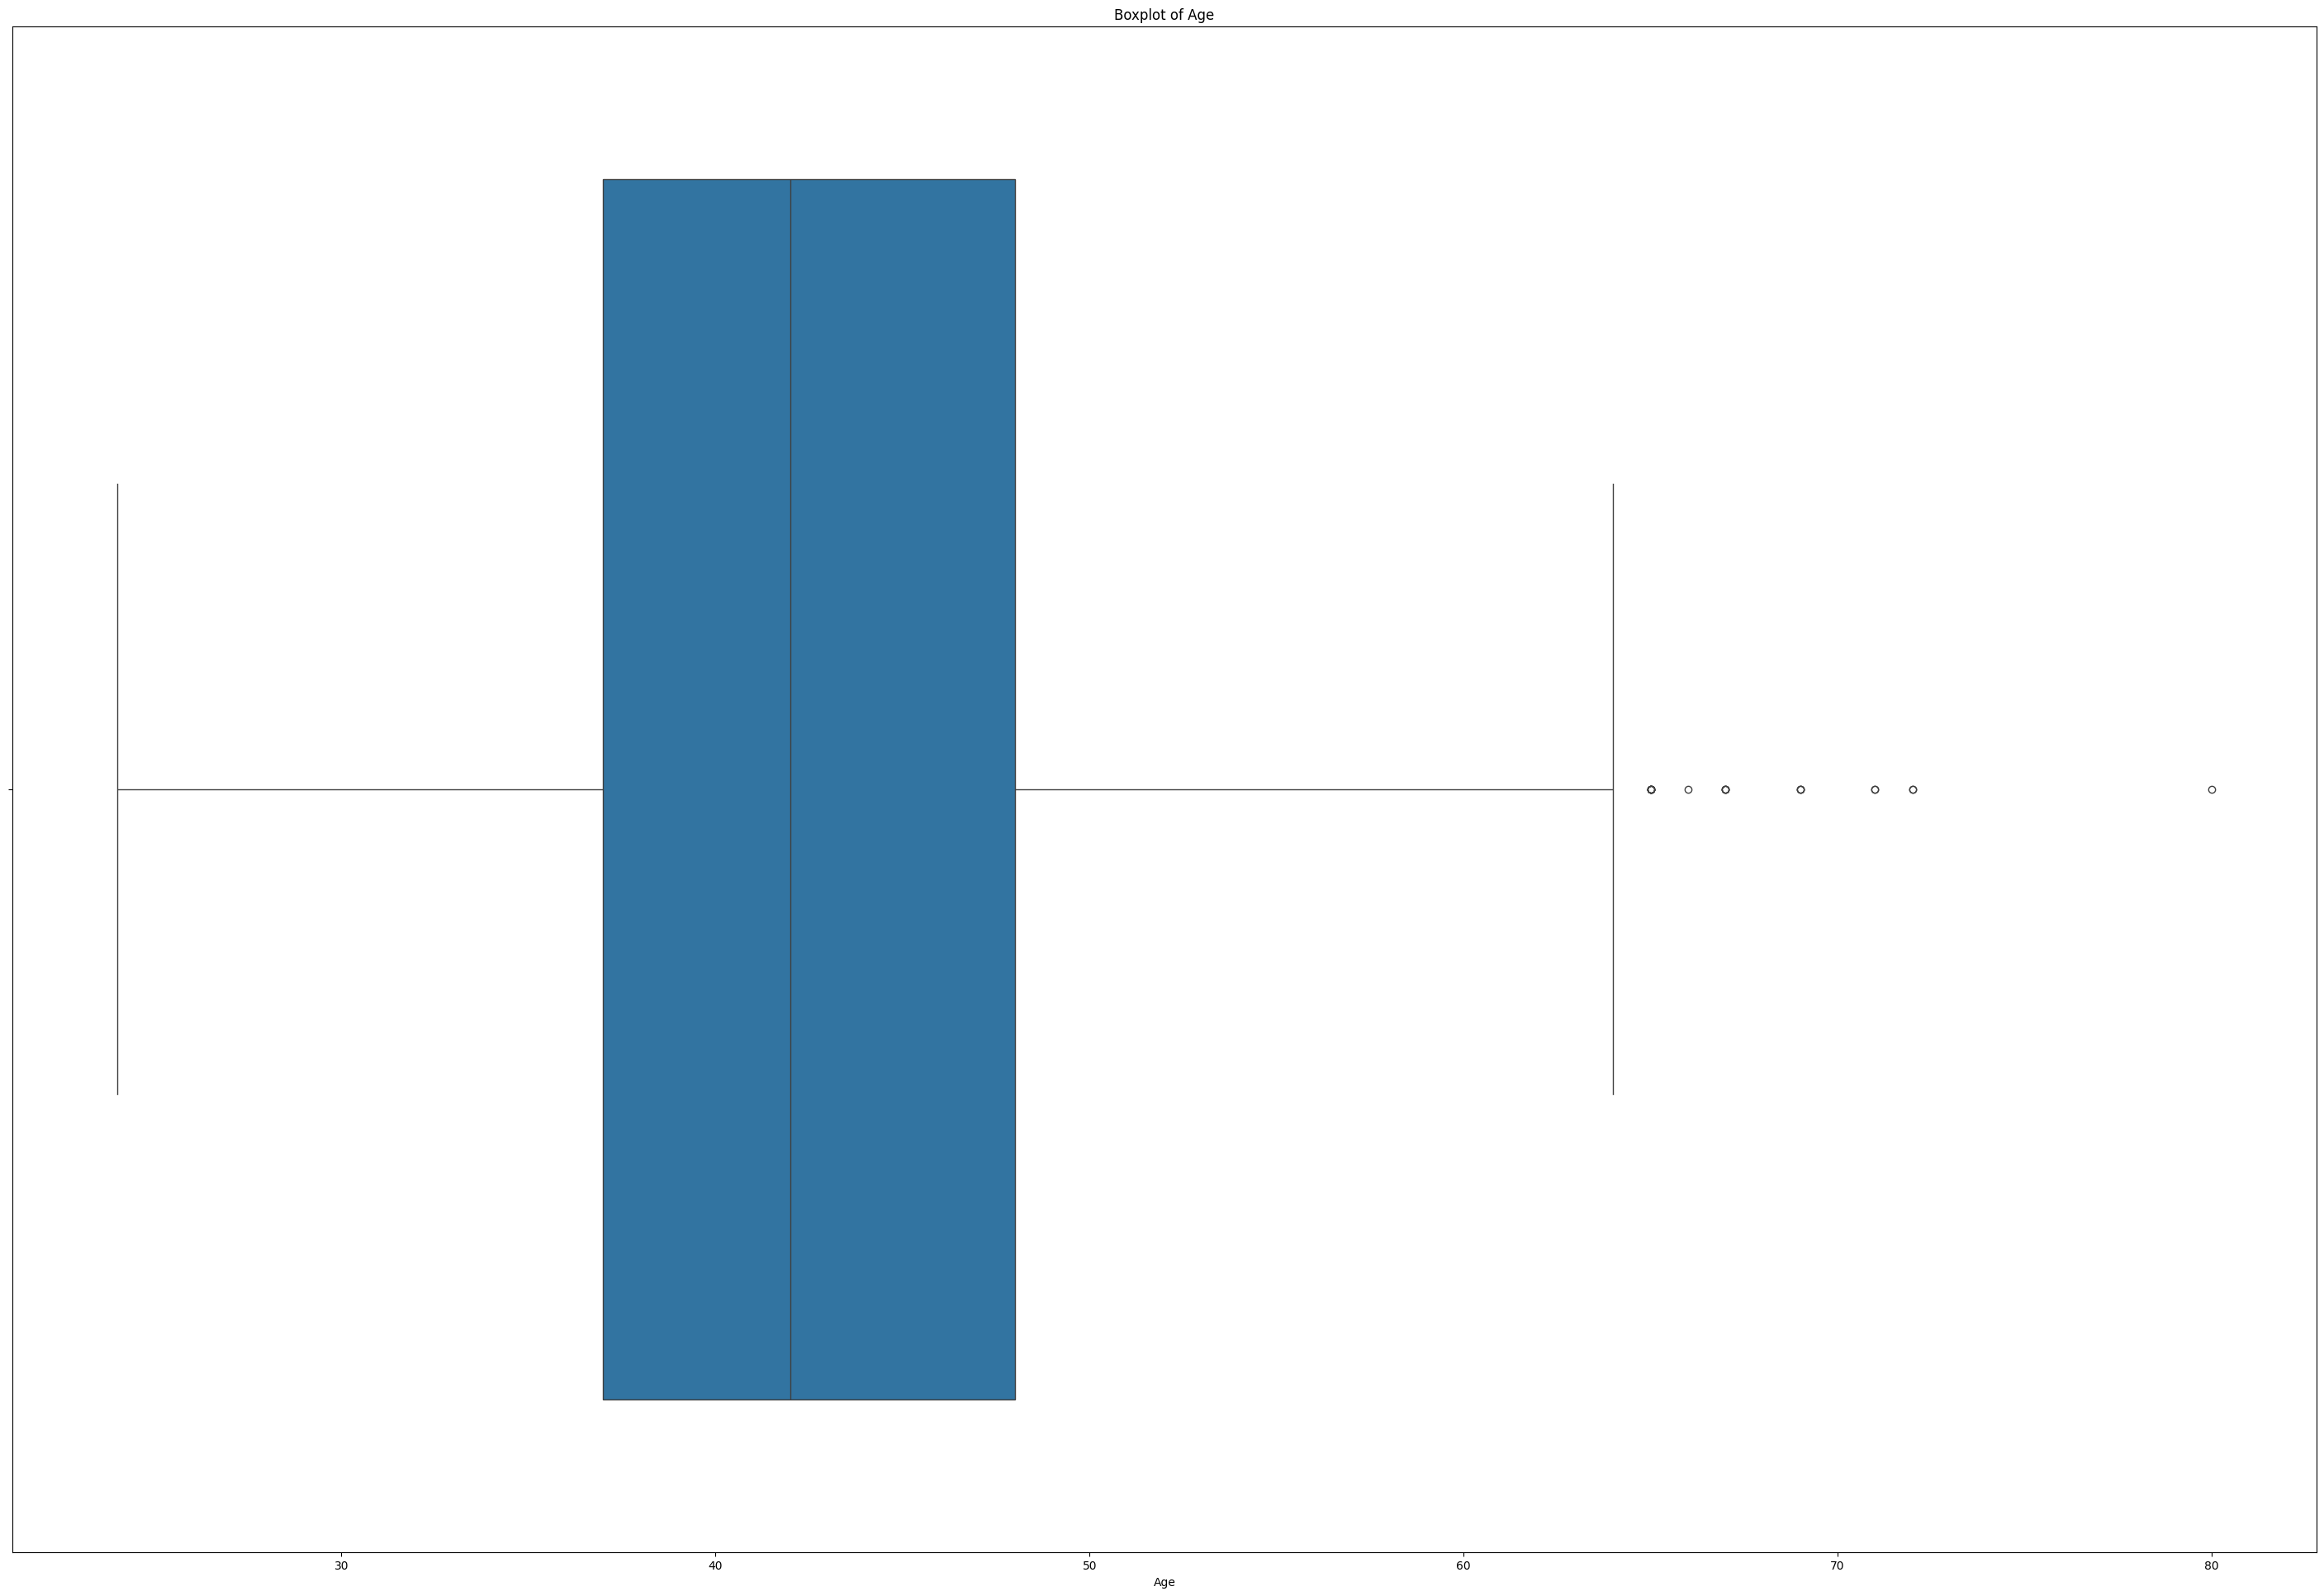

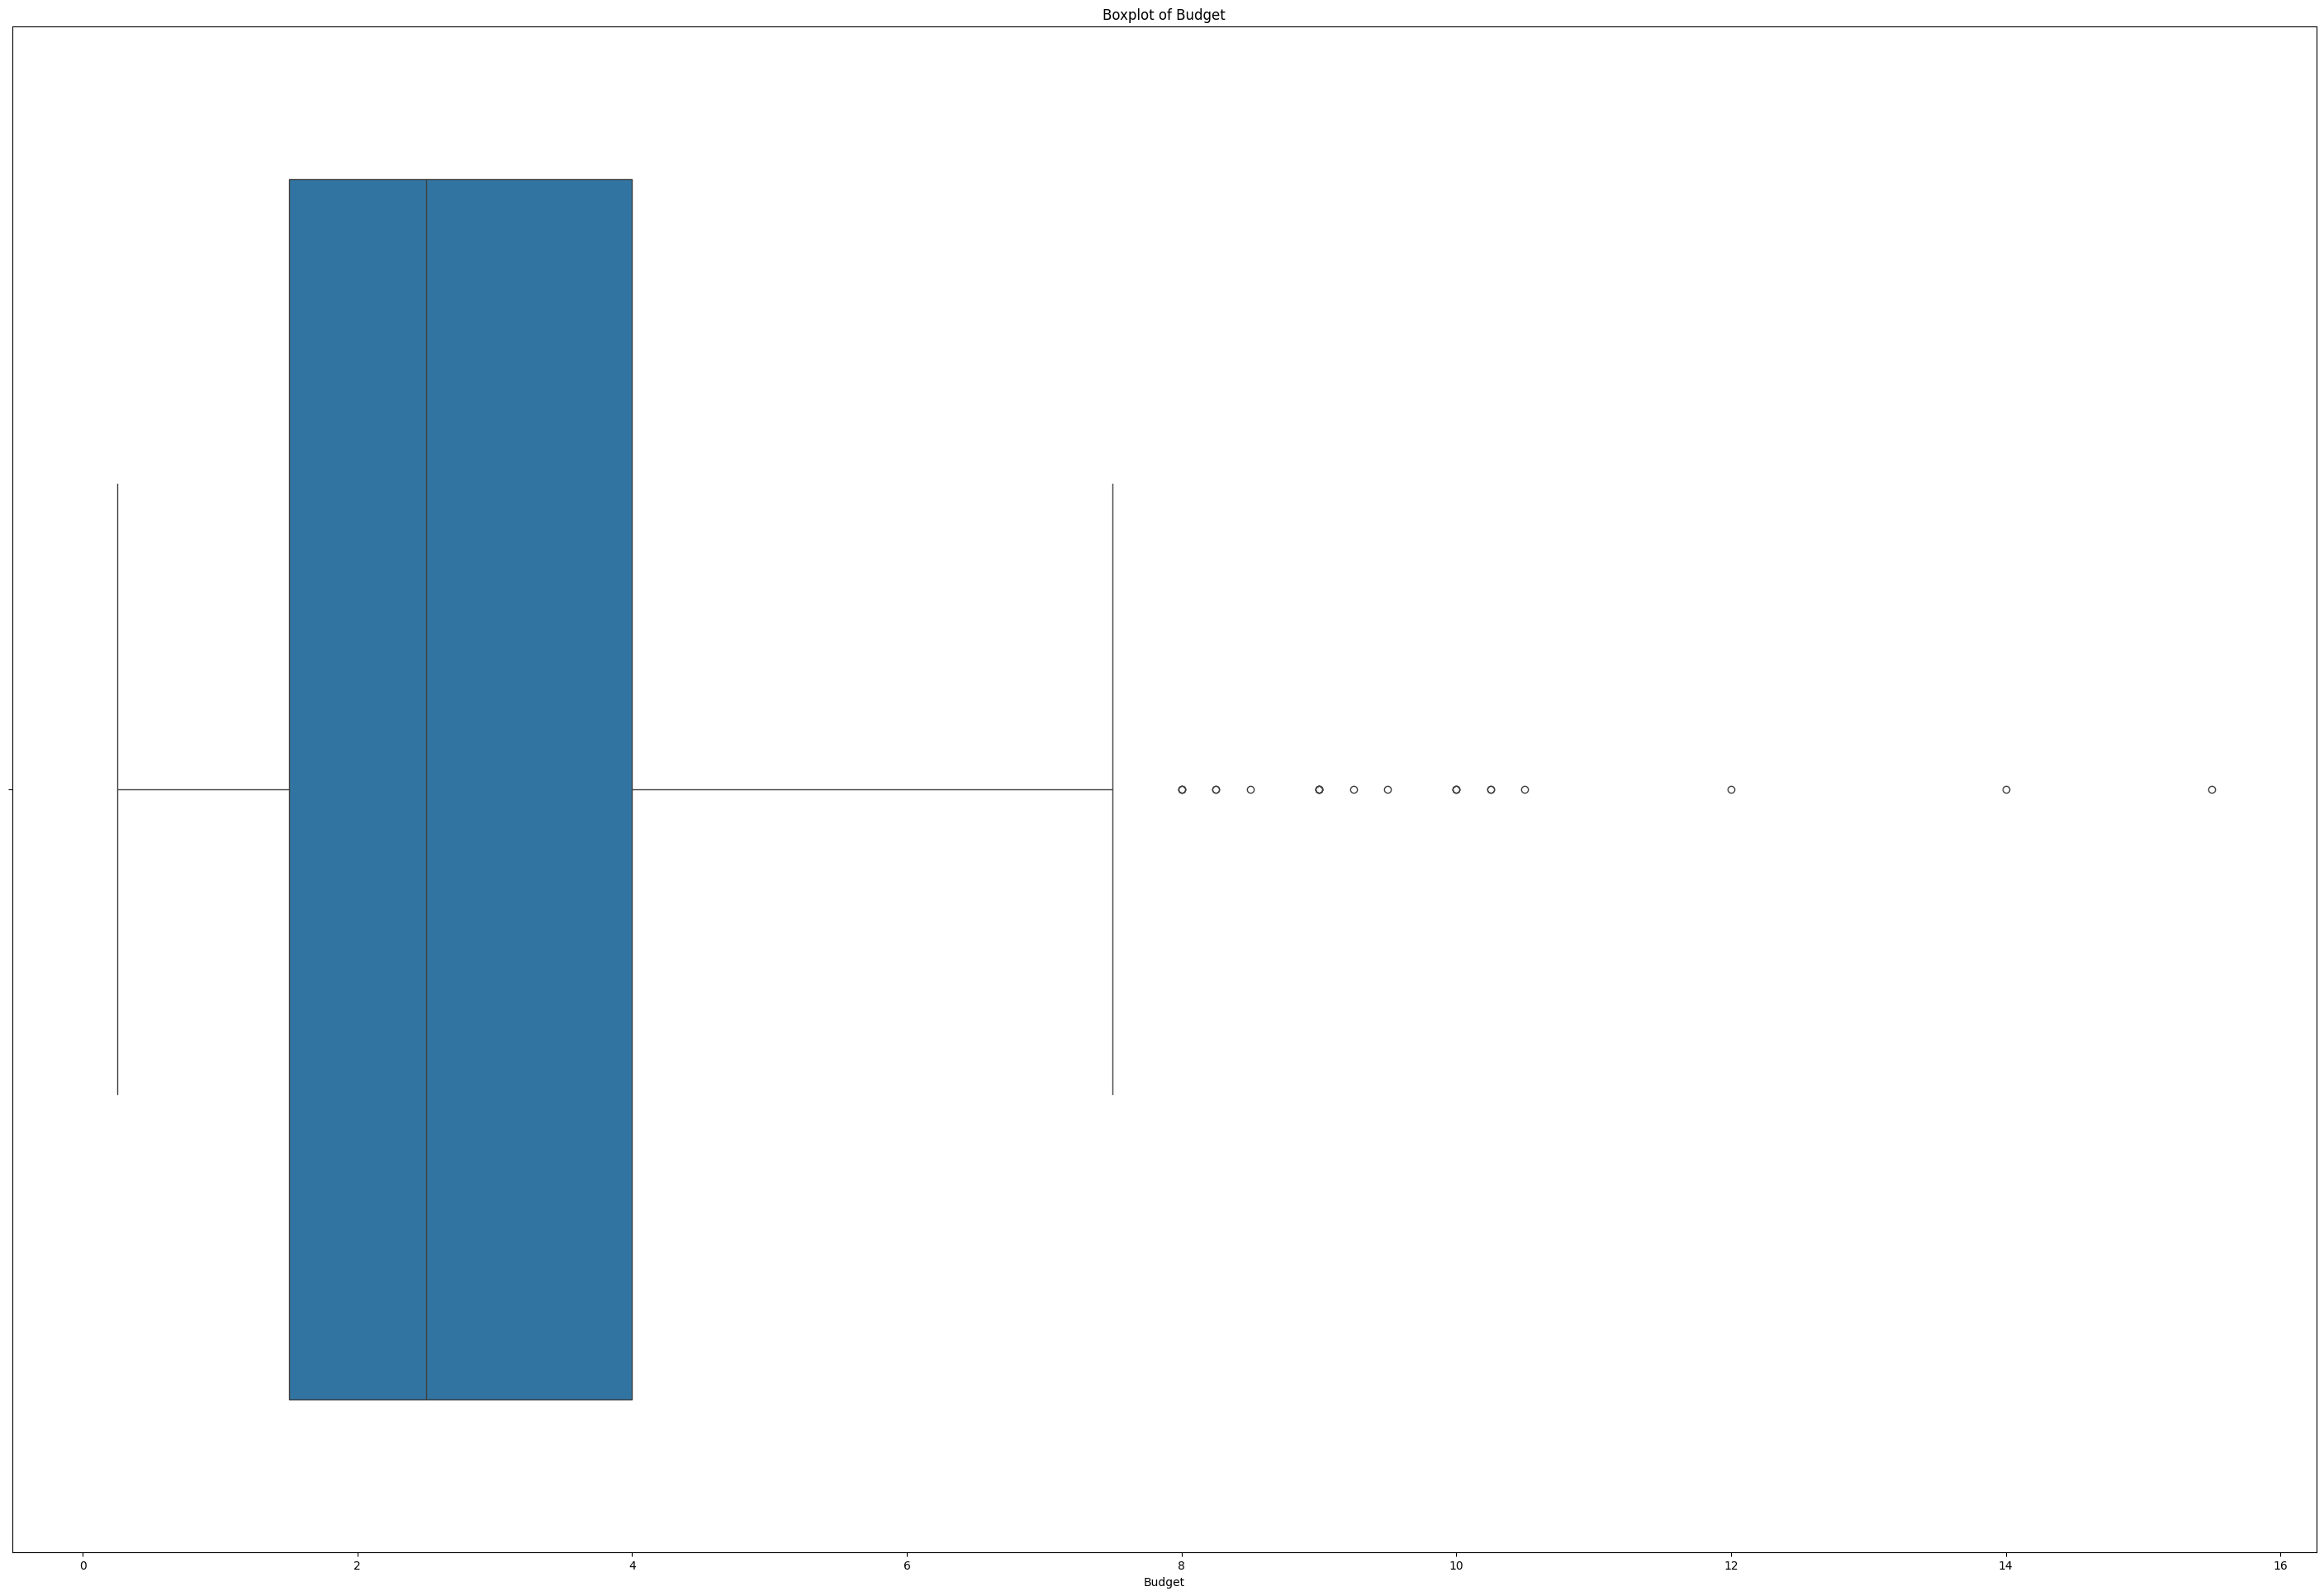

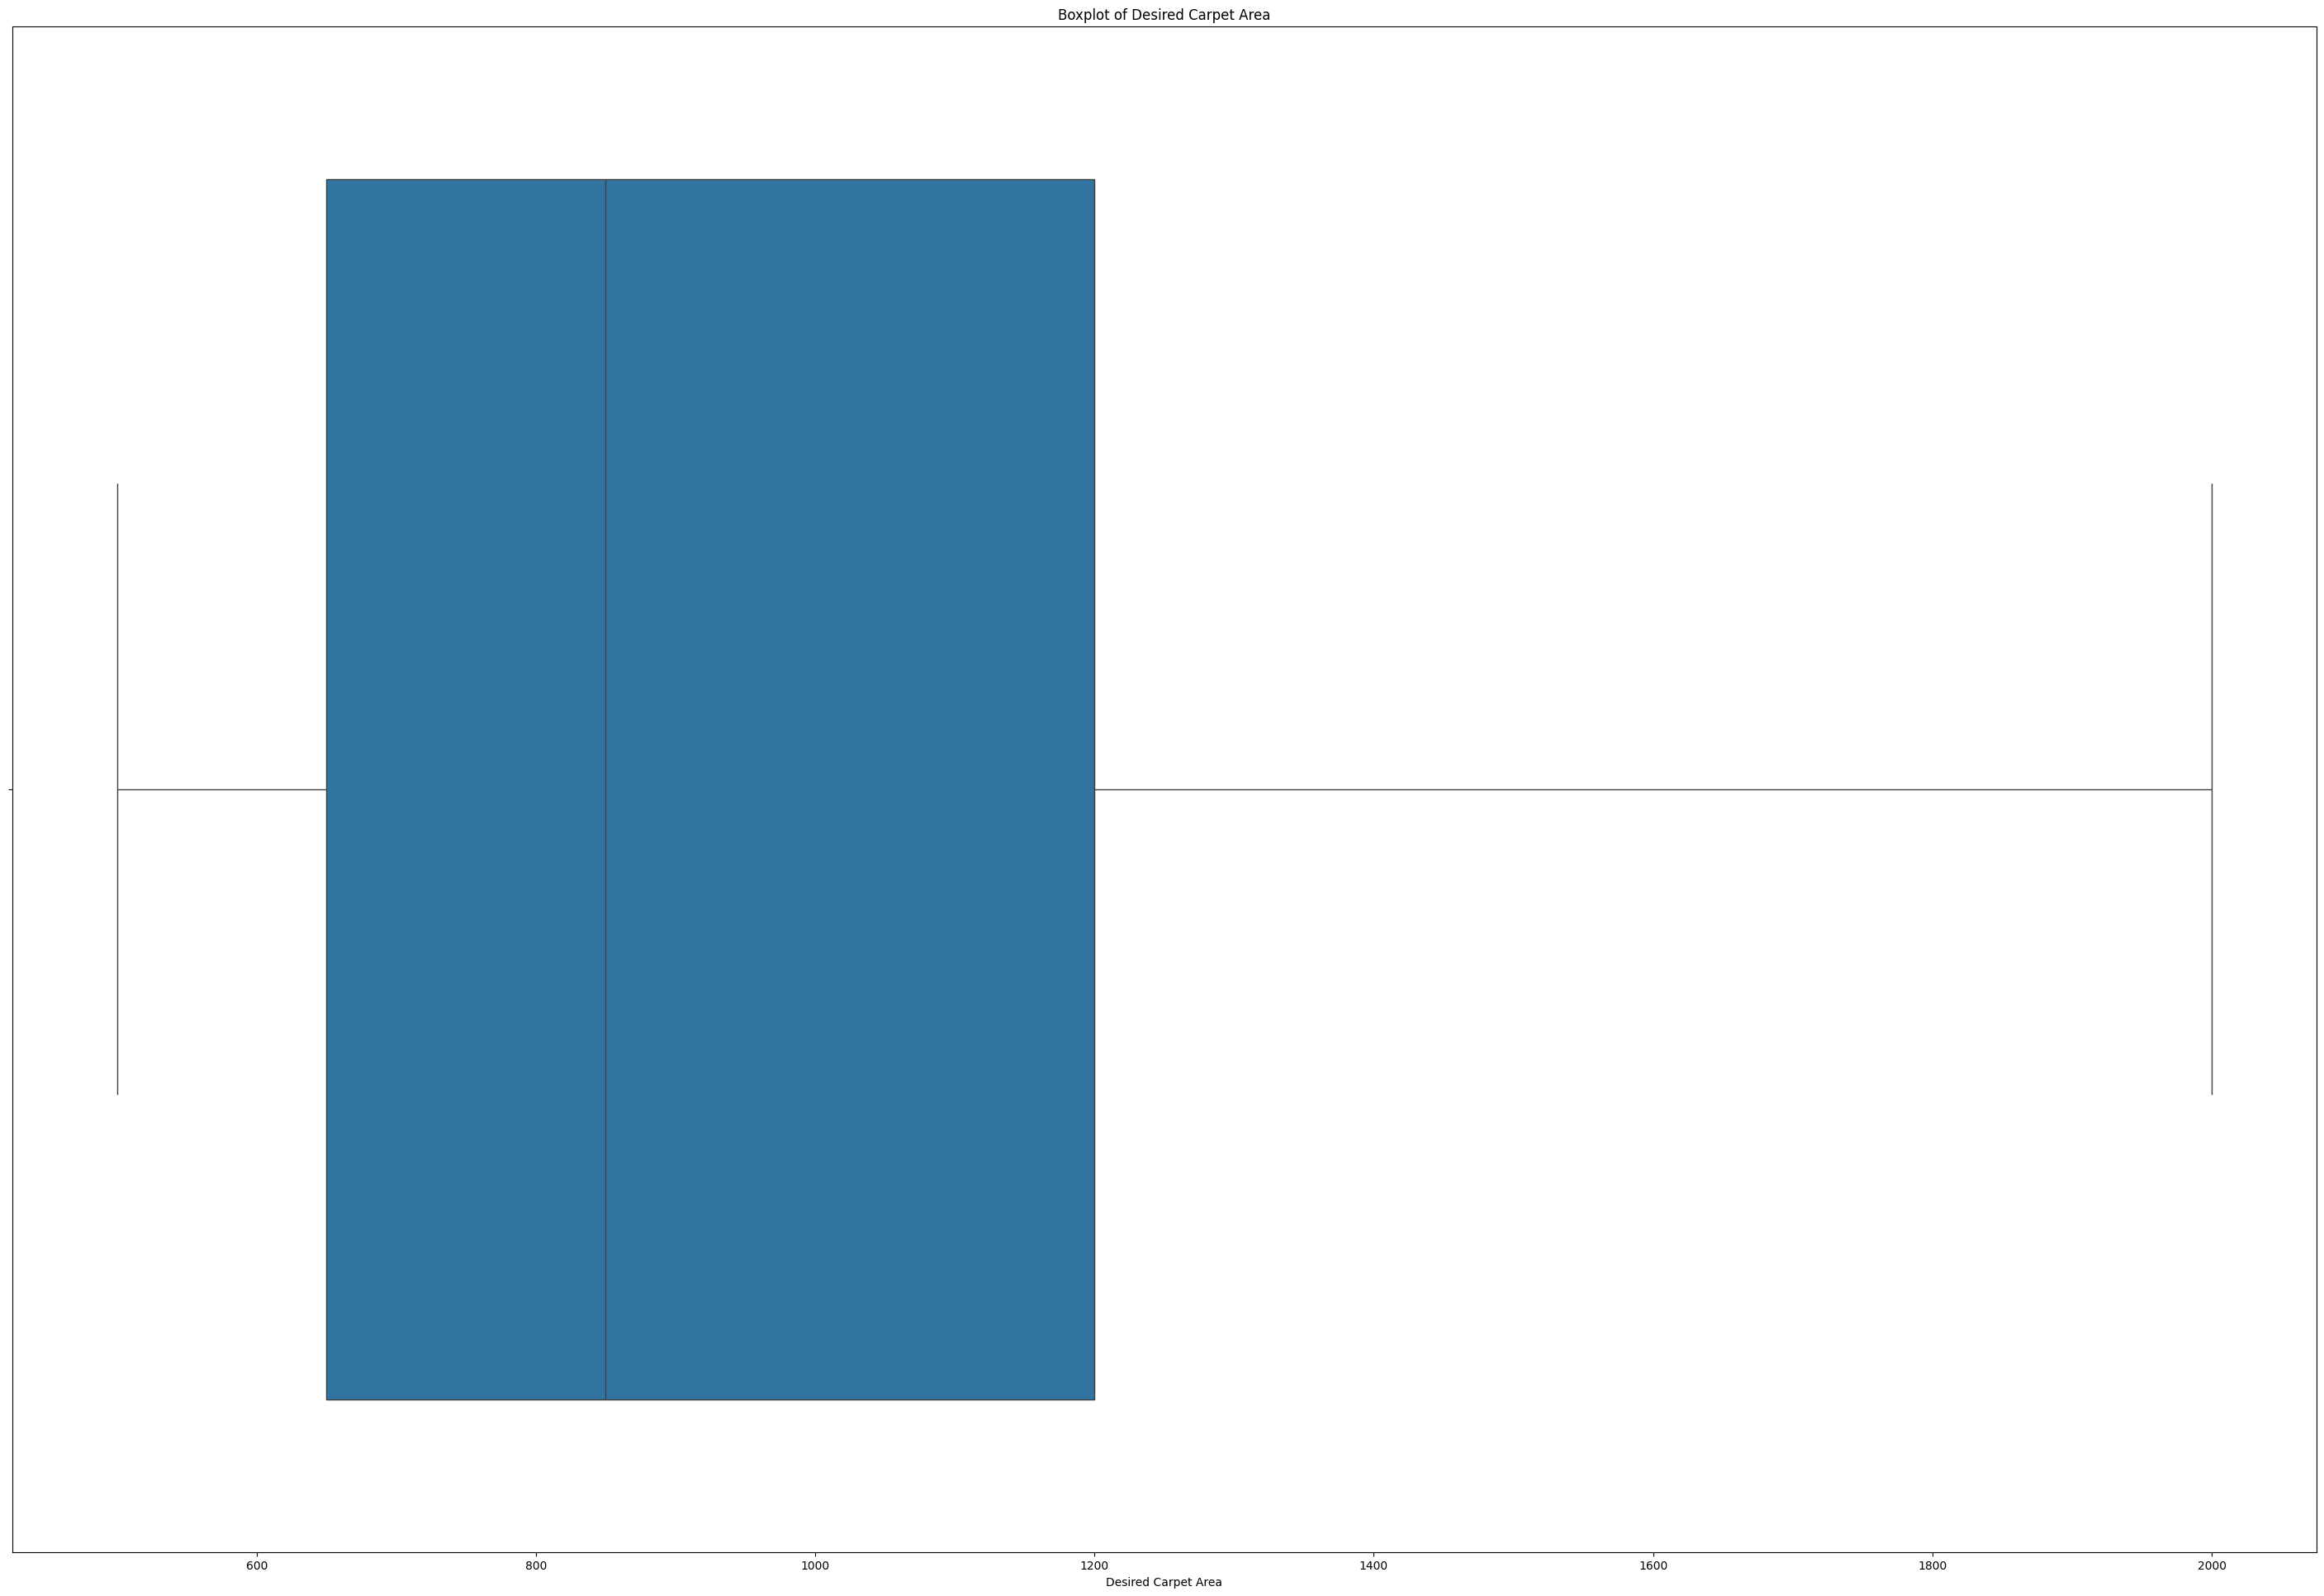

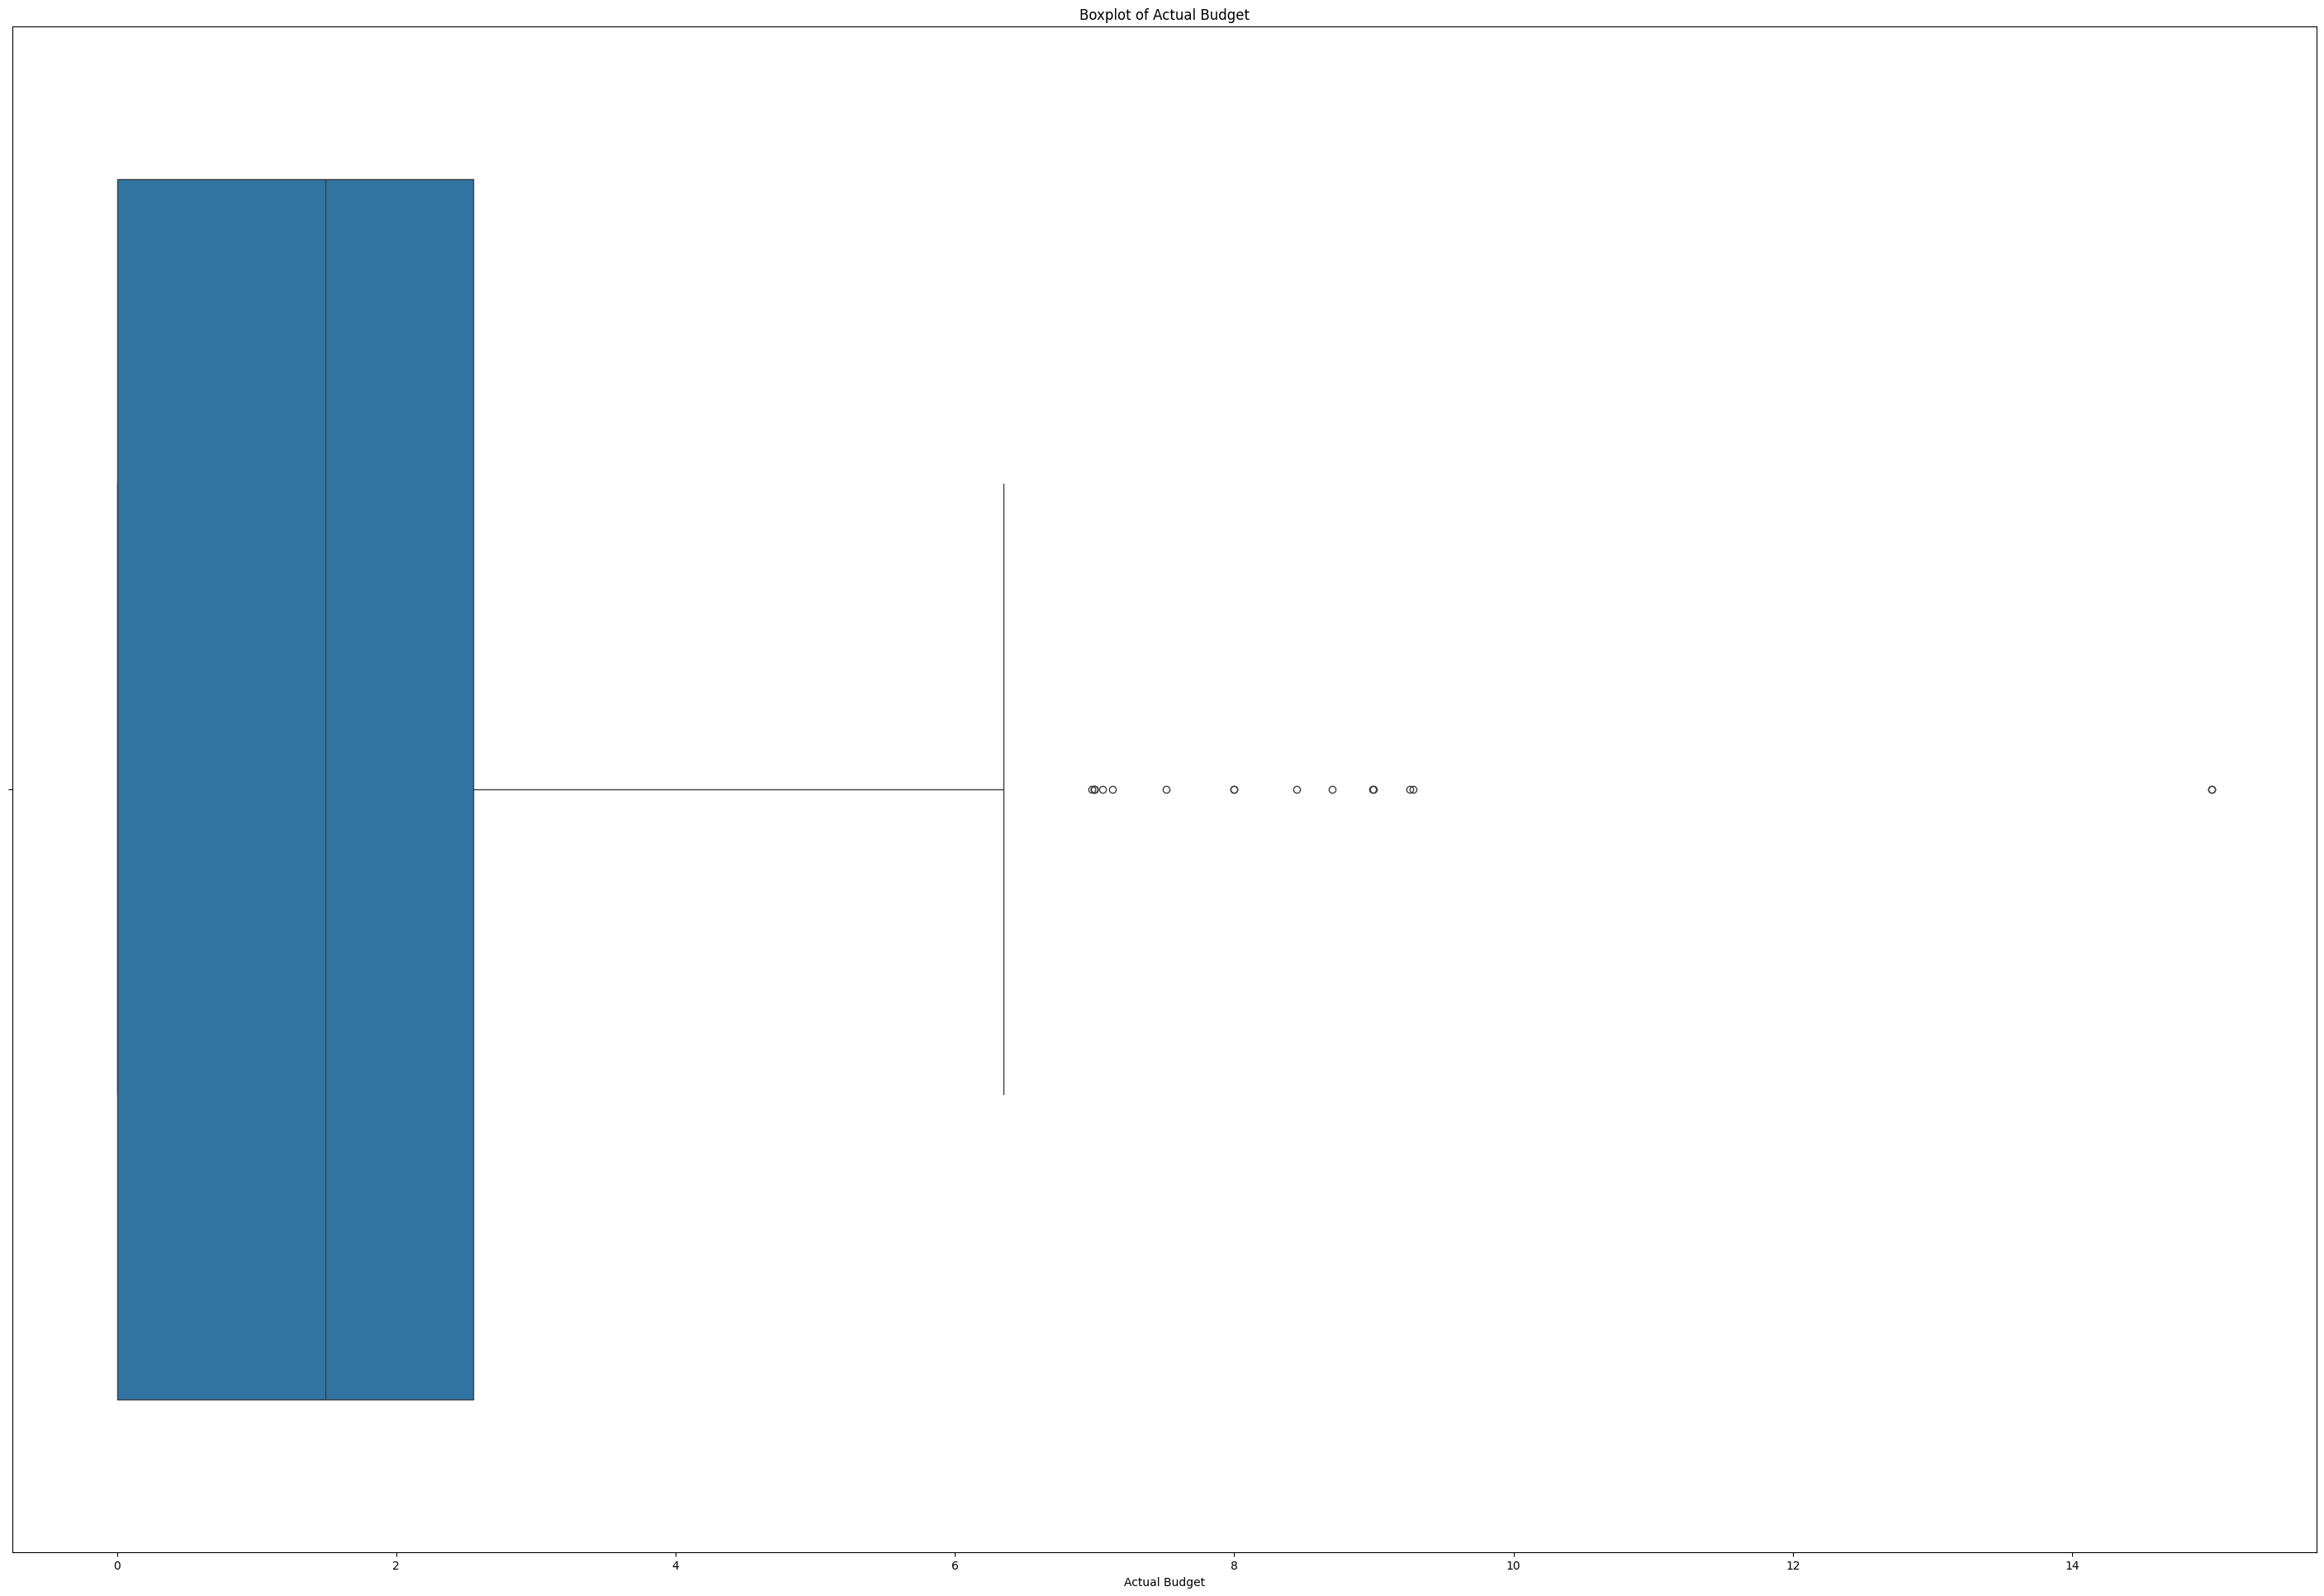

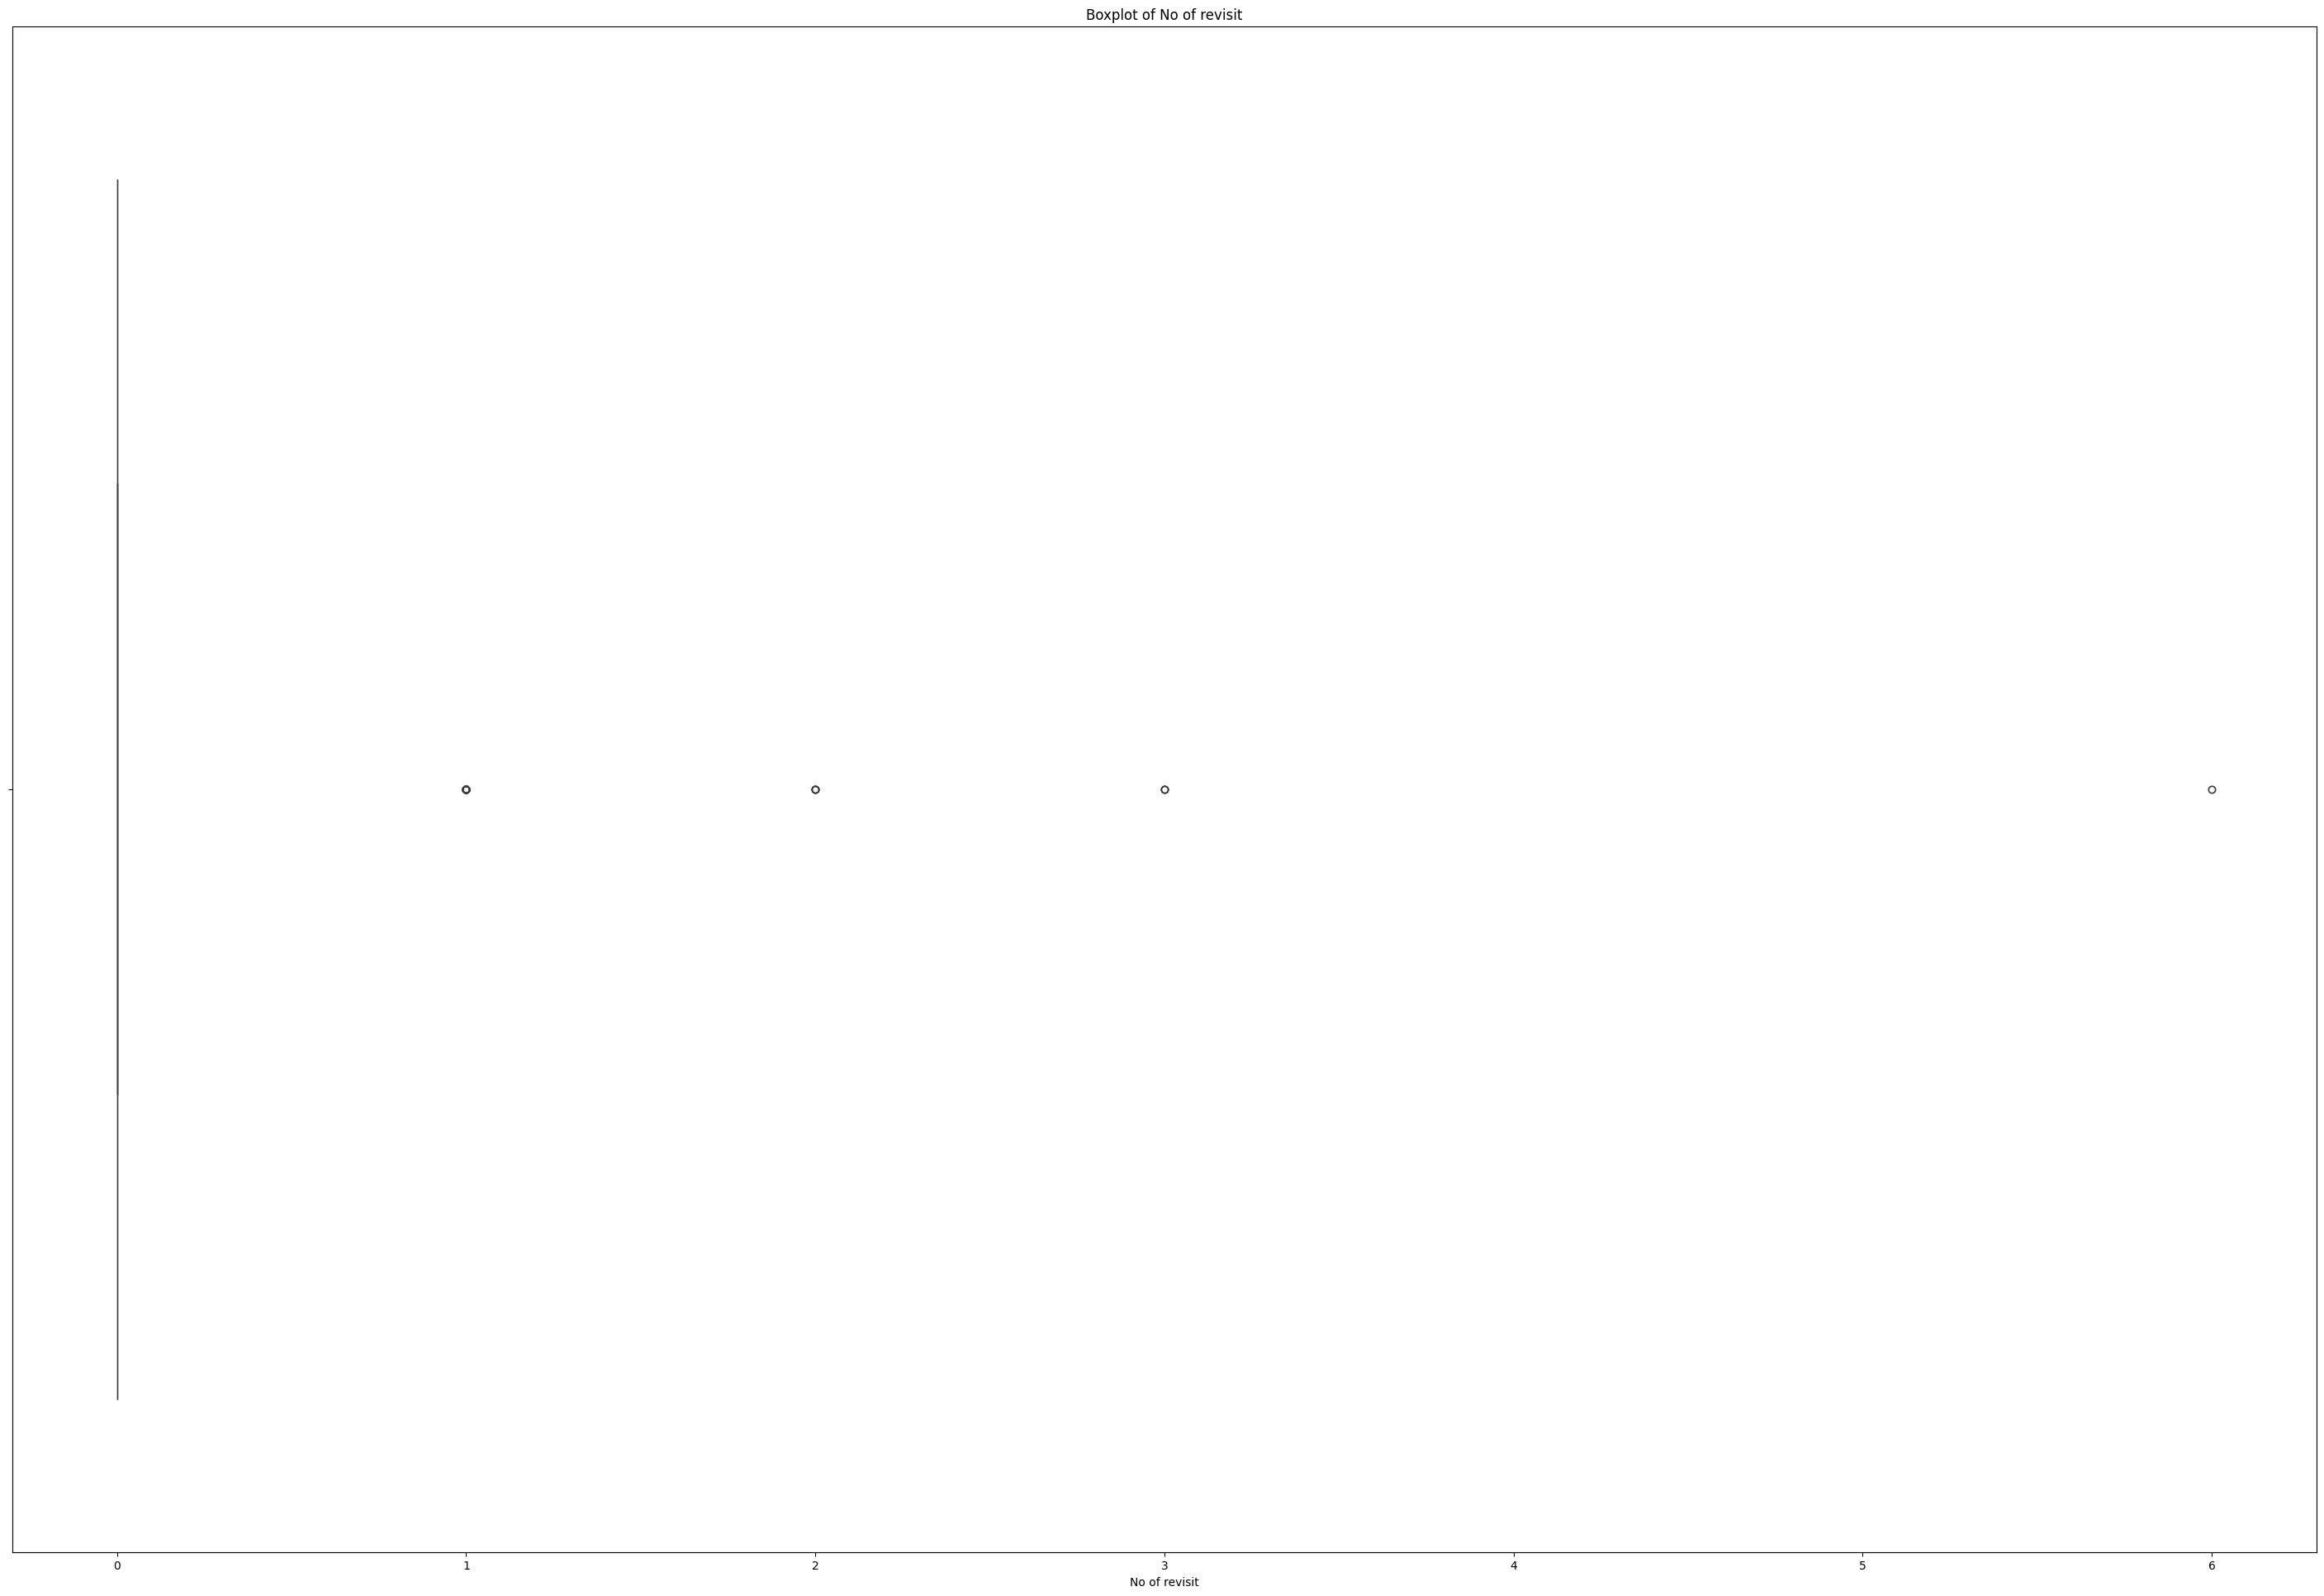

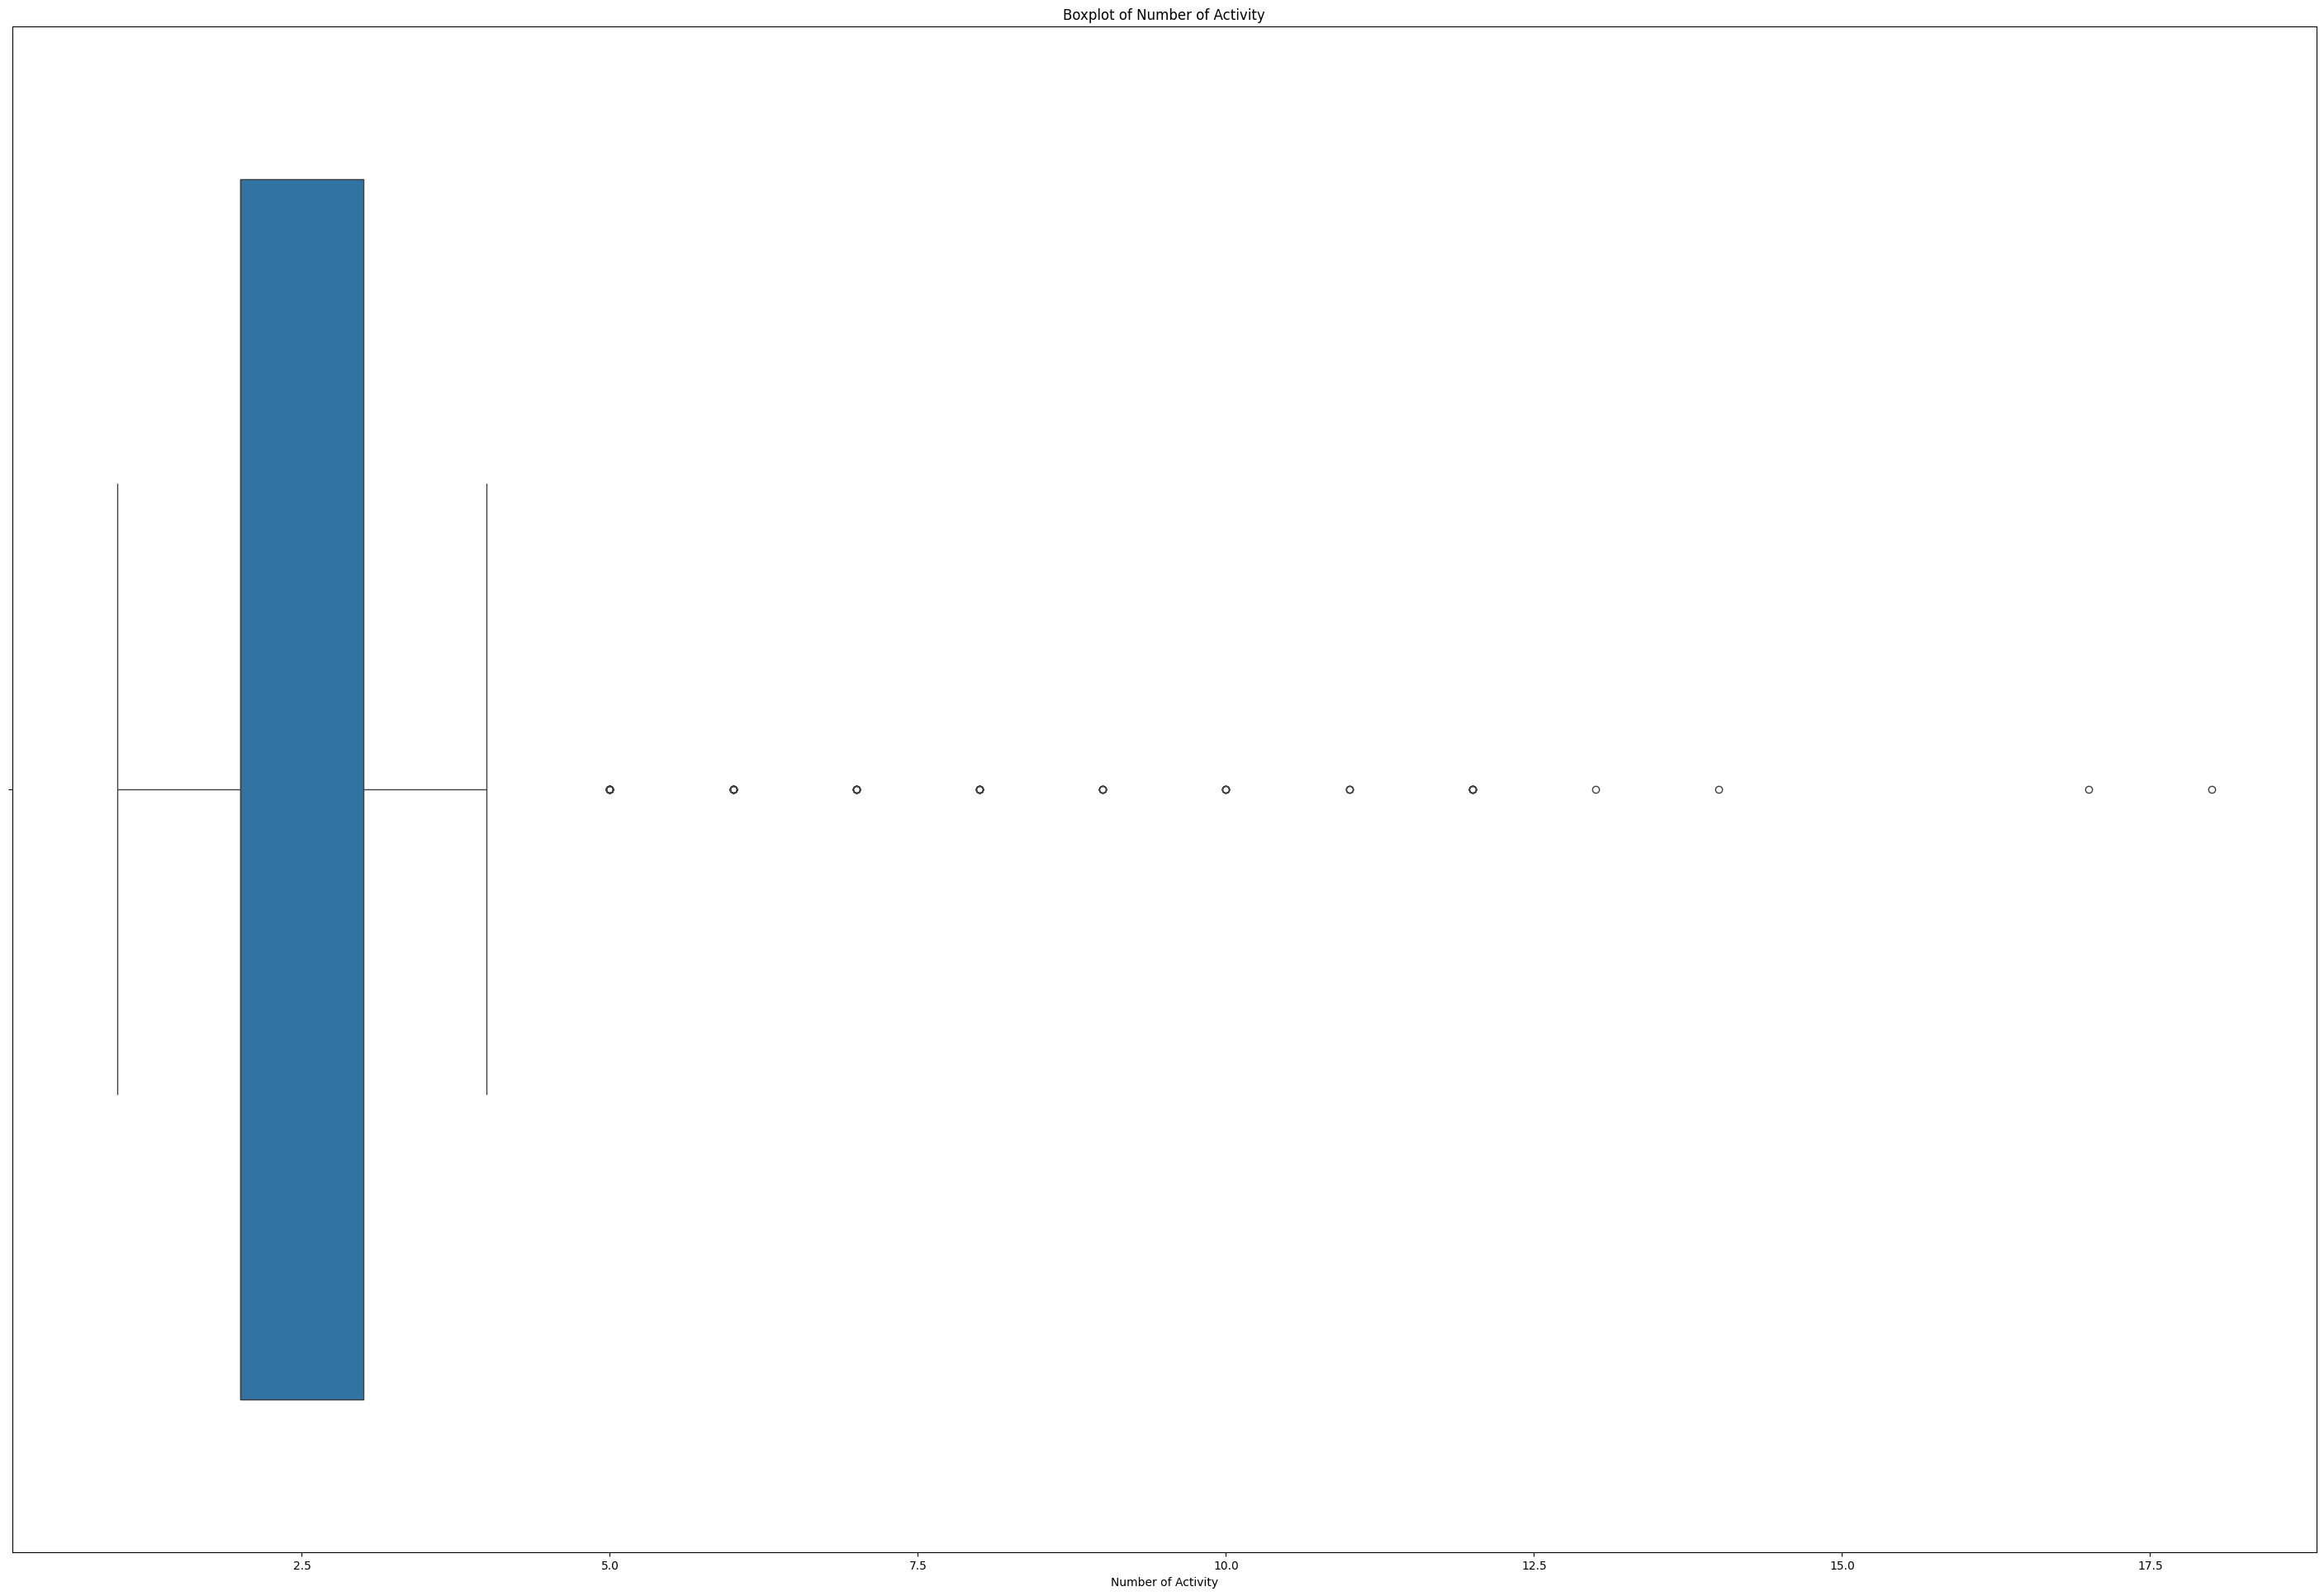

In [149]:
for column in df.columns:
    # Check if the column contains numeric data AND has more than one unique value
    if pd.api.types.is_numeric_dtype(df[column]) and df[column].nunique() > 1:
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

In [150]:
invalid_values = ['NA', 'NaN', 'blank', 'other', 'others', 'Na']  # Add any other invalid placeholder values
df.replace(invalid_values, np.nan, inplace=True)

In [151]:
# Missing Value Analysis
missing_values = df.isnull().sum()
print(missing_values)


Project: Project Name          0
Site Visit Name                0
Created Date                   0
Walkin Date                    0
Permanent Zip/Postal Code      4
Age                            0
Gender                         0
Nature of Purchase             0
Current Residential Type       0
Home Loan Status               0
Occupation                     0
Designation                  273
Industry                       0
Possession Required            0
Configuration                  0
Budget                         0
Desired Carpet Area            0
Cultural Background            0
Actual Budget                  0
Address details               55
Tower/Unit pitched            29
Visited with Family            0
Task Status                    0
Remarks                        0
No of revisit                  0
Last Modified Date             0
Number of Activity             0
Lead Source                    0
Organization                 270
Account Name                   0
dtype: int

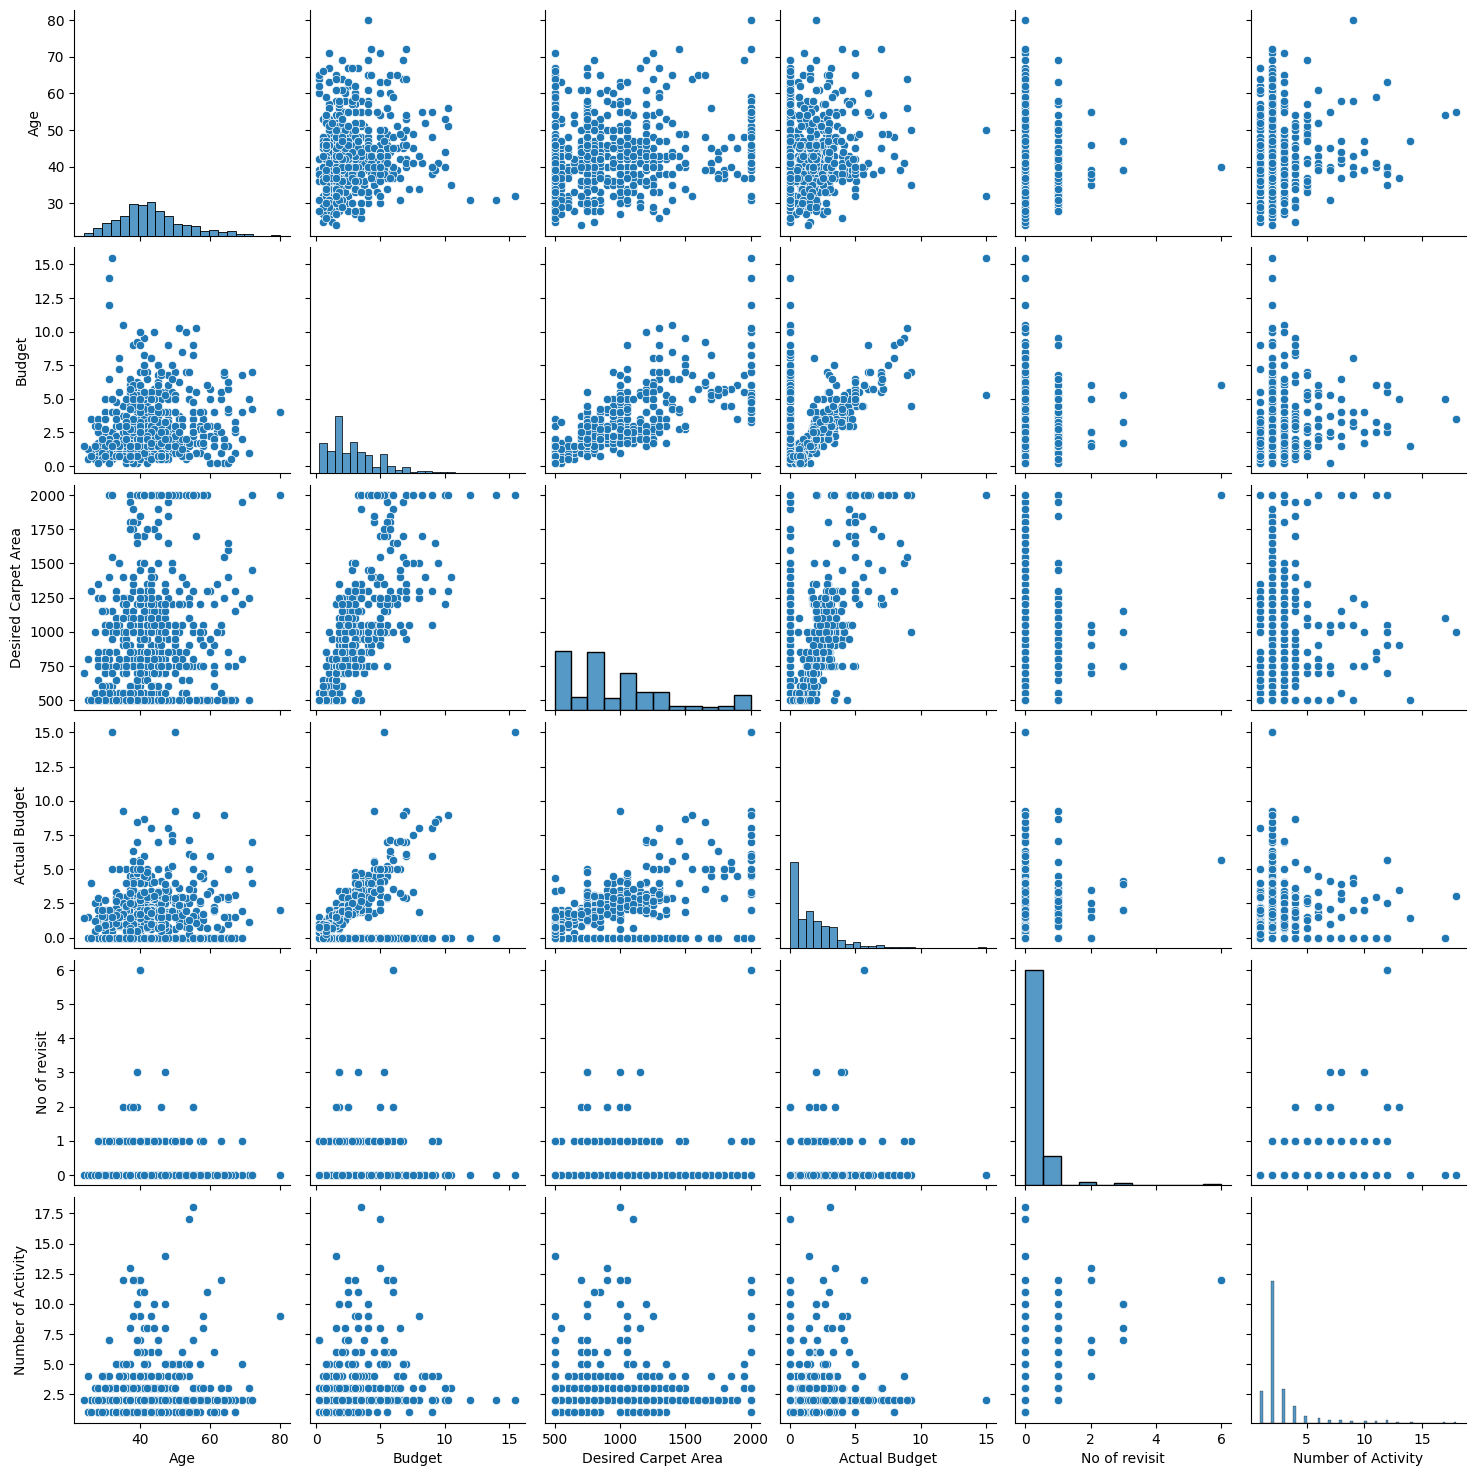

In [152]:
# prompt: do the data visualisation

# Scatter Plot Example (Choose two relevant numeric columns)
if 'column1' in df.columns and 'column2' in df.columns and pd.api.types.is_numeric_dtype(df['column1']) and pd.api.types.is_numeric_dtype(df['column2']):
    sns.scatterplot(x='column1', y='column2', data=df)
    plt.title('Scatter Plot: column1 vs column2')
    plt.show()


# Pair Plot Example (Visualize relationships between multiple numeric columns)
numeric_columns = df.select_dtypes(include=np.number).columns
if len(numeric_columns) > 1:
    sns.pairplot(df[numeric_columns])
    plt.show()


# Bar Plot for Categorical Data (Choose a categorical column and a numeric column to compare)
if 'categorical_column' in df.columns and 'numeric_column' in df.columns and pd.api.types.is_numeric_dtype(df['numeric_column']):
  sns.barplot(x='categorical_column', y='numeric_column', data=df)
  plt.title('Bar Plot: numeric_column by categorical_column')
  plt.show()

# Violin Plot Example (Choose a categorical column and a numeric column to compare distribution)
if 'categorical_column' in df.columns and 'numeric_column' in df.columns and pd.api.types.is_numeric_dtype(df['numeric_column']):
  sns.violinplot(x='categorical_column', y='numeric_column', data=df)
  plt.title('Violin Plot: numeric_column by categorical_column')
  plt.show()


After changing categorical column plot and see the graphs

In [153]:
df.head()

Project: Project Name Site Visit Name Created Date Walkin Date  \
0        Elixir Reserve        SV-37487     4/1/2025    4/1/2025   
1              Centrona        SV-37488     4/1/2025    4/1/2025   
2           THE GATEWAY        SV-37489     4/1/2025    4/1/2025   
3              Centrona        SV-37490     4/1/2025    4/1/2025   
4              Centrona        SV-37493     4/1/2025    4/1/2025   

  Permanent Zip/Postal Code  Age  Gender Nature of Purchase  \
0                    560023   50  Female           Self-use   
1                    400708   41    Male           Self-use   
2                    400053   36    Male         Investment   
3                    400076   58    Male           Self-use   
4                    431602   38    Male           Self-use   

  Current Residential Type Home Loan Status  ... Tower/Unit pitched  \
0                    Owned   To be approved  ...             1407/8   
1                    Owned   To be approved  ...                528   
2                   Rented     Self-Funding  ...               3001   
3                    Owned   To be approved  ...              2 BHK   
4                    Owned   To be approved  ...               1613   

  Visited with Family Task Status  \
0                  No        Cold   
1                 Yes        Keen   
2                  No        Cold   
3                  No        Warm   
4                 Yes        Lost   

                                             Remarks No of revisit  \
0  Women visited with his sister, looking for a 2...             0   
1  Client is looking for 2bhk nova 4th floor b wi...             0   
2  Client is looking for a 3 BHK for investment. ...             0   
3  Client took all the info. Looking at 2 BHK. Wi...             0   
4  Liked the project\nBut cannot take the decisio...             0   

   Last Modified Date  Number of Activity      Lead Source  Organization  \
0            6/1/2025                   5  Channel Partner           NaN   
1           11/1/2025                   8  Channel Partner           NaN   
2            6/1/2025                   2          Website          Abcd   
3           10/1/2025                   3  Channel Partner    Electrical   
4            5/1/2025                   1  Channel Partner          MCGM   

          Account Name  
0             Kejriwal  
1              krishna  
2              Karan P  
3        P b choudhary  
4  Dr Pradeep kapsiker  

[5 rows x 30 columns]

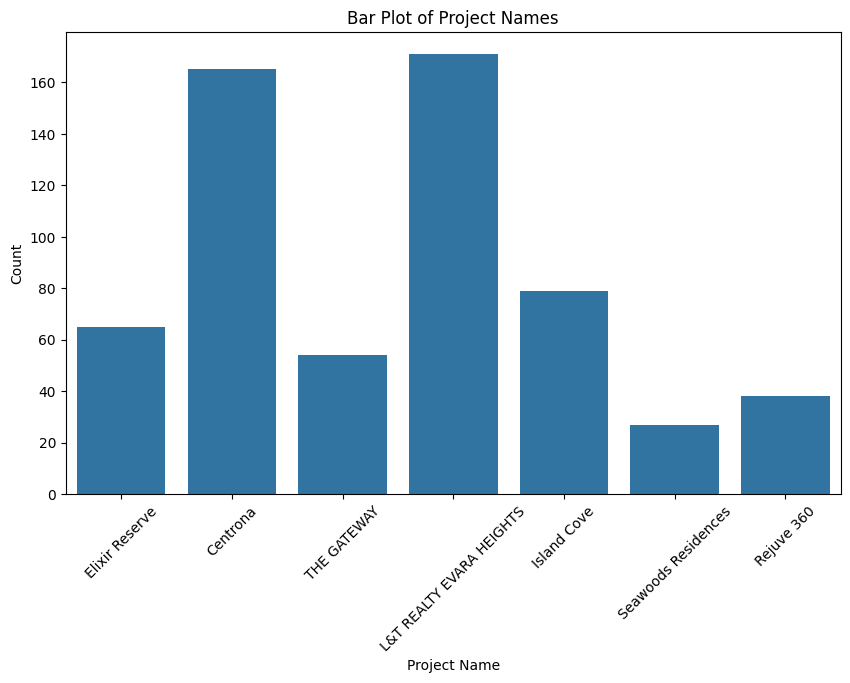

In [154]:
if 'Project: Project Name' in df.columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x='Project: Project Name', data=df)
  plt.xticks(rotation=45)
  plt.xlabel('Project Name')
  plt.ylabel('Count')
  plt.title('Bar Plot of Project Names')
  plt.show()

In [155]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Project: Project Name
L&T REALTY EVARA HEIGHTS    171
Centrona                    165
Island Cove                  79
Elixir Reserve               65
THE GATEWAY                  54
Rejuve 360                   38
Seawoods Residences          27
Name: count, dtype: int64
******************************
Site Visit Name
SV-38329    1
SV-37487    1
SV-37488    1
SV-37489    1
SV-37490    1
           ..
SV-37524    1
SV-37526    1
SV-37527    1
SV-37529    1
SV-37530    1
Name: count, Length: 599, dtype: int64
******************************
Created Date
5/1/2025     127
4/1/2025     106
12/1/2025     99
11/1/2025     99
7/1/2025      36
6/1/2025      30
10/1/2025     27
8/1/2025      27
9/1/2025      26
13/1/2025     22
Name: count, dtype: int64
******************************
Walkin Date
5/1/2025      111
4/1/2025      106
11/1/2025      94
12/1/2025      86
7/1/2025       32
6/1/2025       29
9/1/2025       26
8/1/2025       23
10/1/2025      23
13/1/2025      22
29/12/2024      5
28/12/2

In [156]:
import re

In [157]:
df['Walkin Date'].value_counts()

Walkin Date
5/1/2025      111
4/1/2025      106
11/1/2025      94
12/1/2025      86
7/1/2025       32
6/1/2025       29
9/1/2025       26
8/1/2025       23
10/1/2025      23
13/1/2025      22
29/12/2024      5
28/12/2024      3
30/11/2024      3
21/12/2024      2
26/12/2024      2
27/10/2024      2
31/12/2024      2
11/12/2024      2
27/12/2024      2
7/12/2024       2
8/12/2024       2
30/12/2024      2
25/10/2024      2
13/12/2024      1
20/12/2024      1
18/12/2024      1
3/1/2025        1
14/12/2024      1
24/11/2024      1
3/11/2024       1
15/12/2024      1
23/11/2024      1
3/12/2024       1
25/12/2024      1
29/10/2024      1
17/11/2024      1
1/12/2024       1
28/11/2024      1
31/10/2024      1
Name: count, dtype: int64

In [158]:
# Assuming 'Walkin Date' is the column you're interested in
if 'Walkin Date' in df.columns:
  has_nat = df['Walkin Date'].isnull().any()
  if has_nat:
    print("The 'Walkin Date' column contains NAT values.")
  else:
    print("The 'Walkin Date' column does not contain NAT values.")

The 'Walkin Date' column does not contain NAT values.


talk with paras for walkin date

In [159]:
# prompt: increase the picture size for the below plot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

# ... (Your existing code) ...

# Increase the figure size for all plots
plt.rcParams['figure.figsize'] = (12, 8)  # Adjust width and height as needed


# ... (Your existing code for plotting) ...

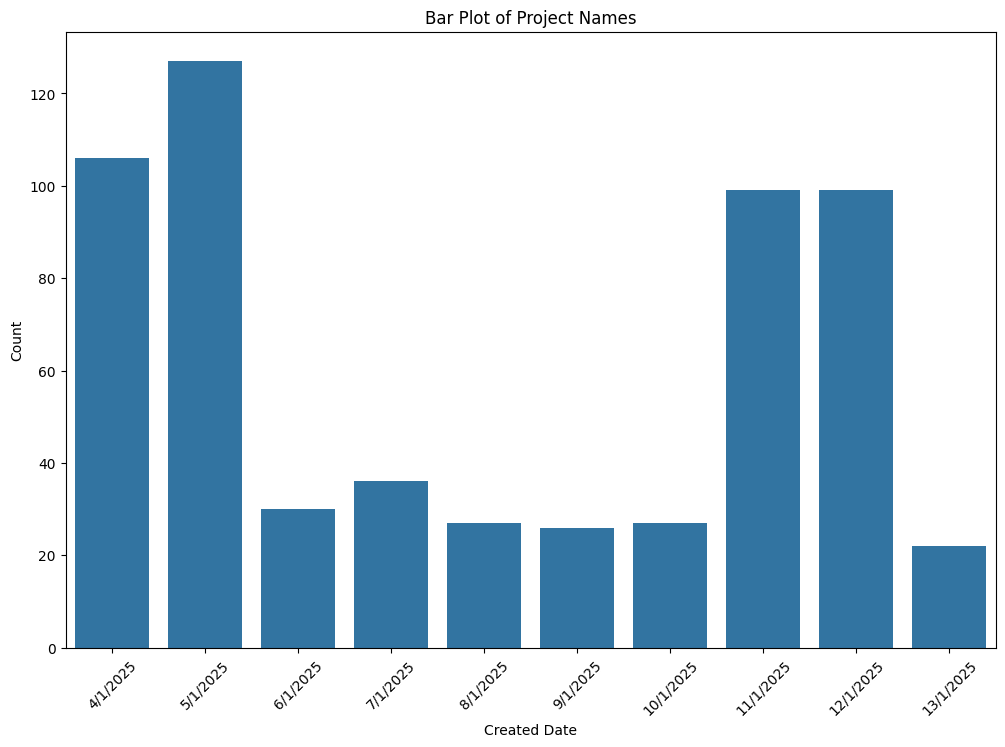

In [160]:
if 'Created Date' in df.columns:
  sns.countplot(x='Created Date', data=df)
  plt.xticks(rotation=45)
  plt.xlabel('Created Date')
  plt.ylabel('Count')
  plt.title('Bar Plot of Project Names')
  plt.show()

In [161]:
# # prompt: if 'Created Date' in df.columns:
# #   sns.countplot(x='Created Date', data=df)
# #   plt.xticks(rotation=45)
# #   plt.xlabel('Created Date')
# #   plt.ylabel('Count')
# #   plt.title('Bar Plot of Project Names')
# #   plt.show()
# # Arrange the date in ascending order of date wise and make it bigger to see the dates clearly

# # ... (Your existing code) ...

# # Increase the figure size for all plots
# plt.rcParams['figure.figsize'] = (36,24)  # Adjust width and height as needed

# if 'Created Date' in df.columns:
#   # Convert 'Created Date' to datetime objects if they are not already
#   if not pd.api.types.is_datetime64_any_dtype(df['Created Date']):
#     try:
#       df['Created Date'] = pd.to_datetime(df['Created Date'])
#     except ValueError:
#       print("Could not convert 'Created Date' to datetime objects.")

#   # Sort the DataFrame by 'Created Date' in ascending order
#   df_sorted = df.sort_values(by='Created Date')

#   # Create the countplot using the sorted DataFrame
#   sns.countplot(x='Created Date', data=df_sorted)
#   plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
#   plt.xlabel('Created Date')
#   plt.ylabel('Count')
#   plt.title('Bar Plot of Created Dates (Sorted)')
#   plt.tight_layout()  # Adjust layout to prevent labels from overlapping
#   plt.show()

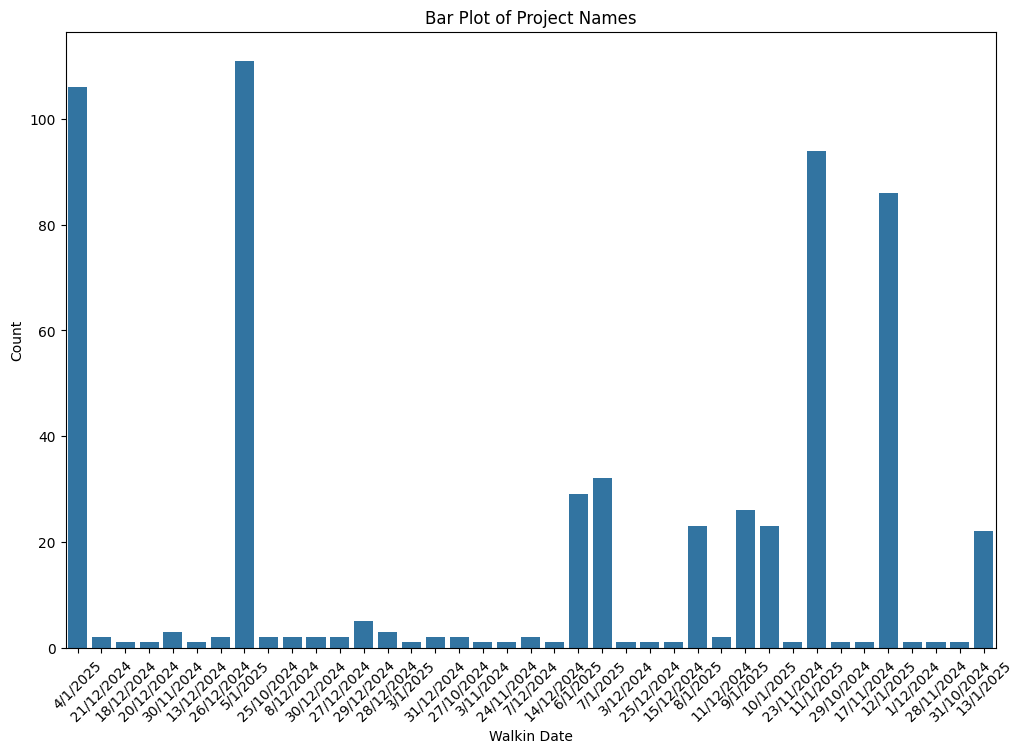

In [162]:
if 'Walkin Date' in df.columns:
  sns.countplot(x='Walkin Date', data=df)
  plt.xticks(rotation=45)
  plt.xlabel('Walkin Date')
  plt.ylabel('Count')
  plt.title('Bar Plot of Project Names')
  plt.show()

In [163]:
max_date = df['Walkin Date'].max()
min_date = df['Walkin Date'].min()
print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 1/12/2024
Maximum date: 9/1/2025


In [164]:
# # prompt: plot all the counts from 1/7/2024 to 9/9/2024 Walkin Date

# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Assuming 'Walkin Date' is the column with the dates you want to plot
# if 'Walkin Date' in df.columns:
#   # Filter the DataFrame to include only dates within the specified range
#   start_date = pd.to_datetime('2024-01-07')
#   end_date = pd.to_datetime('2024-09-09')
#   df_filtered = df[(df['Walkin Date'] >= start_date) & (df['Walkin Date'] <= end_date)]

#   # Create a countplot showing the counts for each date within the range
#   plt.figure(figsize=(12, 6))  # Adjust figure size as needed
#   sns.countplot(x='Walkin Date', data=df_filtered)
#   plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
#   plt.xlabel('Walkin Date')
#   plt.ylabel('Count')
#   plt.title('Counts of Walkin Dates from 2024-01-07 to 2024-09-09')
#   plt.tight_layout()
#   plt.show()

In [165]:
df['No of revisit'].value_counts()

No of revisit
0    514
1     71
2      7
3      5
6      2
Name: count, dtype: int64

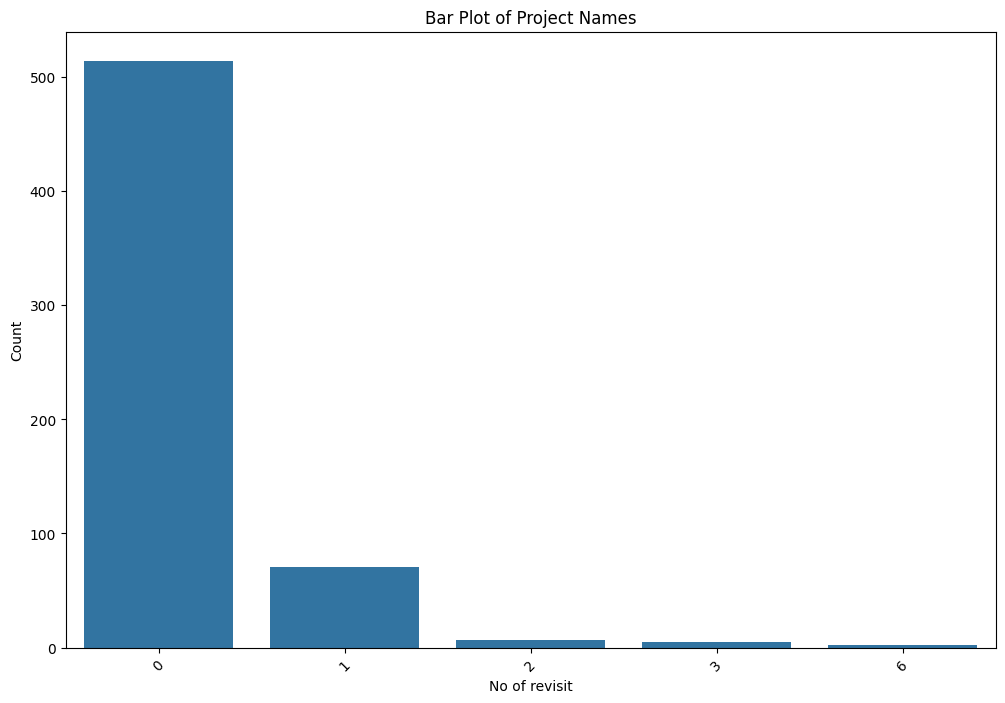

In [166]:
if 'No of revisit' in df.columns:
  sns.countplot(x='No of revisit', data=df)
  plt.xticks(rotation=45)
  plt.xlabel('No of revisit')
  plt.ylabel('Count')
  plt.title('Bar Plot of Project Names')
  plt.show()

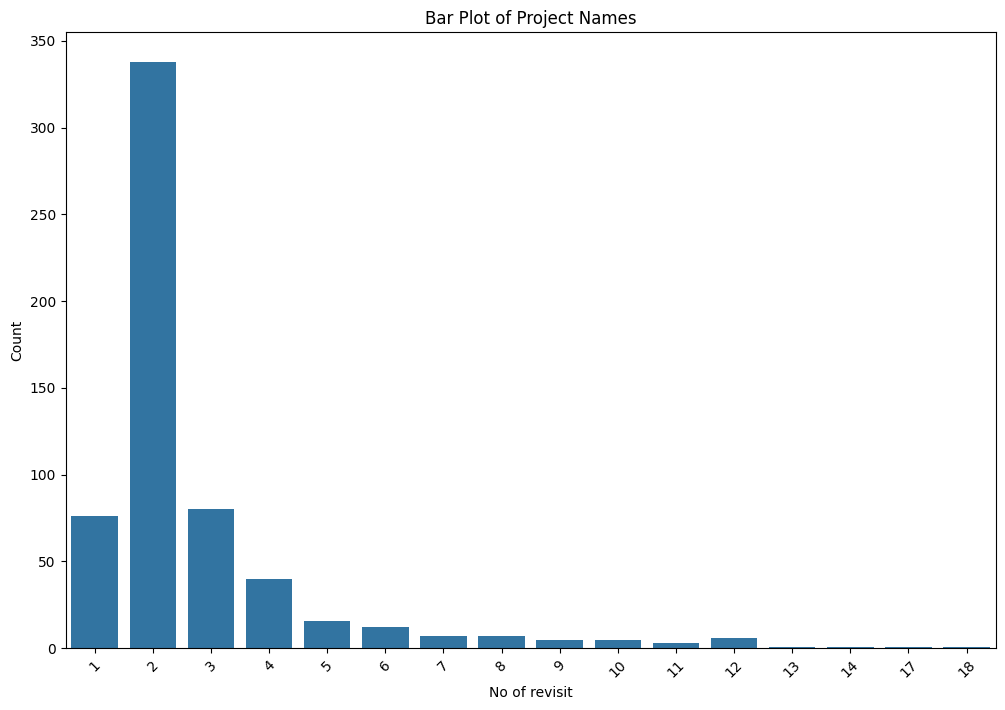

In [167]:
sns.countplot(x='Number of Activity', data=df)
plt.xticks(rotation=45)
plt.xlabel('No of revisit')
plt.ylabel('Count')
plt.title('Bar Plot of Project Names')
plt.show()

In [168]:
df['Project: Project Name'].apply(lambda x: 'Powai' if (x == 'Elixir Reserve') or (x == 'Emerald Isle, Powai') else x)

0                         Powai
1                      Centrona
2                   THE GATEWAY
3                      Centrona
4                      Centrona
                 ...           
594         Seawoods Residences
595                    Centrona
596    L&T REALTY EVARA HEIGHTS
597    L&T REALTY EVARA HEIGHTS
598                 Island Cove
Name: Project: Project Name, Length: 599, dtype: object

In [169]:
df['Project: Project Name'].value_counts()

Project: Project Name
L&T REALTY EVARA HEIGHTS    171
Centrona                    165
Island Cove                  79
Elixir Reserve               65
THE GATEWAY                  54
Rejuve 360                   38
Seawoods Residences          27
Name: count, dtype: int64

In [170]:
df['Budget'].dtypes

dtype('float64')

In [171]:
df[df['Budget'] == 0.00]

Empty DataFrame
Columns: [Project: Project Name, Site Visit Name, Created Date, Walkin Date, Permanent Zip/Postal Code, Age, Gender, Nature of Purchase, Current Residential Type, Home Loan Status, Occupation, Designation, Industry, Possession Required, Configuration, Budget, Desired Carpet Area, Cultural Background, Actual Budget, Address details, Tower/Unit pitched, Visited with Family, Task Status, Remarks, No of revisit, Last Modified Date, Number of Activity, Lead Source, Organization, Account Name]
Index: []

[0 rows x 30 columns]

In [172]:
df = df[df['Budget'] != 0]
df = df[df['Budget'] != 0.0]
df = df[df['Budget'] != 0.00]

In [173]:
df.columns

Index(['Project: Project Name', 'Site Visit Name', 'Created Date',
       'Walkin Date', 'Permanent Zip/Postal Code', 'Age', 'Gender',
       'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
       'Occupation', 'Designation', 'Industry', 'Possession Required',
       'Configuration', 'Budget', 'Desired Carpet Area', 'Cultural Background',
       'Actual Budget', 'Address details', 'Tower/Unit pitched',
       'Visited with Family', 'Task Status', 'Remarks', 'No of revisit',
       'Last Modified Date', 'Number of Activity', 'Lead Source',
       'Organization', 'Account Name'],
      dtype='object')

In [174]:
df['Actual Budget'].value_counts()

Actual Budget
0.00    192
3.00     19
1.50     15
1.00     12
2.00     12
       ... 
2.39      1
3.02      1
2.65      1
1.76      1
3.35      1
Name: count, Length: 187, dtype: int64

In [175]:
df['Budget'].value_counts()

Budget
1.50     55
3.00     54
1.75     43
1.00     40
2.00     39
0.75     36
4.00     34
2.50     29
0.50     25
5.00     24
3.50     22
2.75     21
3.25     20
2.25     18
1.25     13
5.50     13
0.25     11
4.50     10
7.00      9
6.00      9
5.25      9
5.75      8
4.25      8
3.75      7
6.75      5
4.75      4
6.50      4
9.00      4
6.25      4
8.00      3
7.50      3
10.00     3
10.25     2
8.25      2
7.25      1
8.50      1
10.50     1
9.50      1
14.00     1
12.00     1
15.50     1
9.25      1
Name: count, dtype: int64

In [176]:
# min_value = df['Budget'].min()
# max_value = df['Budget'].max()
# print(f"Minimum value: {min_value}")
# print(f"Maximum value: {max_value}")

In [177]:
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')
min_value = df['Budget'].min()
max_value = df['Budget'].max()
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0.25
Maximum value: 15.5


In [178]:
df['Budget'].dtype

dtype('float64')

In [179]:
df['Actual Budget'].isnull().sum()

np.int64(0)

In [180]:
min_value = df['Actual Budget'].min()
max_value = df['Actual Budget'].max()
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0.0
Maximum value: 15.0


In [181]:
# Ensure both 'Actual Budget' and 'Budget' are numeric, coercing errors (non-numeric values to NaN)
df['Actual Budget'] = pd.to_numeric(df['Actual Budget'], errors='coerce')
df['Budget'] = pd.to_numeric(df['Budget'], errors='coerce')

# Replace zeros in 'Actual Budget' with values from 'Budget' column
df.loc[df['Actual Budget'] == 0, 'Actual Budget'] = df.loc[df['Actual Budget'] == 0, 'Budget']

# Display the updated DataFrame
print(df[['Actual Budget', 'Budget']])

     Actual Budget  Budget
0             4.00    4.00
1             1.49    1.50
2             5.03    4.50
3             1.50    1.50
4             0.60    1.25
..             ...     ...
594           2.00    2.50
595           0.79    0.25
596           1.76    2.50
597           2.00    2.00
598           3.35    7.50

[599 rows x 2 columns]


In [182]:
min_value = df['Actual Budget'].min()
max_value = df['Actual Budget'].max()
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0.25
Maximum value: 15.0


In [183]:
print(df["Designation"].value_counts())

Designation
Manager                28
Owner                  24
Director               11
Partner                10
Doctor                  9
                       ..
Stock market trader     1
Power Industry          1
Solution architect      1
Head                    1
CEO                     1
Name: count, Length: 171, dtype: int64


In [184]:
df.transpose()

0    \
Project: Project Name                                         Elixir Reserve   
Site Visit Name                                                     SV-37487   
Created Date                                                        4/1/2025   
Walkin Date                                                         4/1/2025   
Permanent Zip/Postal Code                                             560023   
Age                                                                       50   
Gender                                                                Female   
Nature of Purchase                                                  Self-use   
Current Residential Type                                               Owned   
Home Loan Status                                              To be approved   
Occupation                                               Employed (Salaried)   
Designation                                                              NaN   
Industry                                                     Food & Beverage   
Possession Required                                                24 months   
Configuration                                                          3 BHK   
Budget                                                                   4.0   
Desired Carpet Area                                                     1050   
Cultural Background                                                    Other   
Actual Budget                                                            4.0   
Address details                                                    Bangalore   
Tower/Unit pitched                                                    1407/8   
Visited with Family                                                       No   
Task Status                                                             Cold   
Remarks                    Women visited with his sister, looking for a 2...   
No of revisit                                                              0   
Last Modified Date                                                  6/1/2025   
Number of Activity                                                         5   
Lead Source                                                  Channel Partner   
Organization                                                             NaN   
Account Name                                                        Kejriwal   

                                                                         1    \
Project: Project Name                                               Centrona   
Site Visit Name                                                     SV-37488   
Created Date                                                        4/1/2025   
Walkin Date                                                         4/1/2025   
Permanent Zip/Postal Code                                             400708   
Age                                                                       41   
Gender                                                                  Male   
Nature of Purchase                                                  Self-use   
Current Residential Type                                               Owned   
Home Loan Status                                              To be approved   
Occupation                                               Employed (Salaried)   
Designation                                                              Ceo   
Industry                                            Technology & IT Services   
Possession Required                                                12 months   
Configuration                                                          2 BHK   
Budget                                                                   1.5   
Desired Carpet Area                                                      550   
Cultural Background                                                    Other   
Actual Budget                                                           

In [185]:
grouped_columns = df.columns.to_series().groupby(df.dtypes).groups

# Print the type and corresponding column names
for dtype, columns in grouped_columns.items():
    print(f"Data Type: {dtype}")
    print(f"Columns: {list(columns)}\n")

Data Type: int64
Columns: ['Age', 'Desired Carpet Area', 'No of revisit', 'Number of Activity']

Data Type: float64
Columns: ['Budget', 'Actual Budget']

Data Type: object
Columns: ['Project: Project Name', 'Site Visit Name', 'Created Date', 'Walkin Date', 'Permanent Zip/Postal Code', 'Gender', 'Nature of Purchase', 'Current Residential Type', 'Home Loan Status', 'Occupation', 'Designation', 'Industry', 'Possession Required', 'Configuration', 'Cultural Background', 'Address details', 'Tower/Unit pitched', 'Visited with Family', 'Task Status', 'Remarks', 'Last Modified Date', 'Lead Source', 'Organization', 'Account Name']



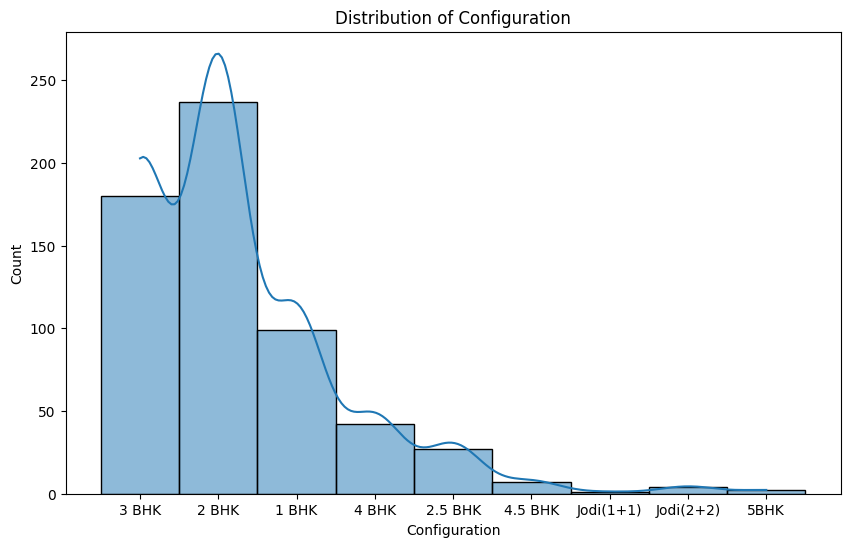

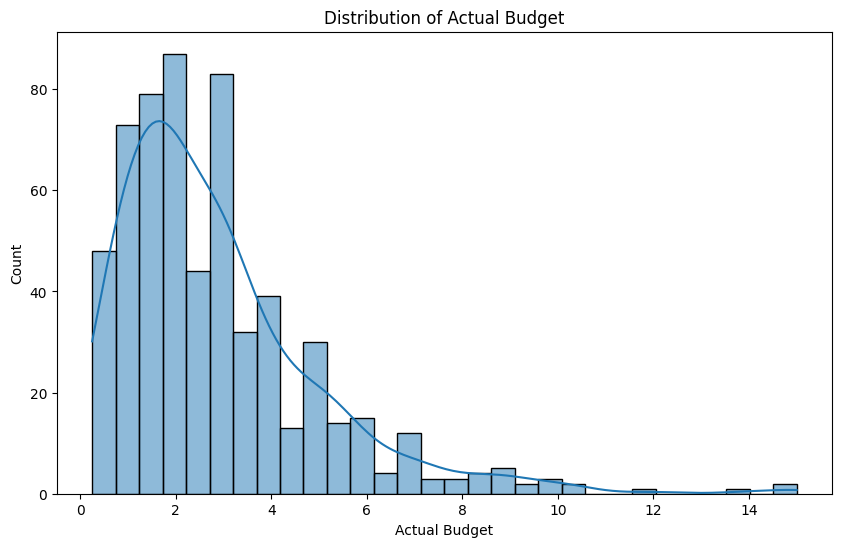

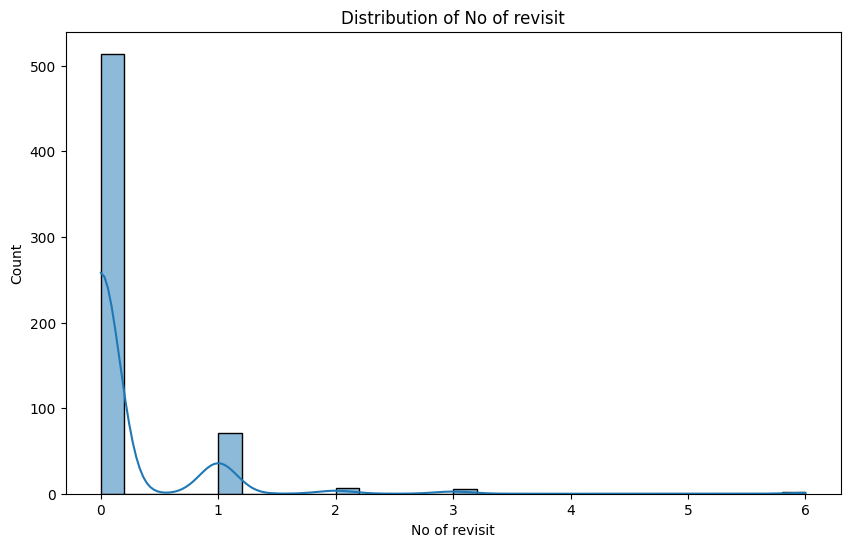

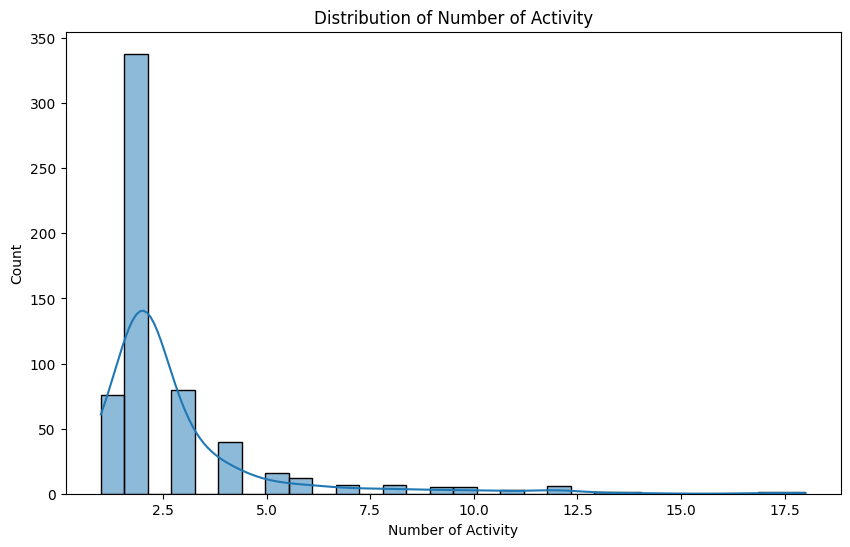

In [186]:
num_features = ['Configuration', 'Actual Budget', 'No of revisit','Number of Activity']

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [187]:
df['Actual Budget'].isnull().sum()

np.int64(0)

In [188]:
df['Budget'].isnull().sum()

np.int64(0)

In [189]:
df['Cultural Background'].isnull().sum()

np.int64(0)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Project: Project Name      599 non-null    object 
 1   Site Visit Name            599 non-null    object 
 2   Created Date               599 non-null    object 
 3   Walkin Date                599 non-null    object 
 4   Permanent Zip/Postal Code  595 non-null    object 
 5   Age                        599 non-null    int64  
 6   Gender                     599 non-null    object 
 7   Nature of Purchase         599 non-null    object 
 8   Current Residential Type   599 non-null    object 
 9   Home Loan Status           599 non-null    object 
 10  Occupation                 599 non-null    object 
 11  Designation                326 non-null    object 
 12  Industry                   599 non-null    object 
 13  Possession Required        599 non-null    object 

In [191]:
df.columns

Index(['Project: Project Name', 'Site Visit Name', 'Created Date',
       'Walkin Date', 'Permanent Zip/Postal Code', 'Age', 'Gender',
       'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
       'Occupation', 'Designation', 'Industry', 'Possession Required',
       'Configuration', 'Budget', 'Desired Carpet Area', 'Cultural Background',
       'Actual Budget', 'Address details', 'Tower/Unit pitched',
       'Visited with Family', 'Task Status', 'Remarks', 'No of revisit',
       'Last Modified Date', 'Number of Activity', 'Lead Source',
       'Organization', 'Account Name'],
      dtype='object')

In [192]:
df['Nature of Purchase']

0        Self-use
1        Self-use
2      Investment
3        Self-use
4        Self-use
          ...    
594      Self-use
595      Self-use
596    Investment
597      Self-use
598      Self-use
Name: Nature of Purchase, Length: 599, dtype: object

In [193]:
df['Nature of Purchase'].value_counts()

Nature of Purchase
Self-use      529
Investment     70
Name: count, dtype: int64

In [194]:
df['Nature of Purchase'].isnull().sum()

np.int64(0)

In [195]:
df['Current Residential Type'].value_counts()

Current Residential Type
Owned     532
Rented     67
Name: count, dtype: int64

In [196]:
df['Current Residential Type'].isnull().sum()

np.int64(0)

In [197]:
df['Home Loan Status'].value_counts()

Home Loan Status
To be approved    389
Self-Funding      190
Approved           20
Name: count, dtype: int64

In [198]:
df['Home Loan Status'].isnull().sum()

np.int64(0)

In [199]:
df[ 'Occupation'].value_counts()

Occupation
Employed (Salaried)             306
Business Owner/Self employed    166
Other                           102
Retired                          25
Name: count, dtype: int64

In [200]:
df['Occupation'].isnull().sum()

np.int64(0)

In [201]:
df['Designation'].value_counts()

Designation
Manager                28
Owner                  24
Director               11
Partner                10
Doctor                  9
                       ..
Stock market trader     1
Power Industry          1
Solution architect      1
Head                    1
CEO                     1
Name: count, Length: 171, dtype: int64

In [202]:
df['Designation'].isnull().sum()/df.shape[0]*100

np.float64(45.57595993322204)

In [203]:
df.columns

Index(['Project: Project Name', 'Site Visit Name', 'Created Date',
       'Walkin Date', 'Permanent Zip/Postal Code', 'Age', 'Gender',
       'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
       'Occupation', 'Designation', 'Industry', 'Possession Required',
       'Configuration', 'Budget', 'Desired Carpet Area', 'Cultural Background',
       'Actual Budget', 'Address details', 'Tower/Unit pitched',
       'Visited with Family', 'Task Status', 'Remarks', 'No of revisit',
       'Last Modified Date', 'Number of Activity', 'Lead Source',
       'Organization', 'Account Name'],
      dtype='object')

In [204]:
df['Industry'].value_counts()

Industry
Other                                     417
Financial Services                         42
Manufacturing & Industrial Engineering     31
Technology & IT Services                   27
Healthcare & Medical Services              19
Construction & Engineering                 14
Real Estate & Property Management           7
Accounting & Auditing                       6
Government & Public Administration          6
Retail & E-commerce                         6
Food & Beverage                             5
Marketing & Advertising                     5
Energy & Utilities                          5
Education & Training                        3
Hospitality & Tourism                       2
Automotive & Transportation                 2
Creative Arts & Entertainment               1
Non-Profit & Social Services                1
Name: count, dtype: int64

In [205]:
df['Industry'].isnull().sum()

np.int64(0)

In [206]:
df['Possession Required'].value_counts()

Possession Required
36 months    236
24 months    166
12 months    137
Immediate     26
48 months     15
72 months     12
60 months      7
Name: count, dtype: int64

In [207]:
df['Possession Required'] = df['Possession Required'].replace(['Immediate', 'Upfront'], '1 months')
df['Possession Required'].value_counts()

Possession Required
36 months    236
24 months    166
12 months    137
1 months      26
48 months     15
72 months     12
60 months      7
Name: count, dtype: int64

In [208]:
df['Possession Required'] = df['Possession Required'].str.replace('months', '').str.strip()
df['Possession Required'] = pd.to_numeric(df['Possession Required'], errors='coerce')

df[['Possession Required']].value_counts()

Possession Required
36                     236
24                     166
12                     137
1                       26
48                      15
72                      12
60                       7
Name: count, dtype: int64

In [209]:
df['Configuration'].value_counts()

Configuration
2 BHK        237
3 BHK        180
1 BHK         99
4 BHK         42
2.5 BHK       27
4.5 BHK        7
Jodi(2+2)      4
5BHK           2
Jodi(1+1)      1
Name: count, dtype: int64

In [210]:
# def process_jodi_value(value):
#     # Extract the numbers inside parentheses
#     match = re.search(r'Jodi\((\d+)\+(\d+)\)', value)

#     if match:
#         n1 = int(match.group(1))  # First number
#         n2 = int(match.group(2))  # Second number
#         total = n1 + n2           # Calculate the sum
#         return f'{total} BHK'     # Return in "sum BHK" format
#     return value  # In case the pattern is not matched, return the original value

# # Apply the function to the 'configuration' column
# df['Configuration'] = df['Configuration'].apply(process_jodi_value)

In [211]:
import re
import pandas as pd

def process_jodi_value(value):
    # Convert value to string if it is not already a string or bytes-like object
    if not isinstance(value, (str, bytes)):
        value = str(value)

    # Extract the numbers inside parentheses
    match = re.search(r'Jodi\((\d+)\+(\d+)\)', value)

    if match:
        n1 = int(match.group(1))  # First number
        n2 = int(match.group(2))  # Second number
        total = n1 + n2           # Calculate the sum
        return f'{total} BHK'     # Return in "sum BHK" format
    return value  # In case the pattern is not matched, return the original value

# Apply the function to the 'configuration' column
df['Configuration'] = df['Configuration'].apply(process_jodi_value)

In [212]:
df['Configuration'].value_counts()

Configuration
2 BHK      238
3 BHK      180
1 BHK       99
4 BHK       46
2.5 BHK     27
4.5 BHK      7
5BHK         2
Name: count, dtype: int64

In [213]:
# prompt: drop one with value nan

df.dropna(subset=['Configuration'], inplace=True)

In [214]:
df.columns

Index(['Project: Project Name', 'Site Visit Name', 'Created Date',
       'Walkin Date', 'Permanent Zip/Postal Code', 'Age', 'Gender',
       'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
       'Occupation', 'Designation', 'Industry', 'Possession Required',
       'Configuration', 'Budget', 'Desired Carpet Area', 'Cultural Background',
       'Actual Budget', 'Address details', 'Tower/Unit pitched',
       'Visited with Family', 'Task Status', 'Remarks', 'No of revisit',
       'Last Modified Date', 'Number of Activity', 'Lead Source',
       'Organization', 'Account Name'],
      dtype='object')

In [215]:
df['Budget'].isnull().sum()

np.int64(0)

In [216]:
df['Actual Budget'].isnull().sum()

np.int64(0)

In [217]:
df['Desired Carpet Area'].value_counts()

Desired Carpet Area
500     100
750      75
1000     43
2000     33
850      32
800      32
1050     31
1200     31
550      27
700      22
1250     20
1300     18
950      18
600      16
1100     15
900      12
1150     12
650      11
1350      7
1500      7
1400      7
1700      5
1750      4
1450      4
1800      4
1950      3
1650      3
1900      2
1850      2
1550      2
1600      1
Name: count, dtype: int64

In [218]:
df['Desired Carpet Area'].isnull().sum()

np.int64(0)

In [219]:
df['Desired Carpet Area'].replace({'550 to 650 sq.ft.': 600})

0      1050
1       550
2      1250
3       500
4       500
       ... 
594    1200
595     500
596     700
597    1200
598    2000
Name: Desired Carpet Area, Length: 599, dtype: int64

In [220]:
# df['Desired Carpet Area'] = df['Desired Carpet Area'].str.replace('sq.ft.', '').str.strip()
# df['Desired Carpet Area'] = pd.to_numeric(df['Desired Carpet Area'], errors='coerce')

# df[['Desired Carpet Area']].value_counts()

In [221]:
# Convert 'Desired Carpet Area' column to string type before using .str accessor
df['Desired Carpet Area'] = df['Desired Carpet Area'].astype(str)
df['Desired Carpet Area'] = df['Desired Carpet Area'].str.replace('sq.ft.', '').str.strip()
df['Desired Carpet Area'] = pd.to_numeric(df['Desired Carpet Area'], errors='coerce')

df[['Desired Carpet Area']].value_counts()

Desired Carpet Area
500                    100
750                     75
1000                    43
2000                    33
850                     32
800                     32
1050                    31
1200                    31
550                     27
700                     22
1250                    20
950                     18
1300                    18
600                     16
1100                    15
900                     12
1150                    12
650                     11
1350                     7
1500                     7
1400                     7
1700                     5
1450                     4
1800                     4
1750                     4
1650                     3
1950                     3
1900                     2
1550                     2
1850                     2
1600                     1
Name: count, dtype: int64

In [222]:
df['Desired Carpet Area'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 599 entries, 0 to 598
Series name: Desired Carpet Area
Non-Null Count  Dtype
--------------  -----
599 non-null    int64
dtypes: int64(1)
memory usage: 4.8 KB


In [223]:
df['Cultural Background'].isnull().sum()

np.int64(0)

In [224]:
df['Cultural Background'].value_counts()

Cultural Background
Maharashtrian    200
Other            178
Gujarati          49
Muslim            49
Jain              32
Marwari           17
Sindhi            13
Punjabi           13
Christian         11
Tamil              8
Bengali            8
Telugu             6
Malayali           5
Kannadiga          4
Rajasthani         3
Assamese           1
Hindi              1
Odia               1
Name: count, dtype: int64

In [225]:
df['Address details'].value_counts()

Address details
na                     63
Thane                  58
Powai                  12
Ghatkopar              11
Mumbai                  9
                       ..
mumbaui                 1
Worli Naka              1
Lodha Park              1
Sion East               1
Majiwada Thane West     1
Name: count, Length: 264, dtype: int64

In [226]:
df['Tower/Unit pitched'].value_counts()

Tower/Unit pitched
na           14
840          13
1214         13
C1 and C2    11
2 BHK        10
             ..
2608          1
02            1
B2803         1
808 - 06      1
1201          1
Name: count, Length: 253, dtype: int64

In [227]:
df.columns

Index(['Project: Project Name', 'Site Visit Name', 'Created Date',
       'Walkin Date', 'Permanent Zip/Postal Code', 'Age', 'Gender',
       'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
       'Occupation', 'Designation', 'Industry', 'Possession Required',
       'Configuration', 'Budget', 'Desired Carpet Area', 'Cultural Background',
       'Actual Budget', 'Address details', 'Tower/Unit pitched',
       'Visited with Family', 'Task Status', 'Remarks', 'No of revisit',
       'Last Modified Date', 'Number of Activity', 'Lead Source',
       'Organization', 'Account Name'],
      dtype='object')

In [228]:
df['Visited with Family'].value_counts()

Visited with Family
Yes    307
No     292
Name: count, dtype: int64

In [229]:
df['Visited with Family'].isnull().sum()

np.int64(0)

In [230]:
df['Task Status'].value_counts()

Task Status
Cold             431
Lost              55
Keen              38
Not Qualified     31
Warm              27
Booked            14
Hot                3
Name: count, dtype: int64

**Discuss with Paras about this once more**

----
No of Activity



In [231]:
df['No of revisit'].value_counts()

No of revisit
0    514
1     71
2      7
3      5
6      2
Name: count, dtype: int64

In [232]:
df['Number of Activity'].value_counts()

Number of Activity
2     338
3      80
1      76
4      40
5      16
6      12
7       7
8       7
12      6
10      5
9       5
11      3
18      1
14      1
13      1
17      1
Name: count, dtype: int64

In [233]:
df['Last Modified Date'].value_counts()

Last Modified Date
12/1/2025    107
10/1/2025    101
13/1/2025     93
11/1/2025     88
5/1/2025      51
9/1/2025      39
6/1/2025      38
8/1/2025      30
7/1/2025      26
4/1/2025      23
14/1/2025      3
Name: count, dtype: int64

Could not convert 'Last Modified Date' to datetime objects.


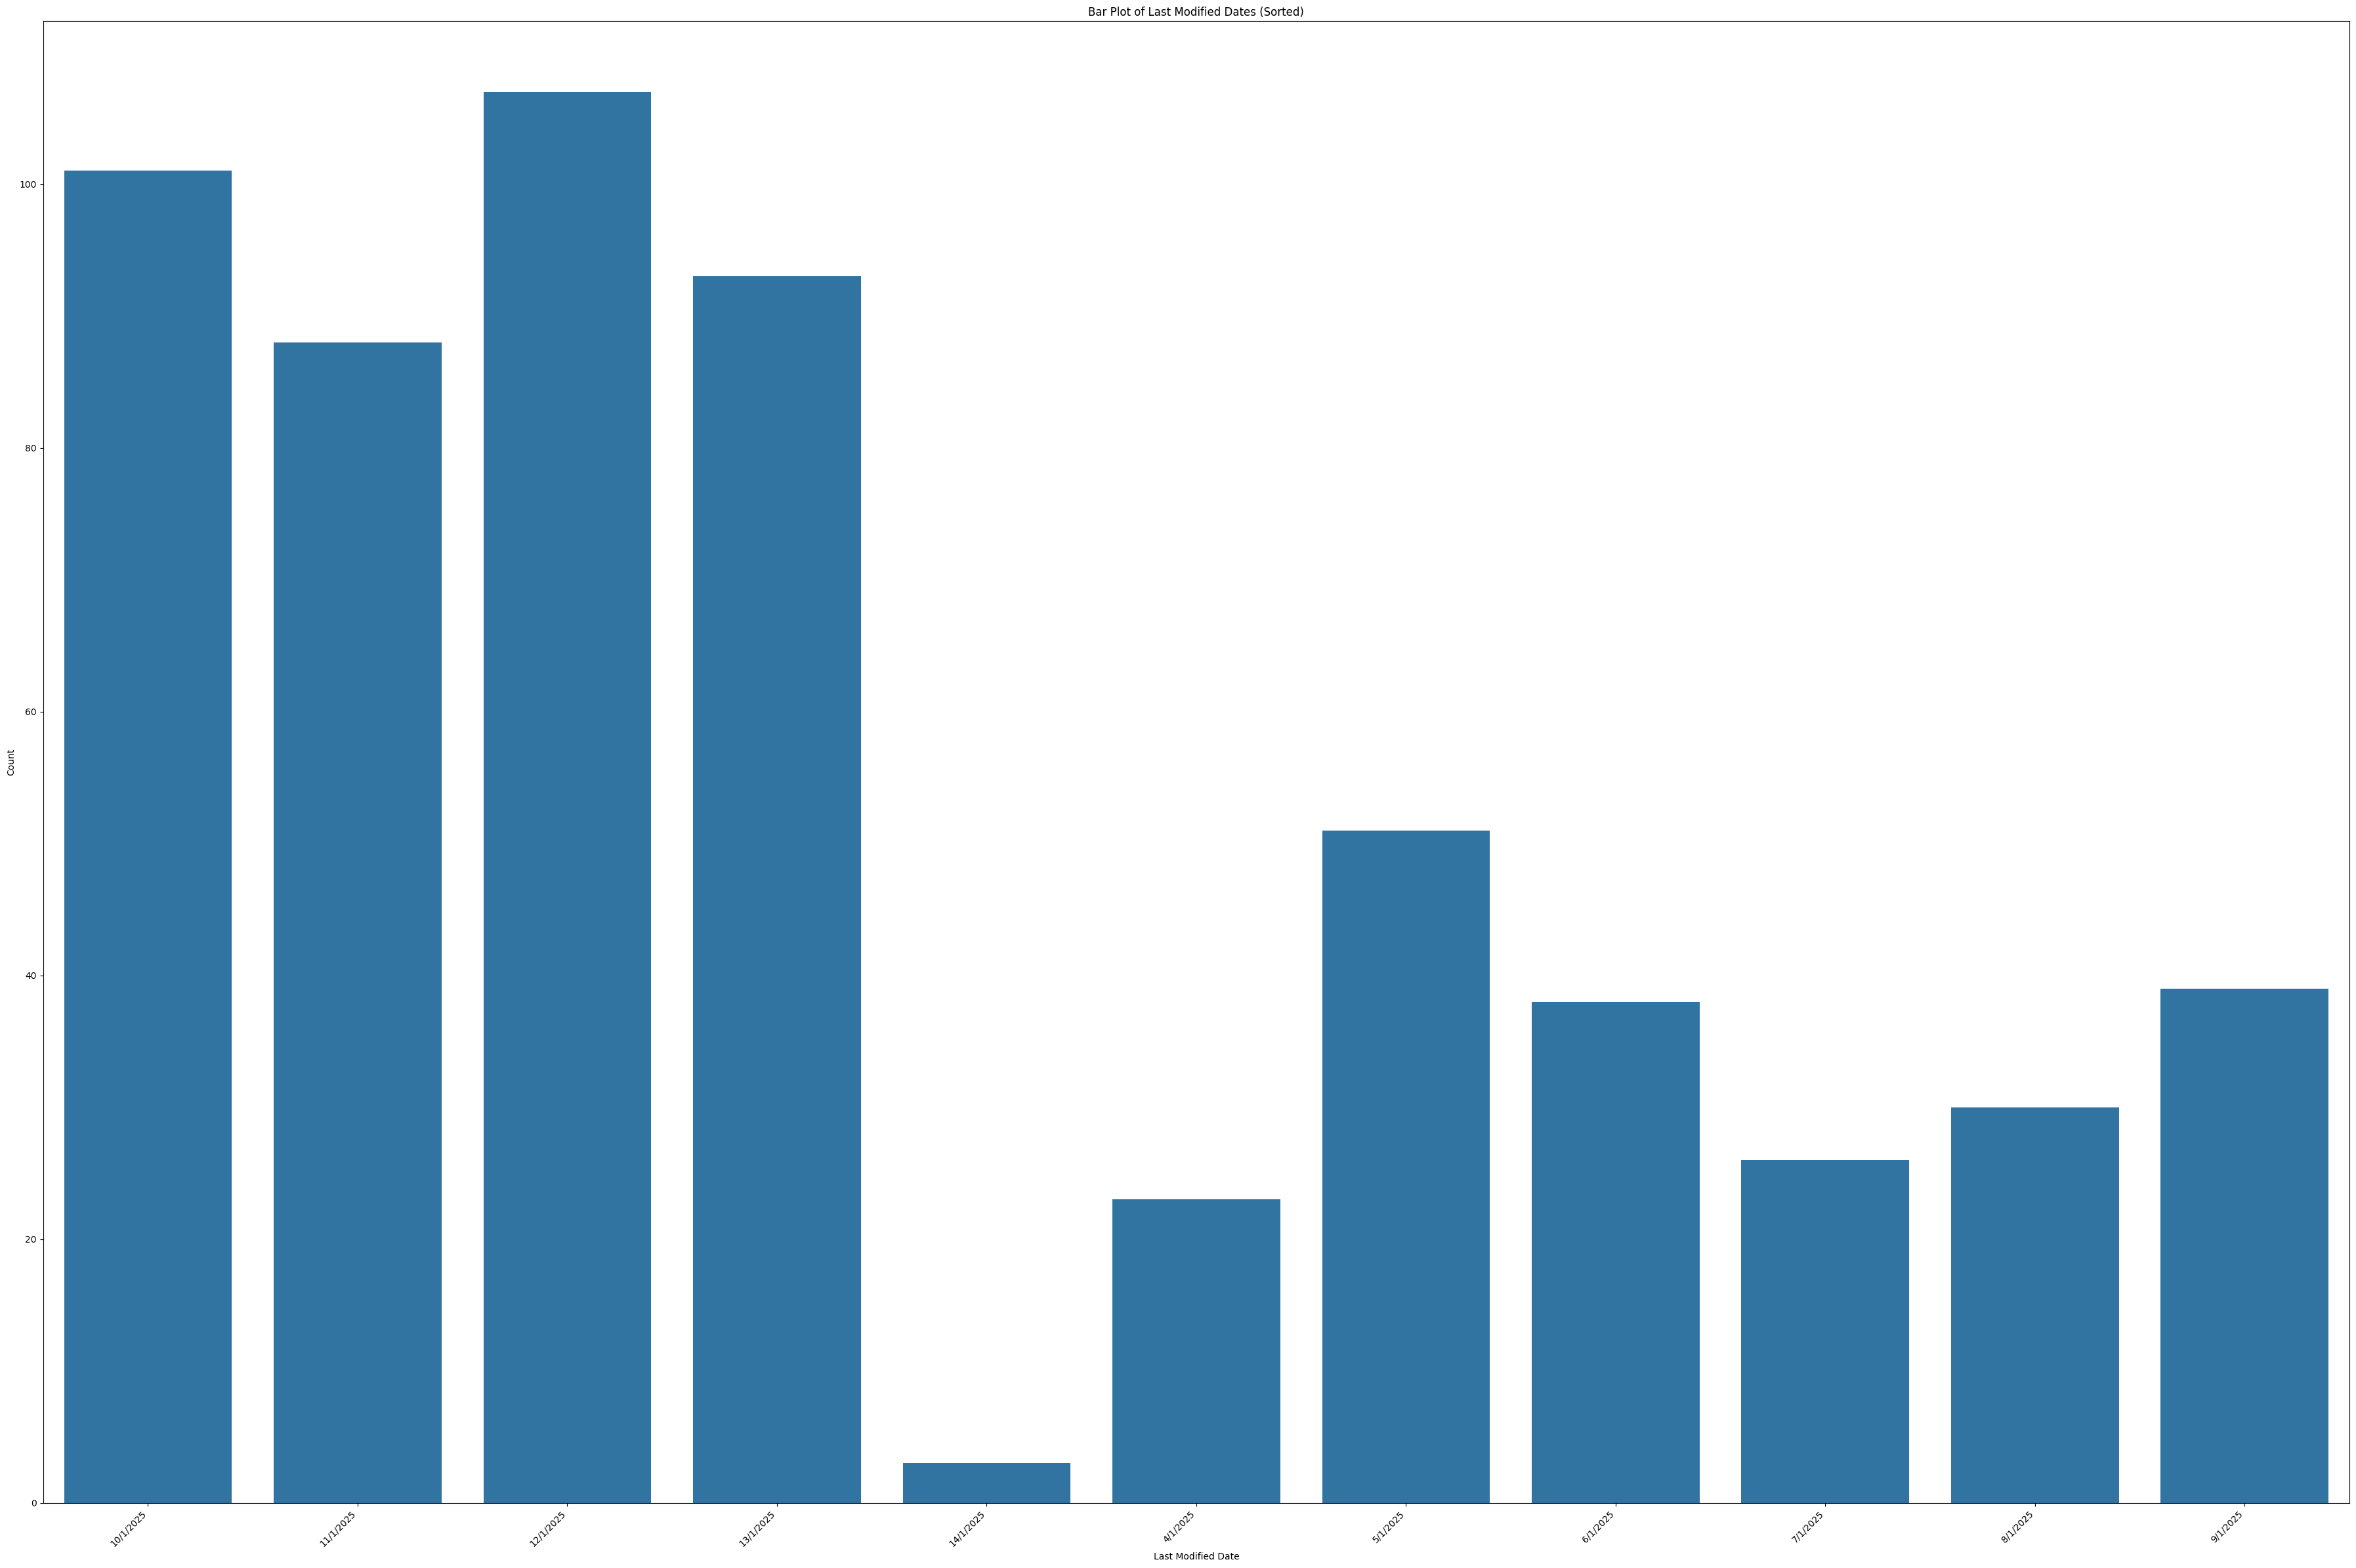

In [234]:
# Increase the figure size for all plots
plt.rcParams['figure.figsize'] = (36, 24)  # Adjust width and height as needed

if 'Last Modified Date' in df.columns:
  # Convert 'Last Modified Date' to datetime objects if they are not already
  if not pd.api.types.is_datetime64_any_dtype(df['Last Modified Date']):
    try:
      df['Last Modified Date'] = pd.to_datetime(df['Last Modified Date'])
    except ValueError:
      print("Could not convert 'Last Modified Date' to datetime objects.")

  # Sort the DataFrame by 'Last Modified Date' in ascending order
  df_sorted = df.sort_values(by='Last Modified Date')

  # Create the countplot using the sorted DataFrame
  sns.countplot(x='Last Modified Date', data=df_sorted)
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
  plt.xlabel('Last Modified Date')
  plt.ylabel('Count')
  plt.title('Bar Plot of Last Modified Dates (Sorted)')
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
  plt.show()

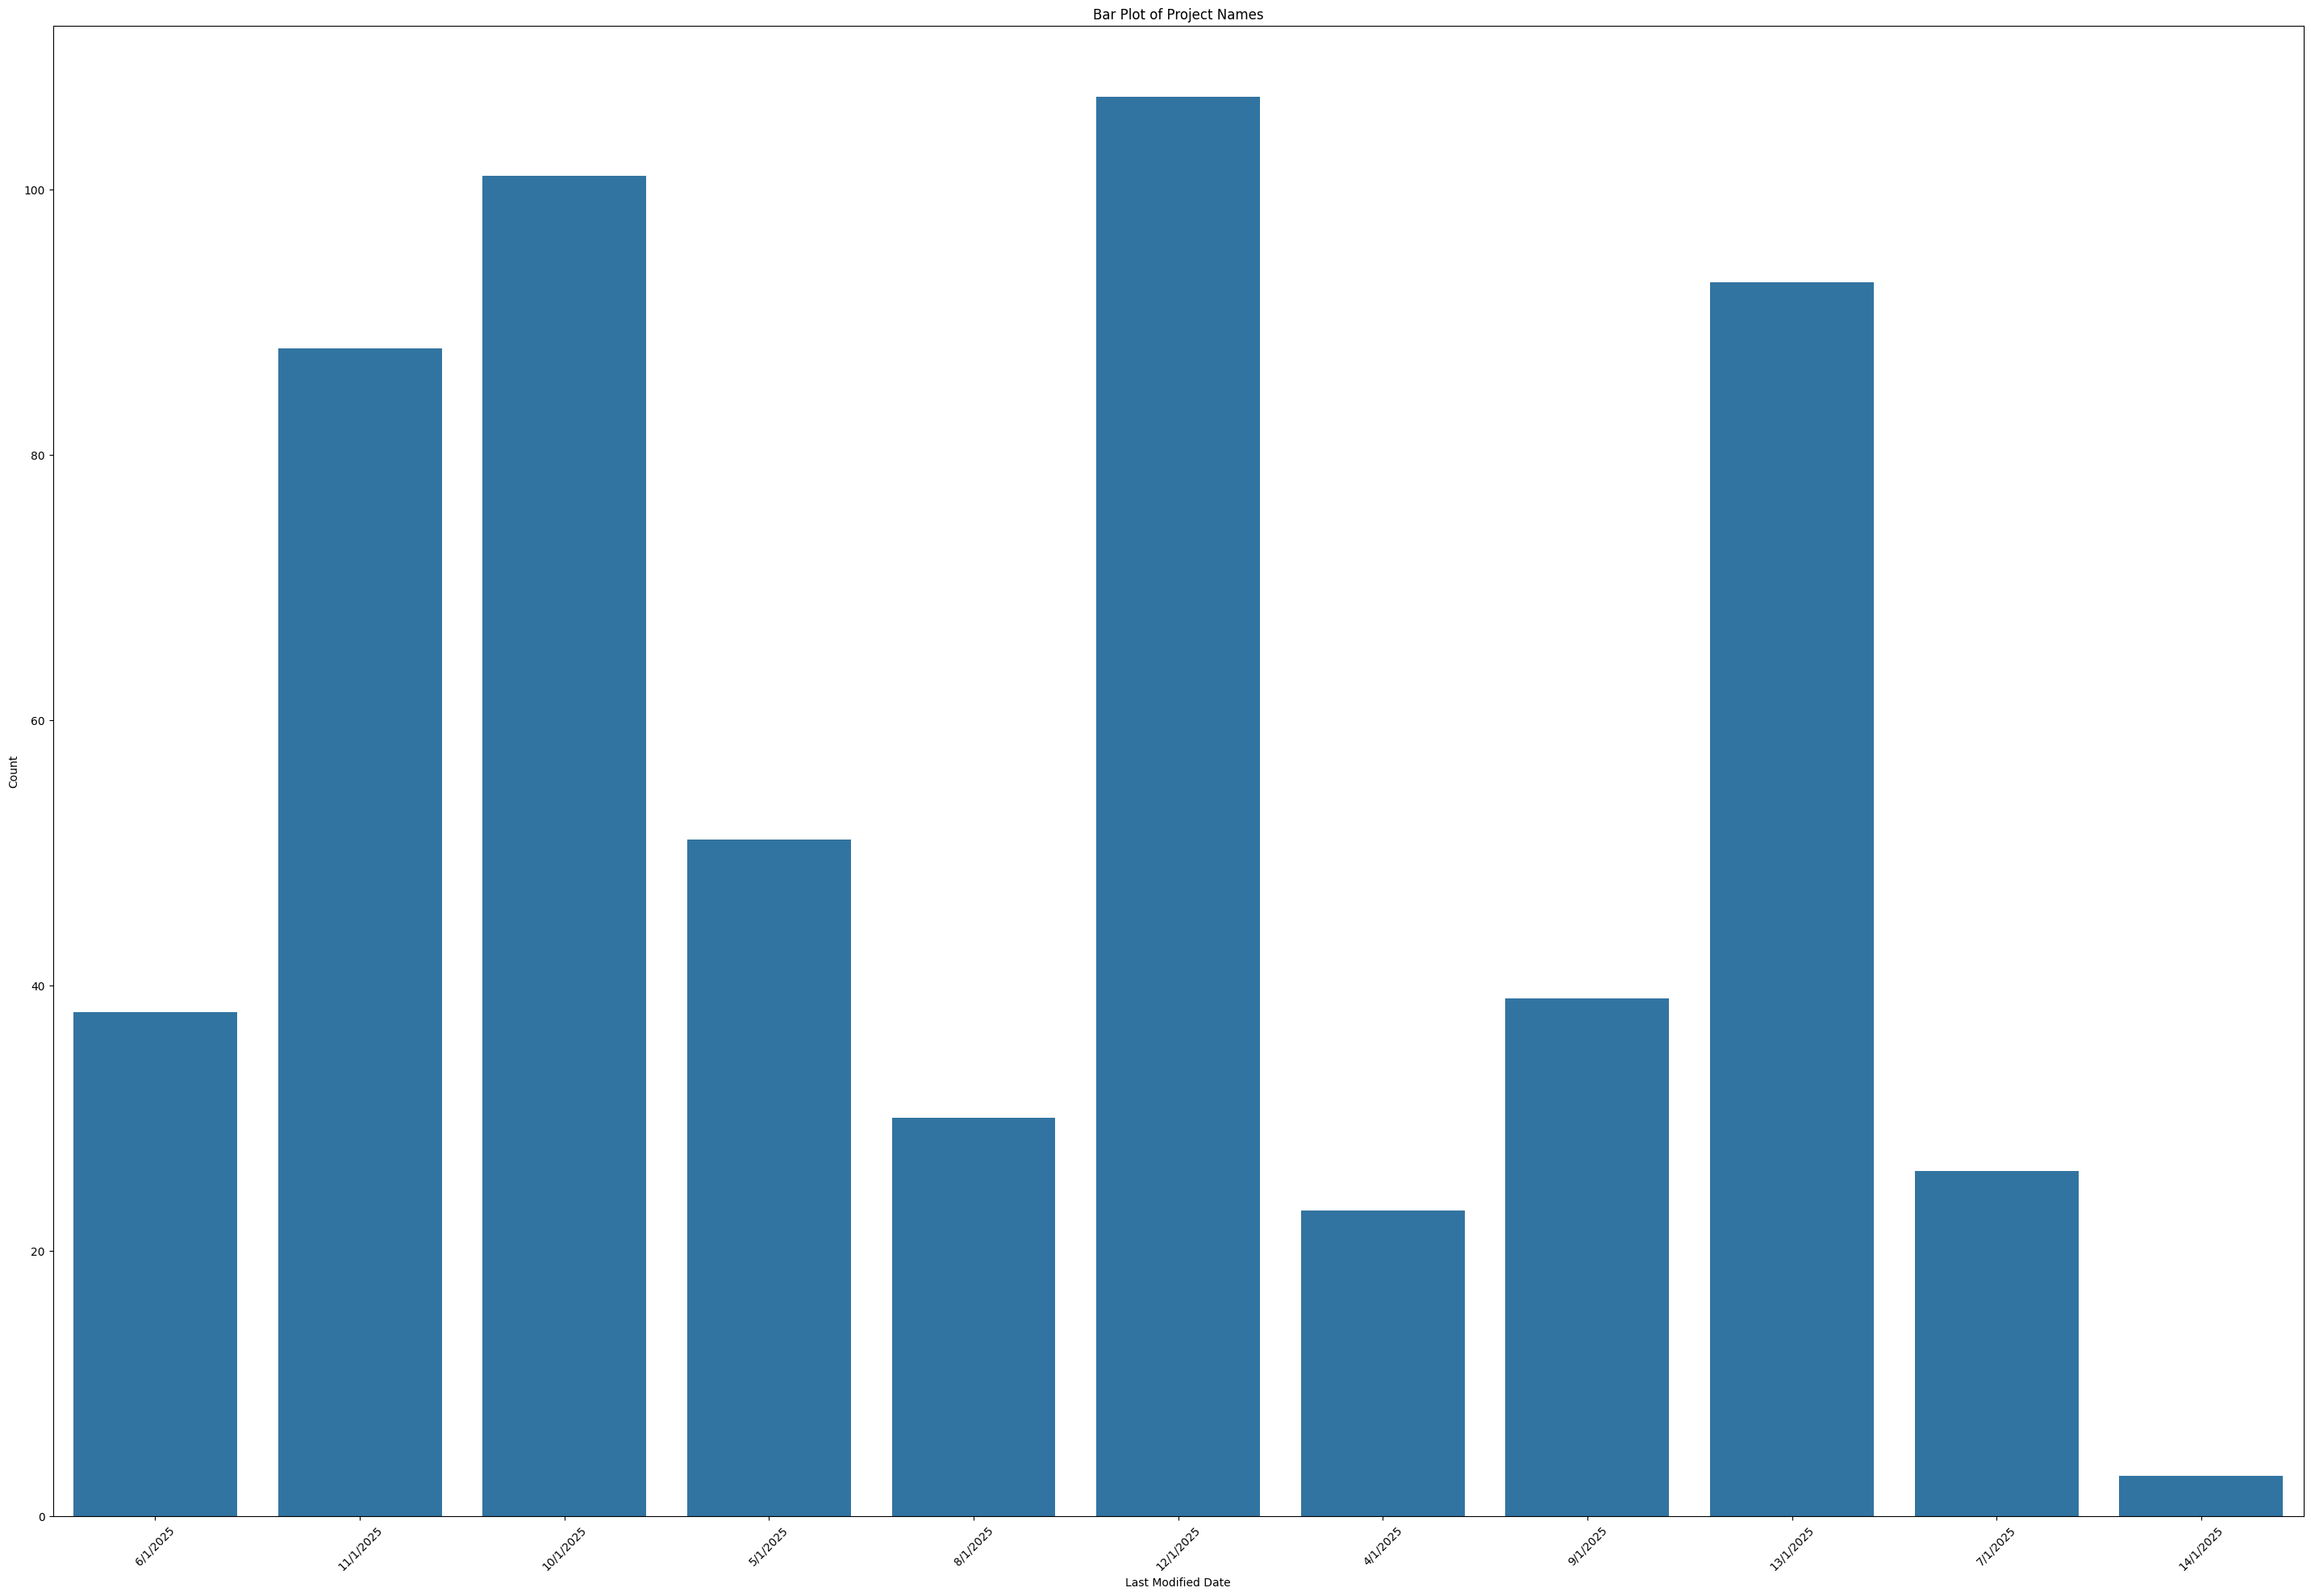

In [235]:
plt.rcParams['figure.figsize'] = (36, 24)
sns.countplot(x='Last Modified Date', data=df)
plt.xticks(rotation=45)
plt.xlabel('Last Modified Date')
plt.ylabel('Count')
plt.title('Bar Plot of Project Names')
plt.show()

In [236]:
df.columns

Index(['Project: Project Name', 'Site Visit Name', 'Created Date',
       'Walkin Date', 'Permanent Zip/Postal Code', 'Age', 'Gender',
       'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
       'Occupation', 'Designation', 'Industry', 'Possession Required',
       'Configuration', 'Budget', 'Desired Carpet Area', 'Cultural Background',
       'Actual Budget', 'Address details', 'Tower/Unit pitched',
       'Visited with Family', 'Task Status', 'Remarks', 'No of revisit',
       'Last Modified Date', 'Number of Activity', 'Lead Source',
       'Organization', 'Account Name'],
      dtype='object')

In [237]:
df['Organization'].value_counts()

Organization
na                         7
Reliance                   4
Accenture                  3
L&T                        3
Housewife                  3
                          ..
Silver group               1
Shankeshwar enterprises    1
ABN AMRO                   1
Metamersive                1
Vayu boats Pvt td          1
Name: count, Length: 298, dtype: int64

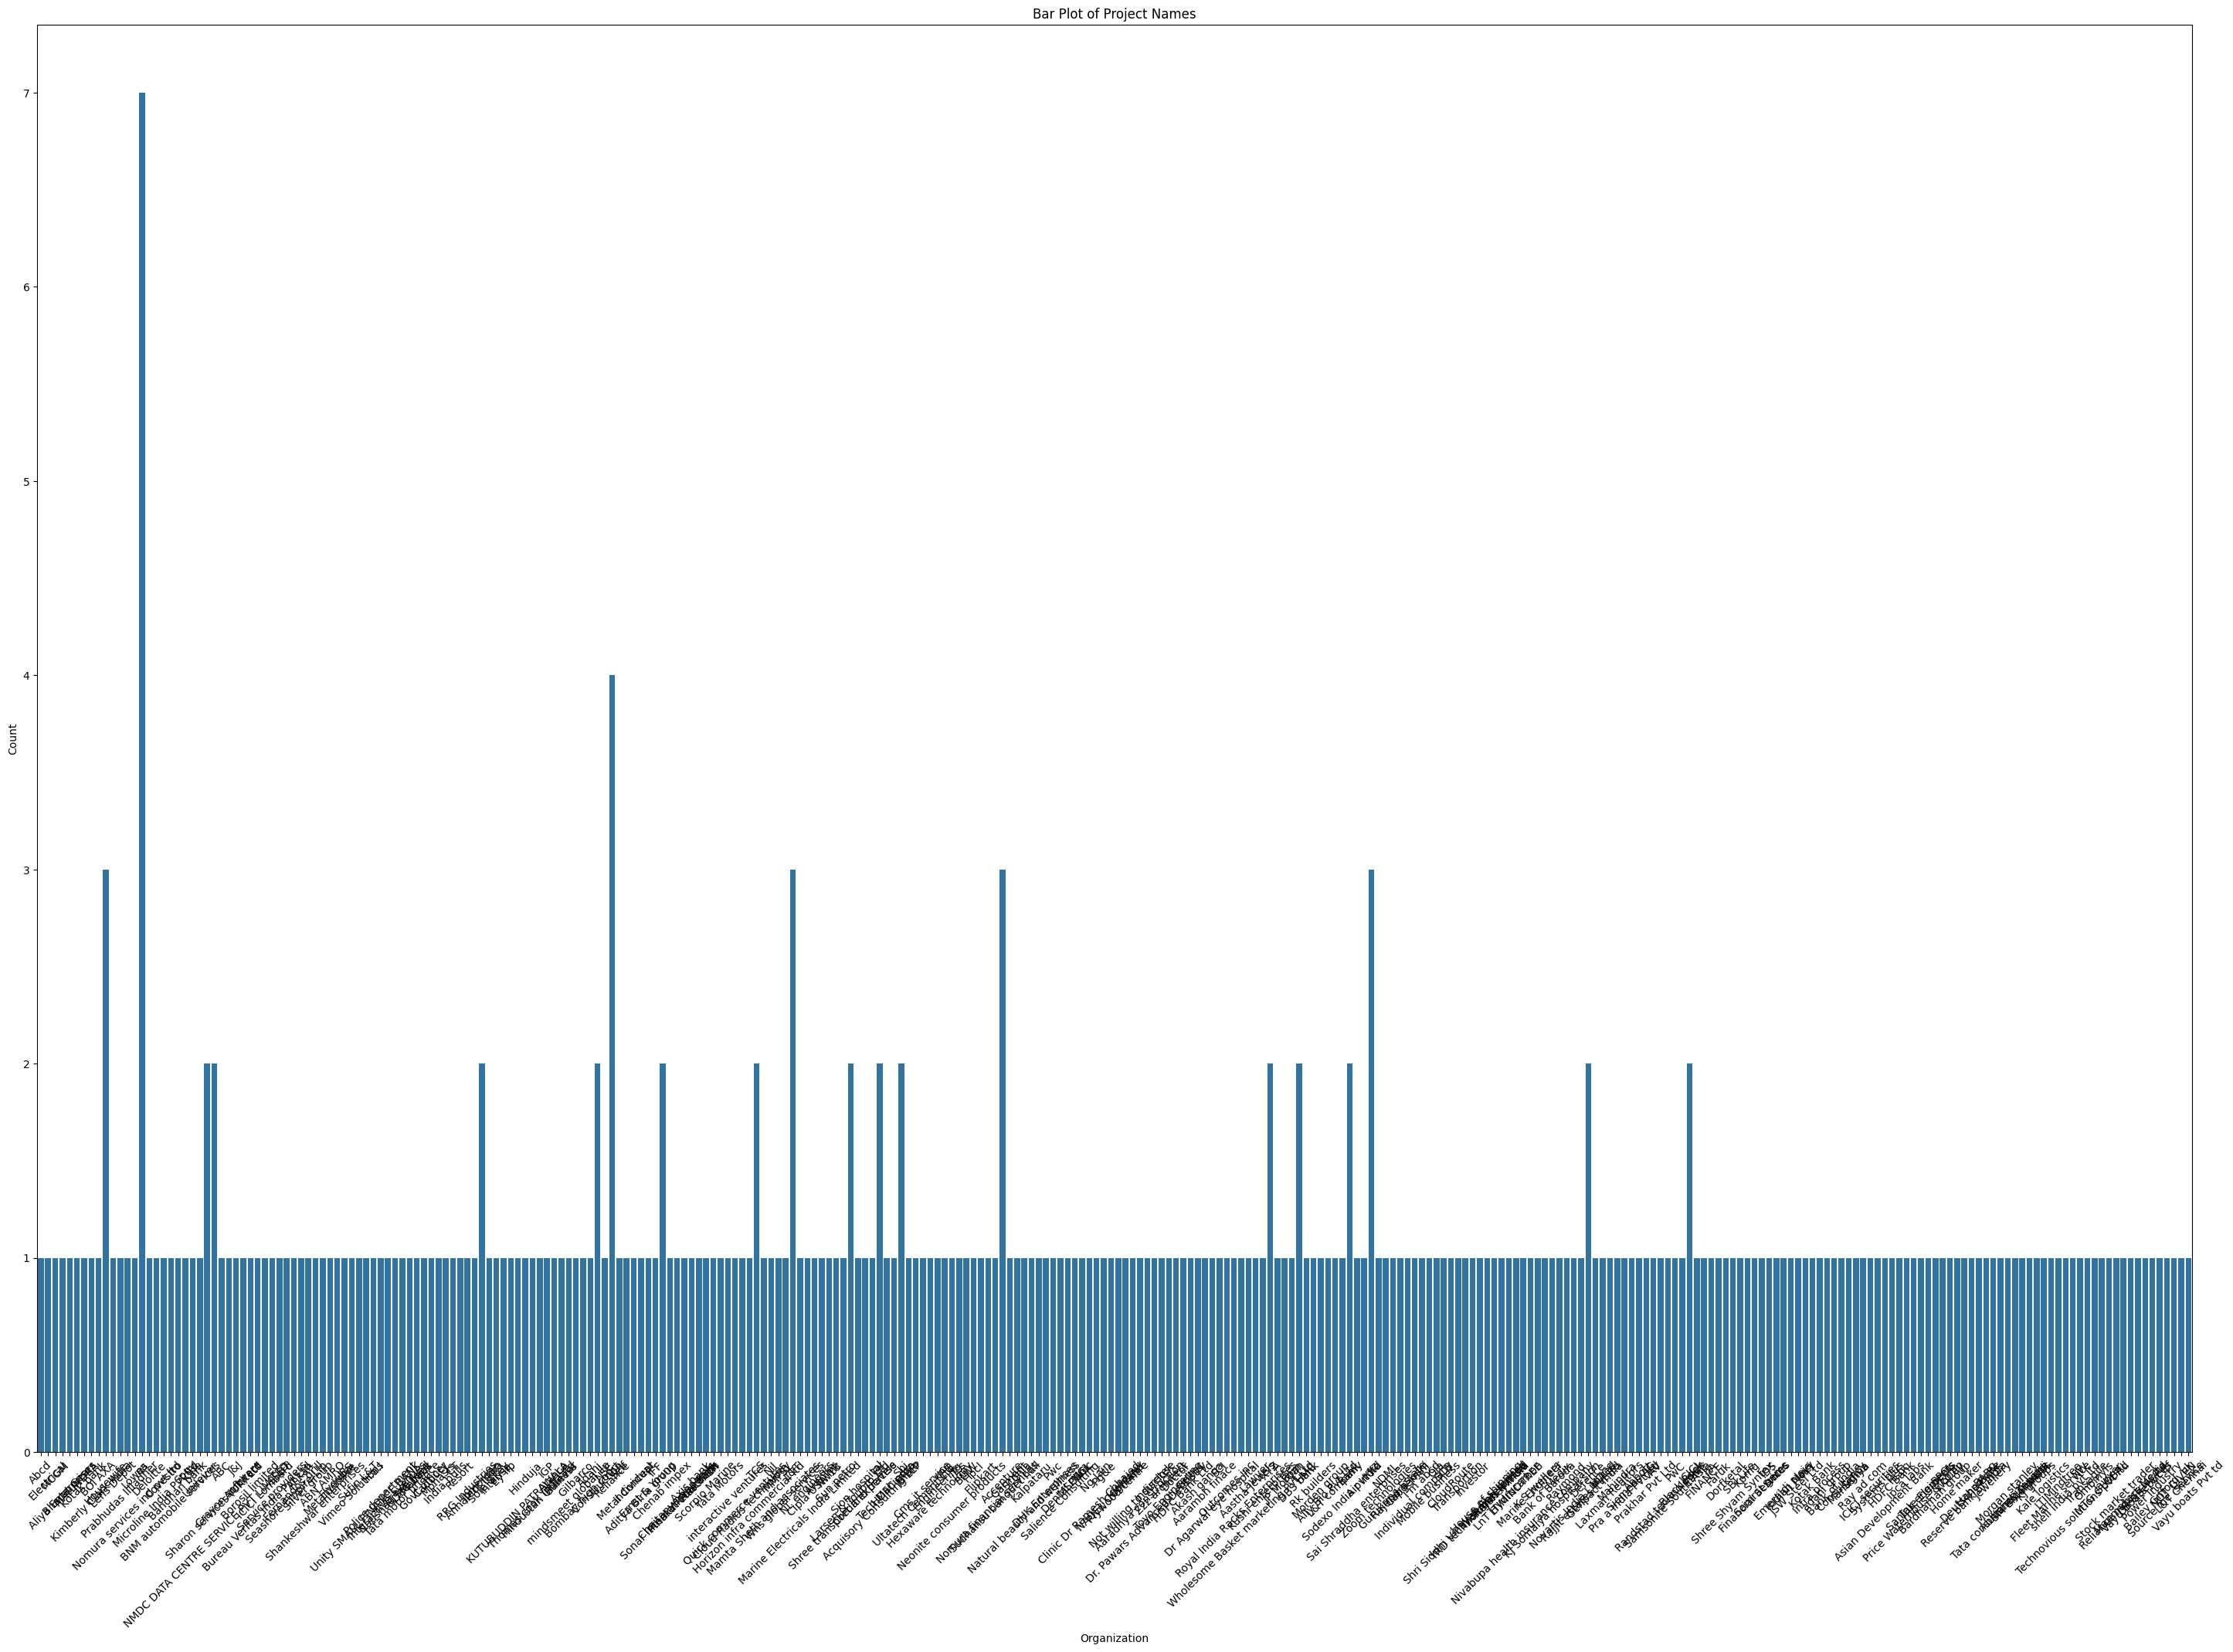

In [238]:
sns.countplot(x='Organization', data=df)
plt.xticks(rotation=45)
plt.xlabel('Organization')
plt.ylabel('Count')
plt.title('Bar Plot of Project Names')
plt.show()

In [239]:
df['Account Name'].value_counts()

Account Name
Sakshi Raina            3
Amit Nambiar            2
Aman Shinde             2
Shilpa Mathias          2
Pooja Pandav            2
                       ..
Santosh Kokate          1
RASAI                   1
Anu John ThomasKutty    1
Ashish Bagade           1
P b choudhary           1
Name: count, Length: 581, dtype: int64

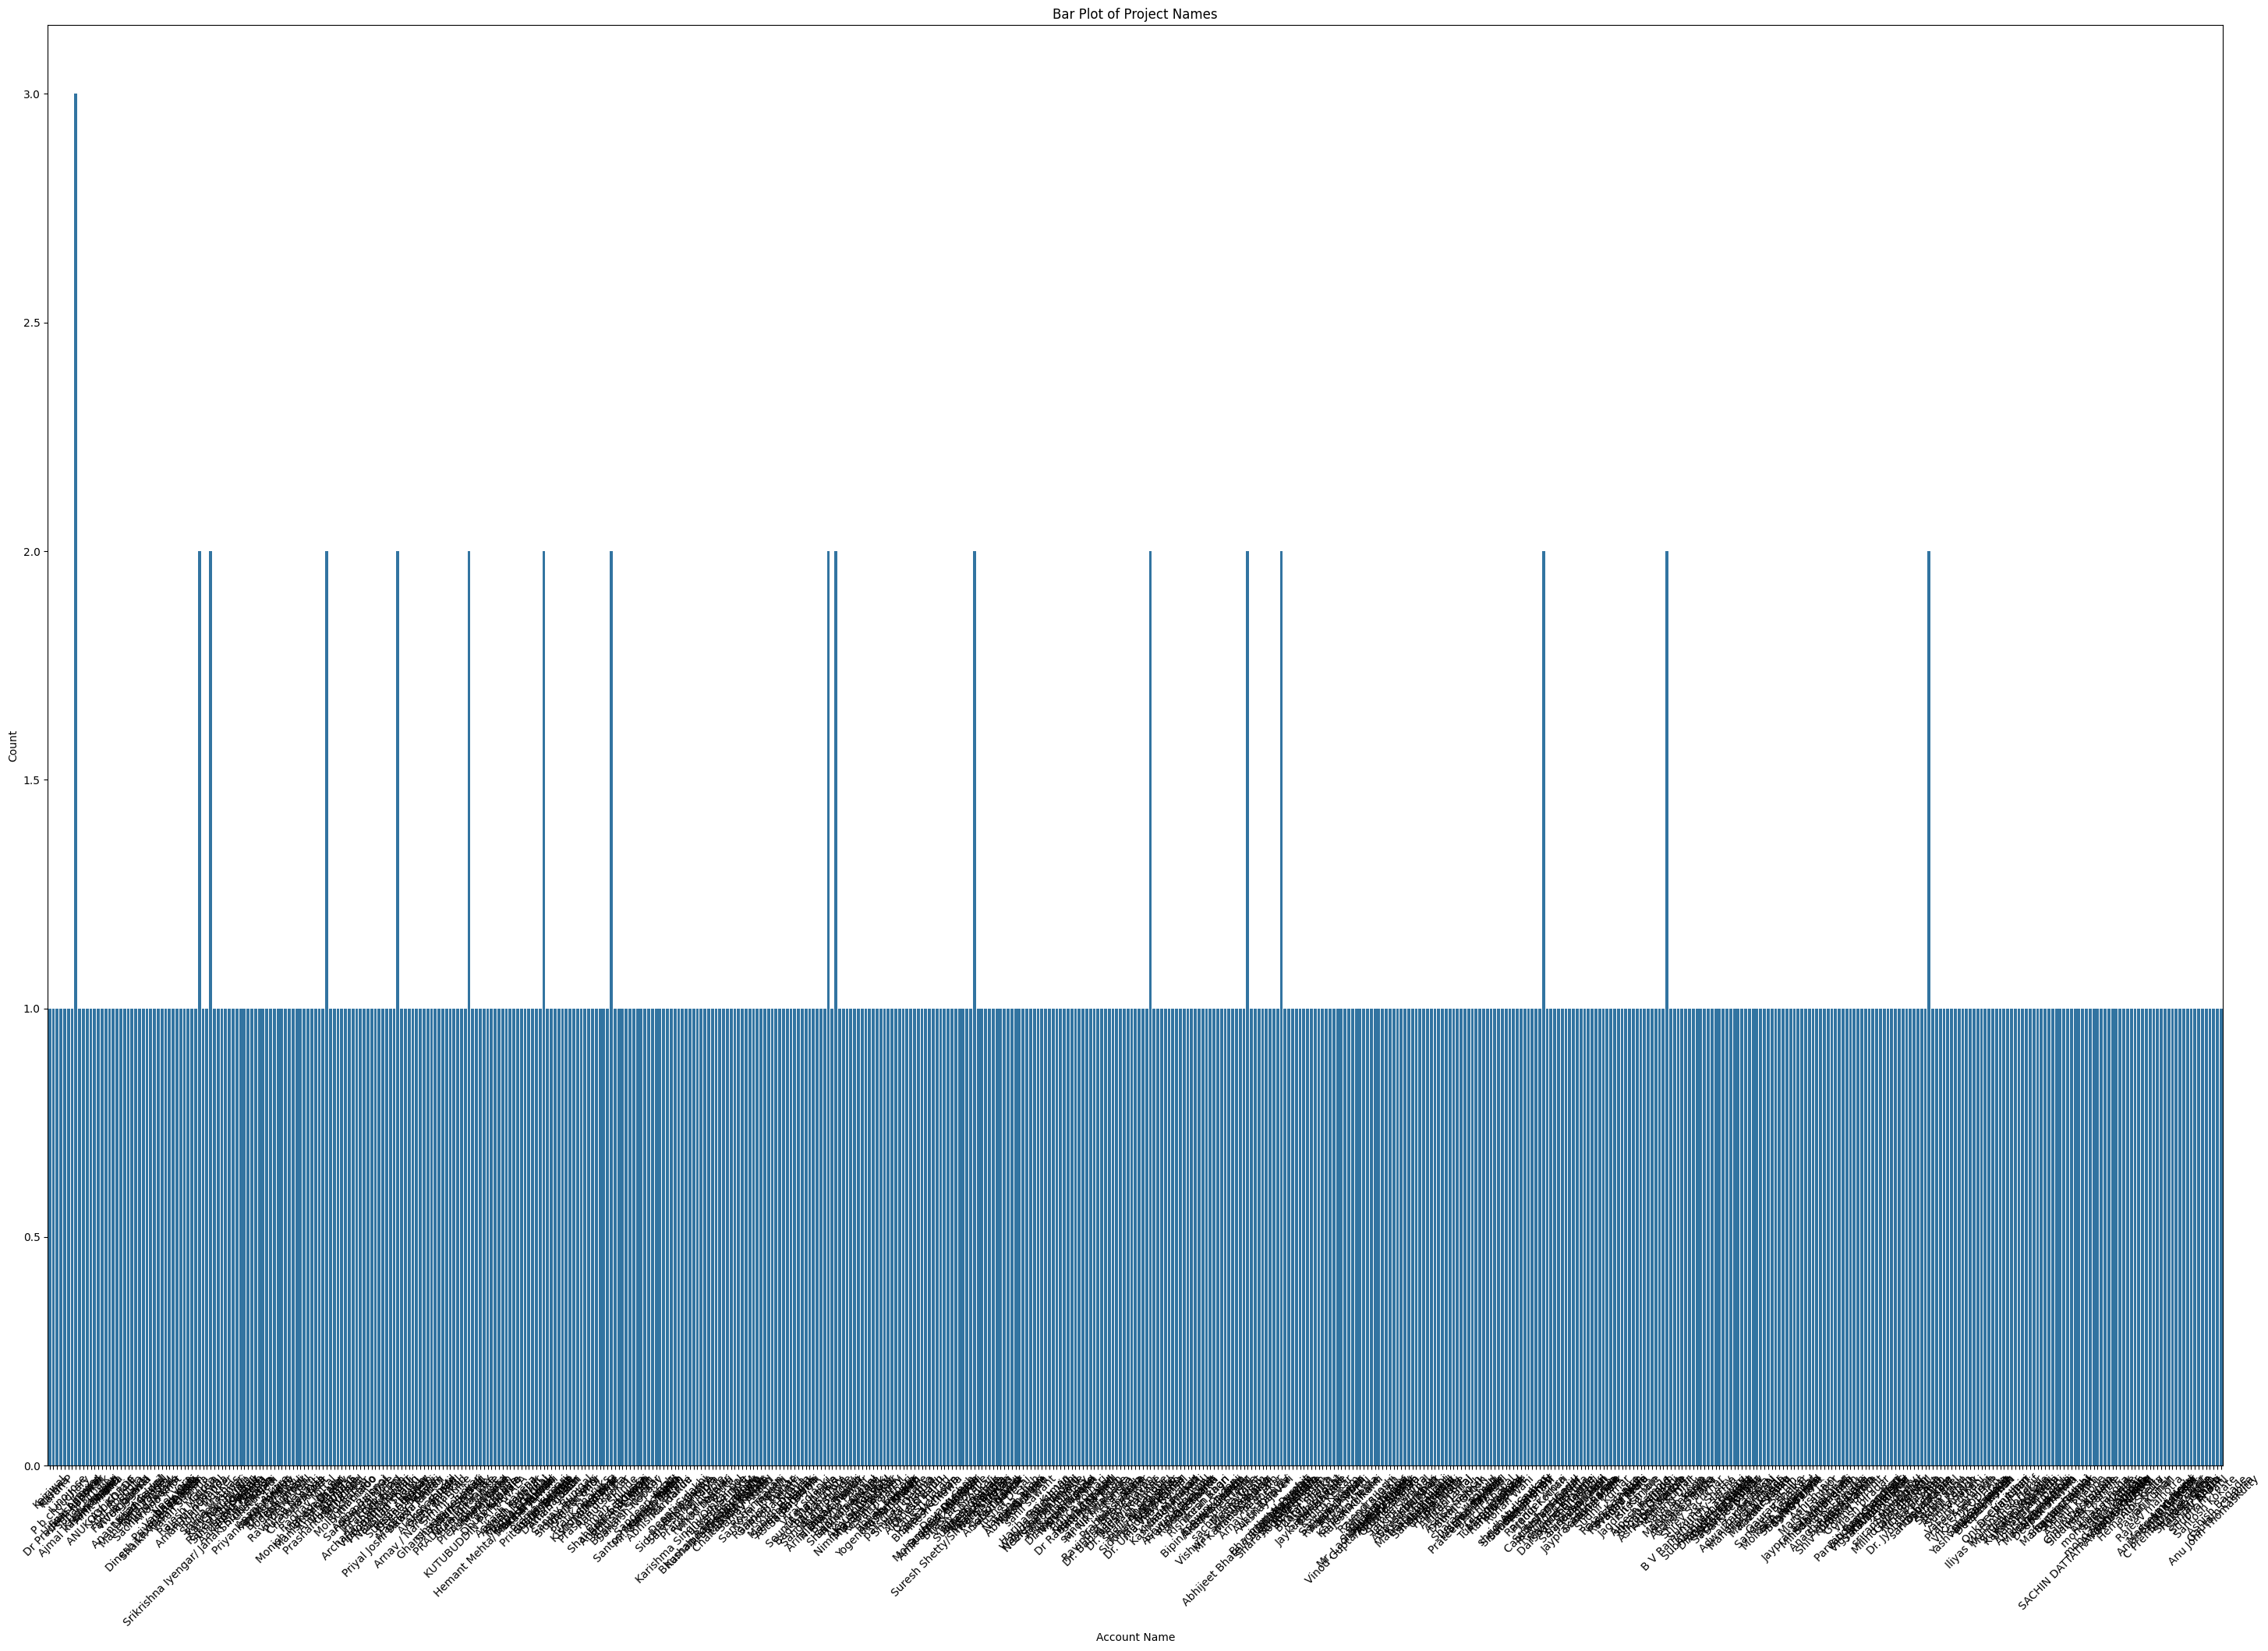

In [240]:
sns.countplot(x='Account Name', data=df)
plt.xticks(rotation=45)
plt.xlabel('Account Name')
plt.ylabel('Count')
plt.title('Bar Plot of Project Names')
plt.show()

In [241]:
df['Lead Source'].value_counts()

Lead Source
Channel Partner      443
Hoarding              60
Direct                36
Website               12
Referral              12
Social Media          12
Emailer                6
Online Campaign        5
SMS                    4
WhatsApp               2
Exhibition             2
Paper Ads.             2
Print Ad               1
Newspaper Leaflet      1
Theatre Ad             1
Name: count, dtype: int64

In [242]:
mapping_dict = {
    'Channel Partner': 'Channel Partner',
    'Social Media': 'Digital',
    'Website': 'Digital',
    'Online Campaign': 'Digital',
    'WhatsApp': 'Digital',
    'SMS': 'Digital',
    'Emailer': 'Digital',
    'Chatbot': 'Digital',
    'Property Portals': 'Digital',
    'Radio': 'Digital',
    'Online%Campaign': 'Digital',
    'Virtual Property Expo': 'Digital',
    'Property Portal': 'Digital',
    'Webinar': 'Digital',
    'Google AdWords': 'Digital',
    'Ozonetel CTI': 'Digital',
    'Social+Media': 'Digital',
    'Prgrammatic': 'Digital',
    'Radio Ad': 'Digital',
    'Hoarding': 'Offline',
    'Print Ad': 'Offline',
    'Paper Ads.': 'Offline',
    'Epinet': 'Offline',
    'Exhibition & event': 'Offline',
    'Direct': 'Offline',
    'Newspaper Leaflet': 'Offline',
    'Others': 'Offline',
    'Cross Project': 'Offline',
    'Indirect': 'Offline',
    'Exhibition': 'Offline',
    'Paper Ads': 'Offline',
    'Digital Screens': 'Offline',
    'Purchased List': 'Offline',
    'Trade Show': 'Offline',
    'Partner': 'Offline',
    'Advertisement': 'Offline',
    'Customer Event': 'Offline',
    'Other': 'Offline',
    'Phone': 'Offline',
    'Referral': 'Referral',
    'Employee Referral': 'Referral'
}

In [243]:
# Update 'Lead Source' using the mapping dictionary
df['Lead Source'] = df['Lead Source'].map(mapping_dict).fillna(df['Lead Source'])

# Optional: Verify the updates with value counts
print(df['Lead Source'].value_counts())

Lead Source
Channel Partner    443
Offline            102
Digital             41
Referral            12
Theatre Ad           1
Name: count, dtype: int64


In [244]:
df.columns

Index(['Project: Project Name', 'Site Visit Name', 'Created Date',
       'Walkin Date', 'Permanent Zip/Postal Code', 'Age', 'Gender',
       'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
       'Occupation', 'Designation', 'Industry', 'Possession Required',
       'Configuration', 'Budget', 'Desired Carpet Area', 'Cultural Background',
       'Actual Budget', 'Address details', 'Tower/Unit pitched',
       'Visited with Family', 'Task Status', 'Remarks', 'No of revisit',
       'Last Modified Date', 'Number of Activity', 'Lead Source',
       'Organization', 'Account Name'],
      dtype='object')

In [245]:
# df['Stage']

In [246]:
# df['Stage'].value_counts()

In [247]:
# # Step 1: Replace 'APP 2 Approved' with 'Booked'
# df['Stage'] = df['Stage'].replace('APP 2 Approved', 'Booked')

# # Step 2: Drop rows where 'Stage' is 'Cancelled'
# df = df[df['Stage'] != 'Cancelled']

# # Step 3: Replace all other values (except 'Booked') with 'In Pipeline'
# df['Stage'] = df['Stage'].where(df['Stage'] == 'Booked', 'In Pipeline')

In [248]:
# df['Stage'].value_counts()

In [249]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify the sentiment based on the compound score
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Convert non-string or NaN values in 'Remarks' to empty strings
df['Remarks'] = df['Remarks'].fillna('').astype(str)

# Apply sentiment analysis to the remarks column
df['Sentiment'] = df['Remarks'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment'].apply(get_sentiment)

# Show the results
print(df[['Remarks', 'Sentiment_Label']].head())


                                             Remarks Sentiment_Label
0  Women visited with his sister, looking for a 2...        Positive
1  Client is looking for 2bhk nova 4th floor b wi...        Positive
2  Client is looking for a 3 BHK for investment. ...        Positive
3  Client took all the info. Looking at 2 BHK. Wi...         Neutral
4  Liked the project\nBut cannot take the decisio...        Positive


[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


In [250]:
df['Permanent Zip/Postal Code'].value_counts()

Permanent Zip/Postal Code
400077     40
400076     26
400601     25
400079     25
000000     20
           ..
421003      1
400697      1
na          1
Delhi       1
0000000     1
Name: count, Length: 143, dtype: int64

In [251]:
invalid_count = df['Permanent Zip/Postal Code'].isnull().sum() + (df['Permanent Zip/Postal Code'] == '000000').sum()
print(f"Total invalid entries (NaN or '000000'): {invalid_count}")

Total invalid entries (NaN or '000000'): 24


In [252]:
# Check for 5-digit pin codes in the 'Permanent Zip/Postal Code' column
five_digit_zip_codes = df[df['Permanent Zip/Postal Code'].astype(str).str.match(r'^\d{5}$')]

# Display the rows with 5-digit pin codes
print(five_digit_zip_codes)

# Optional: Count how many rows have 5-digit pin codes
count_five_digit_zip_codes = five_digit_zip_codes.shape[0]
print(f"Number of rows with 5-digit pin codes: {count_five_digit_zip_codes}")


        Project: Project Name Site Visit Name Created Date Walkin Date  \
9                    Centrona        SV-37499     4/1/2025    4/1/2025   
61   L&T REALTY EVARA HEIGHTS        SV-37574     4/1/2025    4/1/2025   
81                   Centrona        SV-37598     4/1/2025    4/1/2025   
89   L&T REALTY EVARA HEIGHTS        SV-37611     4/1/2025    4/1/2025   
128  L&T REALTY EVARA HEIGHTS        SV-37659     5/1/2025    5/1/2025   
145  L&T REALTY EVARA HEIGHTS        SV-37679     5/1/2025    5/1/2025   
157               THE GATEWAY        SV-37694     5/1/2025    5/1/2025   
160                  Centrona        SV-37697     5/1/2025    5/1/2025   
197  L&T REALTY EVARA HEIGHTS        SV-37747     5/1/2025    5/1/2025   
198  L&T REALTY EVARA HEIGHTS        SV-37748     5/1/2025    5/1/2025   
223  L&T REALTY EVARA HEIGHTS        SV-37777     5/1/2025    5/1/2025   
229                Rejuve 360        SV-37784     5/1/2025    5/1/2025   
254                  Centrona        S

In [253]:
# Check for pin codes that are not exactly 6 digits in the 'Permanent Zip/Postal Code' column
invalid_zip_codes = df[~df['Permanent Zip/Postal Code'].astype(str).str.match(r'^\d{6}$')]

# Display the rows with invalid pin codes (not 6 digits)
print(invalid_zip_codes)

# Optional: Count how many rows have invalid pin codes
count_invalid_zip_codes = invalid_zip_codes.shape[0]
print(f"Number of rows with invalid pin codes (not 6 digits): {count_invalid_zip_codes}")


        Project: Project Name Site Visit Name Created Date Walkin Date  \
9                    Centrona        SV-37499     4/1/2025    4/1/2025   
36                   Centrona        SV-37538     4/1/2025    4/1/2025   
40        Seawoods Residences        SV-37543     4/1/2025    4/1/2025   
61   L&T REALTY EVARA HEIGHTS        SV-37574     4/1/2025    4/1/2025   
81                   Centrona        SV-37598     4/1/2025    4/1/2025   
89   L&T REALTY EVARA HEIGHTS        SV-37611     4/1/2025    4/1/2025   
90                   Centrona        SV-37612     4/1/2025  26/12/2024   
128  L&T REALTY EVARA HEIGHTS        SV-37659     5/1/2025    5/1/2025   
145  L&T REALTY EVARA HEIGHTS        SV-37679     5/1/2025    5/1/2025   
157               THE GATEWAY        SV-37694     5/1/2025    5/1/2025   
160                  Centrona        SV-37697     5/1/2025    5/1/2025   
197  L&T REALTY EVARA HEIGHTS        SV-37747     5/1/2025    5/1/2025   
198  L&T REALTY EVARA HEIGHTS        S

In [254]:
# Define a function to fix the postal codes
def fix_postal_code(code):
    code_str = str(code)  # Convert the code to a string
    if code_str.startswith('400'):
        if len(code_str) == 5:  # If the length is 5, add a '0'
            return code_str[:2] + '0' + code_str[2:]
        elif len(code_str) > 6:  # If the length is more than 6, trim to 6 digits
            return code_str[:6]
    return code_str  # Return the original code if no changes are needed

# Apply the function to the 'Permanent Zip/Postal Code' column
df['Permanent Zip/Postal Code'] = df['Permanent Zip/Postal Code'].apply(fix_postal_code)

# Optional: Display the DataFrame to check the changes
print(df['Permanent Zip/Postal Code'])


0       560023
1       400708
2       400053
3       400076
4       431602
        ...   
594     400709
595     400077
596    0000000
597     400615
598     400053
Name: Permanent Zip/Postal Code, Length: 599, dtype: object


In [255]:
# Check for pin codes that are not exactly 6 digits in the 'Permanent Zip/Postal Code' column
invalid_zip_codes = df[~df['Permanent Zip/Postal Code'].astype(str).str.match(r'^\d{6}$')]

# Display the rows with invalid pin codes (not 6 digits)
print(invalid_zip_codes)

# Optional: Count how many rows have invalid pin codes
count_invalid_zip_codes = invalid_zip_codes.shape[0]
print(f"Number of rows with invalid pin codes (not 6 digits): {count_invalid_zip_codes}")

        Project: Project Name Site Visit Name Created Date Walkin Date  \
9                    Centrona        SV-37499     4/1/2025    4/1/2025   
36                   Centrona        SV-37538     4/1/2025    4/1/2025   
81                   Centrona        SV-37598     4/1/2025    4/1/2025   
90                   Centrona        SV-37612     4/1/2025  26/12/2024   
157               THE GATEWAY        SV-37694     5/1/2025    5/1/2025   
160                  Centrona        SV-37697     5/1/2025    5/1/2025   
198  L&T REALTY EVARA HEIGHTS        SV-37748     5/1/2025    5/1/2025   
233               THE GATEWAY        SV-37791     6/1/2025    6/1/2025   
254                  Centrona        SV-37815     6/1/2025    6/1/2025   
283  L&T REALTY EVARA HEIGHTS        SV-37848     7/1/2025  25/12/2024   
325  L&T REALTY EVARA HEIGHTS        SV-37902     8/1/2025  31/12/2024   
326               THE GATEWAY        SV-37903     9/1/2025    9/1/2025   
332  L&T REALTY EVARA HEIGHTS        S

In [256]:
df['Permanent Zip/Postal Code'].value_counts()

Permanent Zip/Postal Code
400077     40
400076     26
400601     25
400079     25
000000     20
           ..
421003      1
400697      1
na          1
Delhi       1
0000000     1
Name: count, Length: 134, dtype: int64

In [257]:
# Replace invalid postal codes with 400076
df['Permanent Zip/Postal Code'] = df['Permanent Zip/Postal Code'].apply(lambda x: '400076' if (pd.isnull(x) or not isinstance(x, str) or not x.isdigit() or len(x) != 6) else x)

In [258]:
df['Permanent Zip/Postal Code'].value_counts()

Permanent Zip/Postal Code
400076    48
400077    40
400601    25
400079    25
000000    20
          ..
400044     1
400099     1
421003     1
400008     1
400697     1
Name: count, Length: 122, dtype: int64

In [259]:
!pip install geopy

In [260]:
!pip install -U googlemaps

In [261]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [262]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Increase the timeout value to avoid connection issues
geolocator = Nominatim(user_agent="geoapiExercises", timeout=10)  # Set timeout to 10 seconds

# Use RateLimiter to avoid hitting API limits
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Function to get latitude and longitude
def get_lat_long(postal_code):
    try:
        location = geolocator.geocode(postal_code)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error for {postal_code}: {e}")
        return None, None


In [263]:
# Assuming you want to set the 'Site Visit Name' column as the index (replace with your actual column name):
df.set_index('Site Visit Name', inplace=True)

In [264]:
df.head()

Project: Project Name Created Date Walkin Date  \
Site Visit Name                                                  
SV-37487               Elixir Reserve     4/1/2025    4/1/2025   
SV-37488                     Centrona     4/1/2025    4/1/2025   
SV-37489                  THE GATEWAY     4/1/2025    4/1/2025   
SV-37490                     Centrona     4/1/2025    4/1/2025   
SV-37493                     Centrona     4/1/2025    4/1/2025   

                Permanent Zip/Postal Code  Age  Gender Nature of Purchase  \
Site Visit Name                                                             
SV-37487                           560023   50  Female           Self-use   
SV-37488                           400708   41    Male           Self-use   
SV-37489                           400053   36    Male         Investment   
SV-37490                           400076   58    Male           Self-use   
SV-37493                           431602   38    Male           Self-use   

                Current Residential Type Home Loan Status  \
Site Visit Name                                             
SV-37487                           Owned   To be approved   
SV-37488                           Owned   To be approved   
SV-37489                          Rented     Self-Funding   
SV-37490                           Owned   To be approved   
SV-37493                           Owned   To be approved   

                                   Occupation  ... Task Status  \
Site Visit Name                                ...               
SV-37487                  Employed (Salaried)  ...        Cold   
SV-37488                  Employed (Salaried)  ...        Keen   
SV-37489         Business Owner/Self employed  ...        Cold   
SV-37490         Business Owner/Self employed  ...        Warm   
SV-37493                  Employed (Salaried)  ...        Lost   

                                                           Remarks  \
Site Visit Name                                                      
SV-37487         Women visited with his sister, looking for a 2...   
SV-37488         Client is looking for 2bhk nova 4th floor b wi...   
SV-37489         Client is looking for a 3 BHK for investment. ...   
SV-37490         Client took all the info. Looking at 2 BHK. Wi...   
SV-37493         Liked the project\nBut cannot take the decisio...   

                 No of revisit Last Modified Date  Number of Activity  \
Site Visit Name                                                         
SV-37487                     0           6/1/2025                   5   
SV-37488                     0          11/1/2025                   8   
SV-37489                     0           6/1/2025                   2   
SV-37490                     0          10/1/2025                   3   
SV-37493                     0           5/1/2025                   1   

                     Lead Source Organization         Account Name Sentiment  \
Site Visit Name                                                                
SV-37487         Channel Partner          NaN             Kejriwal    0.1531   
SV-37488         Channel Partner          NaN              krishna    0.5574   
SV-37489                 Digital         Abcd              Karan P    0.4215   
SV-37490         Channel Partner   Electrical        P b choudhary    0.0000   
SV-37493         Channel Partner         MCGM  Dr Pradeep kapsiker    0.2263   

                Sentiment_Label  
Site Visit Name                  
SV-37487               Positive  
SV-37488               Positive  
SV-37489               Positive  
SV-37490                Neutral  
SV-37493               Positive  

[5 rows x 31 columns]

In [265]:
df.drop(columns=['Created Date','Occupation','Industry','Cultural Background','Designation','Budget','Address details','Tower/Unit pitched','Remarks','Task Status','Last Modified Date','Organization', 'Account Name'], inplace=True)

In [266]:
df.head()

Project: Project Name Walkin Date Permanent Zip/Postal Code  \
Site Visit Name                                                               
SV-37487               Elixir Reserve    4/1/2025                    560023   
SV-37488                     Centrona    4/1/2025                    400708   
SV-37489                  THE GATEWAY    4/1/2025                    400053   
SV-37490                     Centrona    4/1/2025                    400076   
SV-37493                     Centrona    4/1/2025                    431602   

                 Age  Gender Nature of Purchase Current Residential Type  \
Site Visit Name                                                            
SV-37487          50  Female           Self-use                    Owned   
SV-37488          41    Male           Self-use                    Owned   
SV-37489          36    Male         Investment                   Rented   
SV-37490          58    Male           Self-use                    Owned   
SV-37493          38    Male           Self-use                    Owned   

                Home Loan Status  Possession Required Configuration  \
Site Visit Name                                                       
SV-37487          To be approved                   24         3 BHK   
SV-37488          To be approved                   12         2 BHK   
SV-37489            Self-Funding                   36         3 BHK   
SV-37490          To be approved                   12         2 BHK   
SV-37493          To be approved                   12         1 BHK   

                 Desired Carpet Area  Actual Budget Visited with Family  \
Site Visit Name                                                           
SV-37487                        1050           4.00                  No   
SV-37488                         550           1.49                 Yes   
SV-37489                        1250           5.03                  No   
SV-37490                         500           1.50                  No   
SV-37493                         500           0.60                 Yes   

                 No of revisit  Number of Activity      Lead Source  \
Site Visit Name                                                       
SV-37487                     0                   5  Channel Partner   
SV-37488                     0                   8  Channel Partner   
SV-37489                     0                   2          Digital   
SV-37490                     0                   3  Channel Partner   
SV-37493                     0                   1  Channel Partner   

                 Sentiment Sentiment_Label  
Site Visit Name                             
SV-37487            0.1531        Positive  
SV-37488            0.5574        Positive  
SV-37489            0.4215        Positive  
SV-37490            0.0000         Neutral  
SV-37493            0.2263        Positive

In [267]:
vishal = df.copy()

In [268]:
df.transpose()

Site Visit Name                   SV-37487         SV-37488      SV-37489  \
Project: Project Name       Elixir Reserve         Centrona   THE GATEWAY   
Walkin Date                       4/1/2025         4/1/2025      4/1/2025   
Permanent Zip/Postal Code           560023           400708        400053   
Age                                     50               41            36   
Gender                              Female             Male          Male   
Nature of Purchase                Self-use         Self-use    Investment   
Current Residential Type             Owned            Owned        Rented   
Home Loan Status            To be approved   To be approved  Self-Funding   
Possession Required                     24               12            36   
Configuration                        3 BHK            2 BHK         3 BHK   
Desired Carpet Area                   1050              550          1250   
Actual Budget                          4.0             1.49          5.03   
Visited with Family                     No              Yes            No   
No of revisit                            0                0             0   
Number of Activity                       5                8             2   
Lead Source                Channel Partner  Channel Partner       Digital   
Sentiment                           0.1531           0.5574        0.4215   
Sentiment_Label                   Positive         Positive      Positive   

Site Visit Name                   SV-37490         SV-37493        SV-37494  \
Project: Project Name             Centrona         Centrona  Elixir Reserve   
Walkin Date                       4/1/2025         4/1/2025        4/1/2025   
Permanent Zip/Postal Code           400076           431602          400076   
Age                                     58               38              43   
Gender                                Male             Male            Male   
Nature of Purchase                Self-use         Self-use        Self-use   
Current Residential Type             Owned            Owned           Owned   
Home Loan Status            To be approved   To be approved  To be approved   
Possession Required                     12               12              12   
Configuration                        2 BHK            1 BHK           2 BHK   
Desired Carpet Area                    500              500             900   
Actual Budget                          1.5              0.6             4.0   
Visited with Family                     No              Yes              No   
No of revisit                            0                0               0   
Number of Activity                       3                1               3   
Lead Source                Channel Partner  Channel Partner         Offline   
Sentiment                              0.0           0.2263          0.2023   
Sentiment_Label                    Neutral         Positive        Positive   

Site Visit Name                   SV-37495                  SV-37496  \
Project: Project Name             Centrona  L&T REALTY EVARA HEIGHTS   
Walkin Date                       4/1/2025                  4/1/2025   
Permanent Zip/Postal Code           400070                    530068   
Age                                     40                        39   
Gender                                Male                    Female   
Nature of Purchase                Self-use                  Self-use   
Current Residential Type            Rented                     Owned   
Home Loan Status            To be approved              Self-Funding   
Possession Required                     24                        36   
Configuration                        1 BHK                     2 BHK   
Desired Carpet Area                    500                       750   
Actual Budget                         1.25                      2.03   
Visited with Family                     No                        No   
No of revisit             

In [269]:
# Function to process the configuration values
def process_jodi_value(value):
    # Extract the numbers inside parentheses
    match = re.search(r'Jodi\((\d+)\+(\d+)\)', value)

    if match:
        n1 = int(match.group(1))  # First number
        n2 = int(match.group(2))  # Second number
        total = n1 + n2           # Calculate the sum
        return f'{total} BHK'     # Return in "sum BHK" format
    return value  # In case the pattern is not matched, return the original value

# Apply the function to the 'configuration' column
df['Configuration'] = df['Configuration'].apply(process_jodi_value)

df.transpose().sample(10)# Function to process the configuration values

Site Visit Name                   SV-37487         SV-37488      SV-37489  \
Age                                     50               41            36   
Permanent Zip/Postal Code           560023           400708        400053   
Current Residential Type             Owned            Owned        Rented   
Number of Activity                       5                8             2   
Possession Required                     24               12            36   
Desired Carpet Area                   1050              550          1250   
Home Loan Status            To be approved   To be approved  Self-Funding   
Project: Project Name       Elixir Reserve         Centrona   THE GATEWAY   
Lead Source                Channel Partner  Channel Partner       Digital   
Configuration                        3 BHK            2 BHK         3 BHK   

Site Visit Name                   SV-37490         SV-37493        SV-37494  \
Age                                     58               38              43   
Permanent Zip/Postal Code           400076           431602          400076   
Current Residential Type             Owned            Owned           Owned   
Number of Activity                       3                1               3   
Possession Required                     12               12              12   
Desired Carpet Area                    500              500             900   
Home Loan Status            To be approved   To be approved  To be approved   
Project: Project Name             Centrona         Centrona  Elixir Reserve   
Lead Source                Channel Partner  Channel Partner         Offline   
Configuration                        2 BHK            1 BHK           2 BHK   

Site Visit Name                   SV-37495                  SV-37496  \
Age                                     40                        39   
Permanent Zip/Postal Code           400070                    530068   
Current Residential Type            Rented                     Owned   
Number of Activity                       4                        10   
Possession Required                     24                        36   
Desired Carpet Area                    500                       750   
Home Loan Status            To be approved              Self-Funding   
Project: Project Name             Centrona  L&T REALTY EVARA HEIGHTS   
Lead Source                Channel Partner           Channel Partner   
Configuration                        1 BHK                     2 BHK   

Site Visit Name                   SV-37497         SV-37499  ...  \
Age                                     47               32  ...   
Permanent Zip/Postal Code           400016           400076  ...   
Current Residential Type             Owned            Owned  ...   
Number of Activity                       2                3  ...   
Possession Required                     36               12  ...   
Desired Carpet Area                    750              500  ...   
Home Loan Status              Self-Funding   To be approved  ...   
Project: Project Name          Island Cove         Centrona  ...   
Lead Source                Channel Partner  Channel Partner  ...   
Configuration                        2 BHK            2 BHK  ...   

Site Visit Name                   SV-38312        SV-38315         SV-38317  \
Age                                     44              43               40   
Permanent Zip/Postal Code           411030          411030           400076   
Current Residential Type             Owned           Owned            Owned   
Number of Activity                       2               2                2   
Possession Required                     36              24               72   
Desired Carpet Area                    800            1400             1250   
Home Loan Status              Self-Funding  To be approved   To be approved   
Project: Project Name          Island Cove  Elixir Reserve      THE GATEWAY   
Lead Source                Ch

In [270]:
df['Configuration'] = df['Configuration'].astype(str)
df['Configuration'] = df['Configuration'].str.replace(r'\s*BHK', '', regex=True).astype('float64')

In [271]:
df['Configuration'].value_counts()

Configuration
2.0    238
3.0    180
1.0     99
4.0     46
2.5     27
4.5      7
5.0      2
Name: count, dtype: int64

In [272]:
df.transpose()

Site Visit Name                   SV-37487         SV-37488      SV-37489  \
Project: Project Name       Elixir Reserve         Centrona   THE GATEWAY   
Walkin Date                       4/1/2025         4/1/2025      4/1/2025   
Permanent Zip/Postal Code           560023           400708        400053   
Age                                     50               41            36   
Gender                              Female             Male          Male   
Nature of Purchase                Self-use         Self-use    Investment   
Current Residential Type             Owned            Owned        Rented   
Home Loan Status            To be approved   To be approved  Self-Funding   
Possession Required                     24               12            36   
Configuration                          3.0              2.0           3.0   
Desired Carpet Area                   1050              550          1250   
Actual Budget                          4.0             1.49          5.03   
Visited with Family                     No              Yes            No   
No of revisit                            0                0             0   
Number of Activity                       5                8             2   
Lead Source                Channel Partner  Channel Partner       Digital   
Sentiment                           0.1531           0.5574        0.4215   
Sentiment_Label                   Positive         Positive      Positive   

Site Visit Name                   SV-37490         SV-37493        SV-37494  \
Project: Project Name             Centrona         Centrona  Elixir Reserve   
Walkin Date                       4/1/2025         4/1/2025        4/1/2025   
Permanent Zip/Postal Code           400076           431602          400076   
Age                                     58               38              43   
Gender                                Male             Male            Male   
Nature of Purchase                Self-use         Self-use        Self-use   
Current Residential Type             Owned            Owned           Owned   
Home Loan Status            To be approved   To be approved  To be approved   
Possession Required                     12               12              12   
Configuration                          2.0              1.0             2.0   
Desired Carpet Area                    500              500             900   
Actual Budget                          1.5              0.6             4.0   
Visited with Family                     No              Yes              No   
No of revisit                            0                0               0   
Number of Activity                       3                1               3   
Lead Source                Channel Partner  Channel Partner         Offline   
Sentiment                              0.0           0.2263          0.2023   
Sentiment_Label                    Neutral         Positive        Positive   

Site Visit Name                   SV-37495                  SV-37496  \
Project: Project Name             Centrona  L&T REALTY EVARA HEIGHTS   
Walkin Date                       4/1/2025                  4/1/2025   
Permanent Zip/Postal Code           400070                    530068   
Age                                     40                        39   
Gender                                Male                    Female   
Nature of Purchase                Self-use                  Self-use   
Current Residential Type            Rented                     Owned   
Home Loan Status            To be approved              Self-Funding   
Possession Required                     24                        36   
Configuration                          1.0                       2.0   
Desired Carpet Area                    500                       750   
Actual Budget                         1.25                      2.03   
Visited with Family                     No                        No   
No of revisit             

In [273]:
# Get the frequency of each postal code
frequency_encoding = df['Permanent Zip/Postal Code'].value_counts(normalize=True)

# Map the frequency to the original postal codes
df['Zip Code Frequency'] = df['Permanent Zip/Postal Code'].map(frequency_encoding)

df.transpose()

Site Visit Name                   SV-37487         SV-37488      SV-37489  \
Project: Project Name       Elixir Reserve         Centrona   THE GATEWAY   
Walkin Date                       4/1/2025         4/1/2025      4/1/2025   
Permanent Zip/Postal Code           560023           400708        400053   
Age                                     50               41            36   
Gender                              Female             Male          Male   
Nature of Purchase                Self-use         Self-use    Investment   
Current Residential Type             Owned            Owned        Rented   
Home Loan Status            To be approved   To be approved  Self-Funding   
Possession Required                     24               12            36   
Configuration                          3.0              2.0           3.0   
Desired Carpet Area                   1050              550          1250   
Actual Budget                          4.0             1.49          5.03   
Visited with Family                     No              Yes            No   
No of revisit                            0                0             0   
Number of Activity                       5                8             2   
Lead Source                Channel Partner  Channel Partner       Digital   
Sentiment                           0.1531           0.5574        0.4215   
Sentiment_Label                   Positive         Positive      Positive   
Zip Code Frequency                0.006678         0.003339      0.026711   

Site Visit Name                   SV-37490         SV-37493        SV-37494  \
Project: Project Name             Centrona         Centrona  Elixir Reserve   
Walkin Date                       4/1/2025         4/1/2025        4/1/2025   
Permanent Zip/Postal Code           400076           431602          400076   
Age                                     58               38              43   
Gender                                Male             Male            Male   
Nature of Purchase                Self-use         Self-use        Self-use   
Current Residential Type             Owned            Owned           Owned   
Home Loan Status            To be approved   To be approved  To be approved   
Possession Required                     12               12              12   
Configuration                          2.0              1.0             2.0   
Desired Carpet Area                    500              500             900   
Actual Budget                          1.5              0.6             4.0   
Visited with Family                     No              Yes              No   
No of revisit                            0                0               0   
Number of Activity                       3                1               3   
Lead Source                Channel Partner  Channel Partner         Offline   
Sentiment                              0.0           0.2263          0.2023   
Sentiment_Label                    Neutral         Positive        Positive   
Zip Code Frequency                0.080134         0.001669        0.080134   

Site Visit Name                   SV-37495                  SV-37496  \
Project: Project Name             Centrona  L&T REALTY EVARA HEIGHTS   
Walkin Date                       4/1/2025                  4/1/2025   
Permanent Zip/Postal Code           400070                    530068   
Age                                     40                        39   
Gender                                Male                    Female   
Nature of Purchase                Self-use                  Self-use   
Current Residential Type            Rented                     Owned   
Home Loan Status            To be approved              Self-Funding   
Possession Required                     24                        36   
Configuration                          1.0                       2.0   
Desired Carpet Area                    500                       750   
Actual Budget 

In [274]:
df['Walkin Date'].value_counts()

Walkin Date
5/1/2025      111
4/1/2025      106
11/1/2025      94
12/1/2025      86
7/1/2025       32
6/1/2025       29
9/1/2025       26
8/1/2025       23
10/1/2025      23
13/1/2025      22
29/12/2024      5
28/12/2024      3
30/11/2024      3
21/12/2024      2
26/12/2024      2
27/10/2024      2
31/12/2024      2
11/12/2024      2
27/12/2024      2
7/12/2024       2
8/12/2024       2
30/12/2024      2
25/10/2024      2
13/12/2024      1
20/12/2024      1
18/12/2024      1
3/1/2025        1
14/12/2024      1
24/11/2024      1
3/11/2024       1
15/12/2024      1
23/11/2024      1
3/12/2024       1
25/12/2024      1
29/10/2024      1
17/11/2024      1
1/12/2024       1
28/11/2024      1
31/10/2024      1
Name: count, dtype: int64

In [275]:
df['Walkin Date'] = pd.to_datetime(df['Walkin Date'], errors='coerce')

df['Walkin Year'] = df['Walkin Date'].dt.year
df['Walkin Month'] = df['Walkin Date'].dt.month
df['Walkin Day'] = df['Walkin Date'].dt.day
df['Walkin Day of Week'] = df['Walkin Date'].dt.dayofweek
df['Walkin Quarter'] = df['Walkin Date'].dt.quarter


In [276]:
# reference_date = pd.to_datetime('2024-11-08')

# # Calculate the number of days between the walk-in date and the reference date
# df['Days Since Start'] = (df['Walkin Date'] - reference_date).dt.days

In [277]:
# Convert 'Walkin Date' to datetime objects, handling errors by setting them to NaT (Not a Time)
df['Walkin Date'] = pd.to_datetime(df['Walkin Date'], errors='coerce')

# Fill NaT (Not a Time) values with a specific date, if needed
# Example: Filling NaT with the minimum date in the column
# df['Walkin Date'] = df['Walkin Date'].fillna(df['Walkin Date'].min())

# Now you can convert to ordinal
df['Walkin Ordinal'] = df['Walkin Date'].map(lambda x: x.toordinal() if pd.notna(x) else pd.NaT)

In [278]:
df['Walkin Month'] = df['Walkin Month'].astype('category')
df['Walkin Day of Week'] = df['Walkin Day of Week'].astype('category')

In [279]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# # Apply scaling to the 'Days Since Start' feature
# df['Days Since Start Scaled'] = scaler.fit_transform(df[['Days Since Start']])


In [280]:
df.transpose()

Site Visit Name                       SV-37487             SV-37488  \
Project: Project Name           Elixir Reserve             Centrona   
Walkin Date                2025-04-01 00:00:00  2025-04-01 00:00:00   
Permanent Zip/Postal Code               560023               400708   
Age                                         50                   41   
Gender                                  Female                 Male   
Nature of Purchase                    Self-use             Self-use   
Current Residential Type                 Owned                Owned   
Home Loan Status                To be approved       To be approved   
Possession Required                         24                   12   
Configuration                              3.0                  2.0   
Desired Carpet Area                       1050                  550   
Actual Budget                              4.0                 1.49   
Visited with Family                         No                  Yes   
No of revisit                                0                    0   
Number of Activity                           5                    8   
Lead Source                    Channel Partner      Channel Partner   
Sentiment                               0.1531               0.5574   
Sentiment_Label                       Positive             Positive   
Zip Code Frequency                    0.006678             0.003339   
Walkin Year                             2025.0               2025.0   
Walkin Month                               4.0                  4.0   
Walkin Day                                 1.0                  1.0   
Walkin Day of Week                         1.0                  1.0   
Walkin Quarter                             2.0                  2.0   
Walkin Ordinal                          739342               739342   

Site Visit Name                       SV-37489             SV-37490  \
Project: Project Name              THE GATEWAY             Centrona   
Walkin Date                2025-04-01 00:00:00  2025-04-01 00:00:00   
Permanent Zip/Postal Code               400053               400076   
Age                                         36                   58   
Gender                                    Male                 Male   
Nature of Purchase                  Investment             Self-use   
Current Residential Type                Rented                Owned   
Home Loan Status                  Self-Funding       To be approved   
Possession Required                         36                   12   
Configuration                              3.0                  2.0   
Desired Carpet Area                       1250                  500   
Actual Budget                             5.03                  1.5   
Visited with Family                         No                   No   
No of revisit                                0                    0   
Number of Activity                           2                    3   
Lead Source                            Digital      Channel Partner   
Sentiment                               0.4215                  0.0   
Sentiment_Label                       Positive              Neutral   
Zip Code Frequency                    0.026711             0.080134   
Walkin Year                             2025.0               2025.0   
Walkin Month                               4.0                  4.0   
Walkin Day                                 1.0                  1.0   
Walkin Day of Week                         1.0                  1.0   
Walkin Quarter                             2.0                  2.0   
Walkin Ordinal                          739342               739342   

Site Visit Name                       SV-37493             SV-37494  \
Project: Project Name                 Centrona       Elixir Reserve   
Walkin Date                2025-04-01 00:00:00  2025-04-01 00:00:00   
Permanent Zip/Postal Code               431602               400076   
Age                   

In [281]:
df.drop(columns=['Walkin Date','Permanent Zip/Postal Code','No of revisit'], inplace=True)

In [282]:
# List of columns to drop based on the analysis
columns_to_drop = ['Walkin Year', 'Walkin Day', 'Walkin Quarter', 'Walkin Ordinal']
#  'Days Since Start'

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df.head())


                Project: Project Name  Age  Gender Nature of Purchase  \
Site Visit Name                                                         
SV-37487               Elixir Reserve   50  Female           Self-use   
SV-37488                     Centrona   41    Male           Self-use   
SV-37489                  THE GATEWAY   36    Male         Investment   
SV-37490                     Centrona   58    Male           Self-use   
SV-37493                     Centrona   38    Male           Self-use   

                Current Residential Type Home Loan Status  \
Site Visit Name                                             
SV-37487                           Owned   To be approved   
SV-37488                           Owned   To be approved   
SV-37489                          Rented     Self-Funding   
SV-37490                           Owned   To be approved   
SV-37493                           Owned   To be approved   

                 Possession Required  Configuration  Desired

In [283]:
df.transpose()

Site Visit Name                  SV-37487         SV-37488      SV-37489  \
Project: Project Name      Elixir Reserve         Centrona   THE GATEWAY   
Age                                    50               41            36   
Gender                             Female             Male          Male   
Nature of Purchase               Self-use         Self-use    Investment   
Current Residential Type            Owned            Owned        Rented   
Home Loan Status           To be approved   To be approved  Self-Funding   
Possession Required                    24               12            36   
Configuration                         3.0              2.0           3.0   
Desired Carpet Area                  1050              550          1250   
Actual Budget                         4.0             1.49          5.03   
Visited with Family                    No              Yes            No   
Number of Activity                      5                8             2   
Lead Source               Channel Partner  Channel Partner       Digital   
Sentiment                          0.1531           0.5574        0.4215   
Sentiment_Label                  Positive         Positive      Positive   
Zip Code Frequency               0.006678         0.003339      0.026711   
Walkin Month                          4.0              4.0           4.0   
Walkin Day of Week                    1.0              1.0           1.0   

Site Visit Name                  SV-37490         SV-37493        SV-37494  \
Project: Project Name            Centrona         Centrona  Elixir Reserve   
Age                                    58               38              43   
Gender                               Male             Male            Male   
Nature of Purchase               Self-use         Self-use        Self-use   
Current Residential Type            Owned            Owned           Owned   
Home Loan Status           To be approved   To be approved  To be approved   
Possession Required                    12               12              12   
Configuration                         2.0              1.0             2.0   
Desired Carpet Area                   500              500             900   
Actual Budget                         1.5              0.6             4.0   
Visited with Family                    No              Yes              No   
Number of Activity                      3                1               3   
Lead Source               Channel Partner  Channel Partner         Offline   
Sentiment                             0.0           0.2263          0.2023   
Sentiment_Label                   Neutral         Positive        Positive   
Zip Code Frequency               0.080134         0.001669        0.080134   
Walkin Month                          4.0              4.0             4.0   
Walkin Day of Week                    1.0              1.0             1.0   

Site Visit Name                  SV-37495                  SV-37496  \
Project: Project Name            Centrona  L&T REALTY EVARA HEIGHTS   
Age                                    40                        39   
Gender                               Male                    Female   
Nature of Purchase               Self-use                  Self-use   
Current Residential Type           Rented                     Owned   
Home Loan Status           To be approved              Self-Funding   
Possession Required                    24                        36   
Configuration                         1.0                       2.0   
Desired Carpet Area                   500                       750   
Actual Budget                        1.25                      2.03   
Visited with Family                    No                        No   
Number of Activity                      4                        10   
Lead Source               Channel Partner           Channel Partner   
Sentiment                          0.3291                    0.3612   
Sentime

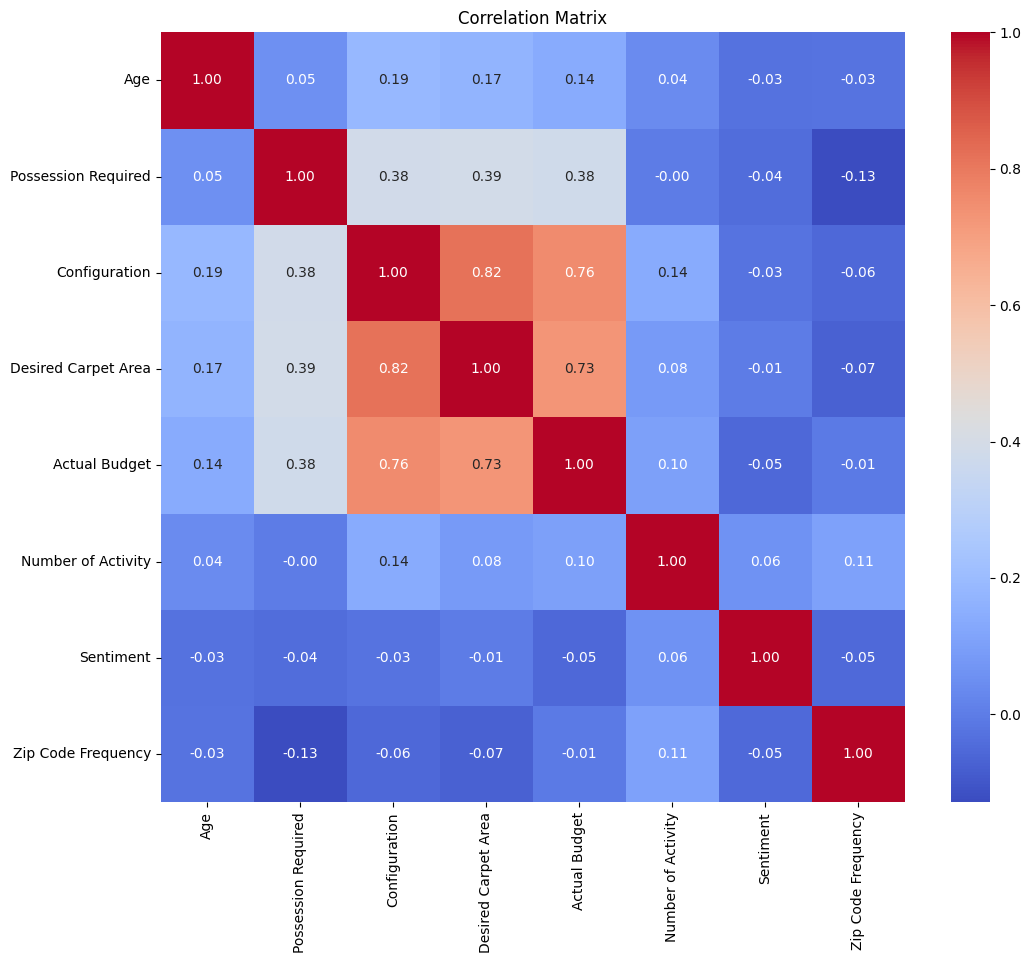

In [284]:
# Assuming 'df' is your DataFrame
# Select only numerical columns before calculating the correlation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix using only numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, SV-37487 to SV-38329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Project: Project Name     599 non-null    object  
 1   Age                       599 non-null    int64   
 2   Gender                    599 non-null    object  
 3   Nature of Purchase        599 non-null    object  
 4   Current Residential Type  599 non-null    object  
 5   Home Loan Status          599 non-null    object  
 6   Possession Required       599 non-null    int64   
 7   Configuration             599 non-null    float64 
 8   Desired Carpet Area       599 non-null    int64   
 9   Actual Budget             599 non-null    float64 
 10  Visited with Family       599 non-null    object  
 11  Number of Activity        599 non-null    int64   
 12  Lead Source               599 non-null    object  
 13  Sentiment                 599 non-null    f

In [286]:
df.describe().transpose()

count        mean         std         min         25%  \
Age                  599.0   43.273790    9.299468   24.000000   37.000000   
Possession Required  599.0   26.968280   13.410698    1.000000   12.000000   
Configuration        599.0    2.350584    0.875032    1.000000    2.000000   
Desired Carpet Area  599.0  956.010017  407.821449  500.000000  650.000000   
Actual Budget        599.0    2.882270    2.153367    0.250000    1.500000   
Number of Activity   599.0    2.789649    2.186725    1.000000    2.000000   
Sentiment            599.0    0.135983    0.317540   -0.769200    0.000000   
Zip Code Frequency   599.0    0.025376    0.023535    0.001669    0.006678   

                            50%          75%          max  
Age                   42.000000    48.000000    80.000000  
Possession Required   24.000000    36.000000    72.000000  
Configuration          2.000000     3.000000     5.000000  
Desired Carpet Area  850.000000  1200.000000  2000.000000  
Actual Budget          2.390000     3.825000    15.000000  
Number of Activity     2.000000     3.000000    18.000000  
Sentiment              0.000000     0.396900     0.916100  
Zip Code Frequency     0.018364     0.033389     0.080134

In [287]:
df['Age'].value_counts()

Age
40    49
45    38
43    36
36    27
38    27
39    26
42    26
41    25
37    22
47    22
46    20
35    20
44    18
48    18
50    16
30    16
33    14
32    13
31    13
51    12
34    11
55    11
54    10
52     9
58     8
57     8
28     7
29     7
65     7
53     6
49     6
61     5
60     5
64     5
56     4
63     4
67     4
27     3
69     3
62     3
59     3
26     3
72     2
25     2
71     2
80     1
24     1
66     1
Name: count, dtype: int64

In [288]:
# Check unique values in the Age column
print(df['Age'].unique())

[50 41 36 58 38 43 40 39 47 32 48 72 29 46 55 42 30 60 54 34 52 44 37 63
 62 49 35 45 51 31 28 69 56 33 27 26 53 61 64 25 80 59 65 24 67 71 57 66]


In [289]:
# Replace any non-numeric values with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Now you can fill missing values with the median age (optional)
df['Age'] = df['Age'].fillna(df['Age'].median())


In [290]:
# Ensure Age column is now numeric
df['Age'] = pd.to_numeric(df['Age'])

In [291]:
df['Age'].unique()

array([50, 41, 36, 58, 38, 43, 40, 39, 47, 32, 48, 72, 29, 46, 55, 42, 30,
       60, 54, 34, 52, 44, 37, 63, 62, 49, 35, 45, 51, 31, 28, 69, 56, 33,
       27, 26, 53, 61, 64, 25, 80, 59, 65, 24, 67, 71, 57, 66])

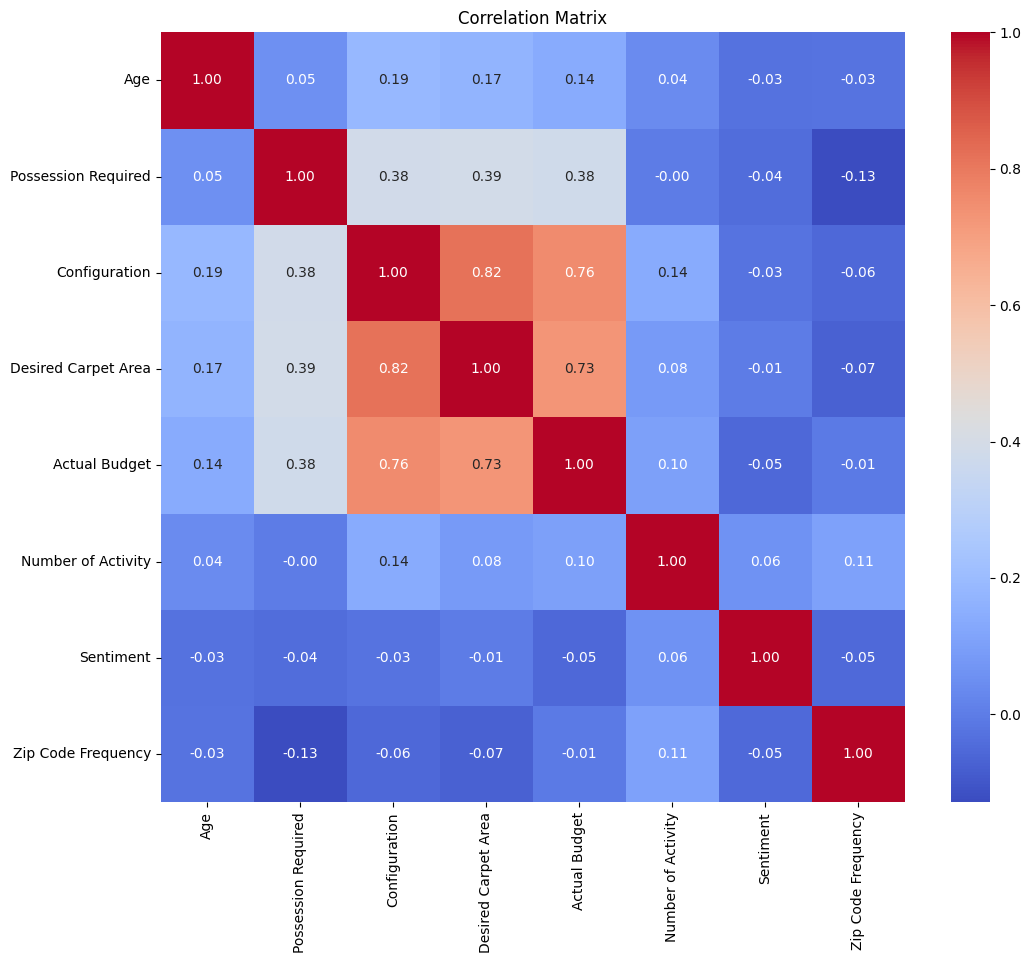

In [292]:
# Select only numerical columns before calculating the correlation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix using only numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [293]:
# List of categorical columns
categorical_columns = ['Project: Project Name','Gender', 'Nature of Purchase', 'Current Residential Type', 'Home Loan Status',
                       'Visited with Family', 'Lead Source','Sentiment_Label','Walkin Month',
       'Walkin Day of Week']
# 'Stage'
# Apply One-Hot Encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()

Age  Possession Required  Configuration  Desired Carpet Area  \
Site Visit Name                                                                 
SV-37487          50                   24            3.0                 1050   
SV-37488          41                   12            2.0                  550   
SV-37489          36                   36            3.0                 1250   
SV-37490          58                   12            2.0                  500   
SV-37493          38                   12            1.0                  500   

                 Actual Budget  Number of Activity  Sentiment  \
Site Visit Name                                                 
SV-37487                  4.00                   5     0.1531   
SV-37488                  1.49                   8     0.5574   
SV-37489                  5.03                   2     0.4215   
SV-37490                  1.50                   3     0.0000   
SV-37493                  0.60                   1     0.2263   

                 Zip Code Frequency  Project: Project Name_Elixir Reserve  \
Site Visit Name                                                             
SV-37487                   0.006678                                  True   
SV-37488                   0.003339                                 False   
SV-37489                   0.026711                                 False   
SV-37490                   0.080134                                 False   
SV-37493                   0.001669                                 False   

                 Project: Project Name_Island Cove  ...  Walkin Month_9.0  \
Site Visit Name                                     ...                     
SV-37487                                     False  ...             False   
SV-37488                                     False  ...             False   
SV-37489                                     False  ...             False   
SV-37490                                     False  ...             False   
SV-37493                                     False  ...             False   

                 Walkin Month_10.0  Walkin Month_11.0  Walkin Month_12.0  \
Site Visit Name                                                            
SV-37487                     False              False              False   
SV-37488                     False              False              False   
SV-37489                     False              False              False   
SV-37490                     False              False              False   
SV-37493                     False              False              False   

                 Walkin Day of Week_1.0  Walkin Day of Week_2.0  \
Site Visit Name                                                   
SV-37487                           True                   False   
SV-37488                           True                   False   
SV-37489                           True                   False   
SV-37490                           True                   False   
SV-37493                           True                   False   

                 Walkin Day of Week_3.0  Walkin Day of Week_4.0  \
Site Visit Name                                                   
SV-37487                          False                   False   
SV-37488                          False                   False   
SV-37489                          False                   False   
SV-37490                          False                   False   
SV-37493                          False                   False   

                 Walkin Day of Week_5.0  Walkin Day of Week_6.0  
Site Visit Name                                                  
SV-37487                          False                   False  
SV-37488                          False                   False  
SV-37489                          False                   False  
SV-37490                          False                   False  
SV-37493                          False     

In [294]:
df.columns

Index(['Project: Project Name', 'Age', 'Gender', 'Nature of Purchase',
       'Current Residential Type', 'Home Loan Status', 'Possession Required',
       'Configuration', 'Desired Carpet Area', 'Actual Budget',
       'Visited with Family', 'Number of Activity', 'Lead Source', 'Sentiment',
       'Sentiment_Label', 'Zip Code Frequency', 'Walkin Month',
       'Walkin Day of Week'],
      dtype='object')

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [296]:
X = df

In [297]:
# # Assuming 'Target' is the column you're predicting
# X = df.drop(columns=['Stage'])  # Features
# y = df['Stage']  # Target variable


In [298]:
from sklearn.preprocessing import LabelEncoder

In [299]:
# categorical_cols = X.select_dtypes(include=['object']).columns

# # Create a LabelEncoder for each categorical column
# for col in categorical_cols:
#     le = LabelEncoder()
#     # Fit the encoder on the training data and transform both train and test data
#     X[col] = le.fit_transform(X[col])
#     # If you have a separate X_test, you would transform it as well:
#     # X_test[col] = le.transform(X_test[col])
#     if col in X.columns:
#         X[col] = le.transform(X[col])


In [300]:
# vishal = vishal.drop(columns=['Stage'])

In [302]:
# savex = X.copy()
# savey = y.copy()

In [303]:
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a LabelEncoder for each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    # Fit the encoder on the training data and transform the data
    X[col] = le.fit_transform(X[col])
    # The following line is redundant and causes the error, so it is removed
    # if col in X.columns:
    #    X[col] = le.transform(X[col])

In [304]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [305]:
# savex_train, savex_test, savey_train, savey_test = train_test_split(vishal, savey, test_size = 0.2, random_state = 42)

In [306]:
# # prompt: Apply lazyregressor to check accuracy of all possible models

# !pip install lazypredict

# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split

# # Assuming X and y are your feature matrix and target variable
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize LazyClassifier
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# # Fit and predict using all possible models
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# # Print the results (accuracy, time taken, etc.) for all models
# models

BaggingClassifier	0.94	0.84	None	0.94	0.74
DecisionTreeClassifier	0.91	0.82	None	0.91	0.21
RandomForestClassifier	0.95	0.81	None	0.95	1.75
ExtraTreesClassifier   0.91	0.81	None	0.91	0.11

In [307]:
# lazypredict/Supervised.py (modified lines)
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# ... other code ...
categorical_transformer_low = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("encoding", OneHotEncoder(handle_unknown="ignore", sparse_output=False)), # Changed line
    ]
)
# ... other code ...

In [308]:
# print(X_train)

In [309]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [310]:
# print(X_train.columns)

In [311]:
# print(y_test.name)

In [312]:
# !pip install lightgbm

In [313]:
# import lightgbm as lgb
# from lightgbm import LGBMClassifier

In [314]:
# # Initialize the LGBMClassifier
# lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)

In [315]:
# from sklearn.ensemble import RandomForestClassifier

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [316]:
# df.columns

In [317]:
# df['Project: Project Name'].value_counts()

In [318]:
# df['Project: Project Name'].unique()

In [319]:
import joblib

loaded_model = joblib.load(open(r'C:\Users\lti-10761456\Desktop\Marketing.Ai_New\Model_pred\app\rf_model (1).pkl', 'rb'))
loaded_model


RandomForestClassifier(random_state=42)

In [320]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [321]:
X.shape


(599, 18)

In [322]:
X.columns

Index(['Project: Project Name', 'Age', 'Gender', 'Nature of Purchase',
       'Current Residential Type', 'Home Loan Status', 'Possession Required',
       'Configuration', 'Desired Carpet Area', 'Actual Budget',
       'Visited with Family', 'Number of Activity', 'Lead Source', 'Sentiment',
       'Sentiment_Label', 'Zip Code Frequency', 'Walkin Month',
       'Walkin Day of Week'],
      dtype='object')

In [323]:
X

Project: Project Name  Age  Gender  Nature of Purchase  \
Site Visit Name                                                           
SV-37487                             1   50       0                   1   
SV-37488                             0   41       1                   1   
SV-37489                             6   36       1                   0   
SV-37490                             0   58       1                   1   
SV-37493                             0   38       1                   1   
...                                ...  ...     ...                 ...   
SV-38321                             5   46       1                   1   
SV-38324                             0   62       1                   1   
SV-38326                             3   40       0                   0   
SV-38327                             3   47       1                   1   
SV-38329                             2   41       1                   1   

                 Current Residential Type  Home Loan Status  \
Site Visit Name                                               
SV-37487                                0                 2   
SV-37488                                0                 2   
SV-37489                                1                 1   
SV-37490                                0                 2   
SV-37493                                0                 2   
...                                   ...               ...   
SV-38321                                0                 2   
SV-38324                                1                 2   
SV-38326                                0                 1   
SV-38327                                0                 2   
SV-38329                                0                 1   

                 Possession Required  Configuration  Desired Carpet Area  \
Site Visit Name                                                            
SV-37487                          24            3.0                 1050   
SV-37488                          12            2.0                  550   
SV-37489                          36            3.0                 1250   
SV-37490                          12            2.0                  500   
SV-37493                          12            1.0                  500   
...                              ...            ...                  ...   
SV-38321                          24            2.0                 1200   
SV-38324                          24            1.0                  500   
SV-38326                          48            2.0                  700   
SV-38327                          24            2.0                 1200   
SV-38329                          36            3.0                 2000   

                 Actual Budget  Visited with Family  Number of Activity  \
Site Visit Name                                                           
SV-37487                  4.00                    0                   5   
SV-37488                  1.49                    1                   8   
SV-37489                  5.03                    0                   2   
SV-37490                  1.50                    0                   3   
SV-37493                  0.60                    1                   1   
...                        ...                  ...                 ...   
SV-38321                  2.00                    0                   1   
SV-38324                  0.79                    0                   2   
SV-38326                  1.76                    0                   2   
SV-38327                  2.00                    1                   2   
SV-38329                  3.35                    1                   2   

                 Lead Source  Sentiment  Sentiment_Label  Zip Code Frequency  \
Site Visit Name                                                                
SV-37487                   0     0.1531                2            0.006678   
SV-37488        

In [324]:
X.dtypes

Project: Project Name          int64
Age                            int64
Gender                         int64
Nature of Purchase             int64
Current Residential Type       int64
Home Loan Status               int64
Possession Required            int64
Configuration                float64
Desired Carpet Area            int64
Actual Budget                float64
Visited with Family            int64
Number of Activity             int64
Lead Source                    int64
Sentiment                    float64
Sentiment_Label                int64
Zip Code Frequency           float64
Walkin Month                category
Walkin Day of Week          category
dtype: object

In [325]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [326]:
X.columns

Index(['Project: Project Name', 'Age', 'Gender', 'Nature of Purchase',
       'Current Residential Type', 'Home Loan Status', 'Possession Required',
       'Configuration', 'Desired Carpet Area', 'Actual Budget',
       'Visited with Family', 'Number of Activity', 'Lead Source', 'Sentiment',
       'Sentiment_Label', 'Zip Code Frequency', 'Walkin Month',
       'Walkin Day of Week'],
      dtype='object')

In [327]:
loaded_model

RandomForestClassifier(random_state=42)

In [328]:
predictions = loaded_model.predict(X)

In [329]:
X.head(1)

Project: Project Name  Age  Gender  Nature of Purchase  \
Site Visit Name                                                           
SV-37487                             1   50       0                   1   

                 Current Residential Type  Home Loan Status  \
Site Visit Name                                               
SV-37487                                0                 2   

                 Possession Required  Configuration  Desired Carpet Area  \
Site Visit Name                                                            
SV-37487                          24            3.0                 1050   

                 Actual Budget  Visited with Family  Number of Activity  \
Site Visit Name                                                           
SV-37487                   4.0                    0                   5   

                 Lead Source  Sentiment  Sentiment_Label  Zip Code Frequency  \
Site Visit Name                                                                
SV-37487                   0     0.1531                2            0.006678   

                Walkin Month Walkin Day of Week  
Site Visit Name                                  
SV-37487                 4.0                1.0

In [330]:
predictions

array(['In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeli

In [331]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming X is your preprocessed data and loaded_model is your loaded model
# Replace 'your_preprocessed_data.csv' with the actual file path
# X = pd.read_csv('your_preprocessed_data.csv')

# Assuming X is already a DataFrame
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
print(X)
# Make predictions
predictions = loaded_model.predict(X)

predictions

                 Project: Project Name  Age  Gender  Nature of Purchase  \
Site Visit Name                                                           
SV-37487                             1   50       0                   1   
SV-37488                             0   41       1                   1   
SV-37489                             6   36       1                   0   
SV-37490                             0   58       1                   1   
SV-37493                             0   38       1                   1   
...                                ...  ...     ...                 ...   
SV-38321                             5   46       1                   1   
SV-38324                             0   62       1                   1   
SV-38326                             3   40       0                   0   
SV-38327                             3   47       1                   1   
SV-38329                             2   41       1                   1   

                 Current

array(['In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeline',
       'In Pipeline', 'In Pipeline', 'In Pipeline', 'In Pipeli

In [332]:
probabilities = loaded_model.predict_proba(X)

# Format probabilities into percentages with a '%' sign
predictions_df = pd.DataFrame({
    'Prediction': predictions,
    'Probability_0(Booking)': [f"{p*100:.2f}%" for p in probabilities[:, 0]],  # Probability of class 0
    'Probability_1(In pipeline)': [f"{p*100:.2f}%" for p in probabilities[:, 1]]  # Probability of class 1
}, index=X.index)  # Use the original index of your data

predictions_df


Prediction Probability_0(Booking) Probability_1(In pipeline)
Site Visit Name                                                               
SV-37487         In Pipeline                  8.00%                     92.00%
SV-37488         In Pipeline                 16.00%                     84.00%
SV-37489         In Pipeline                  0.00%                    100.00%
SV-37490         In Pipeline                  3.00%                     97.00%
SV-37493         In Pipeline                 13.00%                     87.00%
...                      ...                    ...                        ...
SV-38321         In Pipeline                  0.00%                    100.00%
SV-38324         In Pipeline                  6.00%                     94.00%
SV-38326         In Pipeline                  1.00%                     99.00%
SV-38327         In Pipeline                  1.00%                     99.00%
SV-38329         In Pipeline                  9.00%                     91.00%

[599 rows x 3 columns]

In [333]:
# Save the DataFrame to an Excel file
predictions_df.to_excel('predictions_trail_5.xlsx', index=True)

mdskfdnmsfkdsanfjksdnfvdasjknvjkvn

In [334]:
uyigyuwegfwigf

NameError: name 'uyigyuwegfwigf' is not defined

In [239]:
# ijfimport pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # # Assuming X_train is a pandas DataFrame
# # # Identify the categorical columns
# # categorical_cols = X_train.select_dtypes(include=['object']).columns

# # # Create a LabelEncoder for each categorical column
# # for col in categorical_cols:
# #     le = LabelEncoder()
# #     # Fit the encoder on the training data and transform both train and test data
# #     X_train[col] = le.fit_transform(X_train[col])
# #     # If you have a separate X_test, you would transform it as well:
# #     # X_test[col] = le.transform(X_test[col])
# #     if col in X_test.columns:
# #         X_test[col] = le.transform(X_test[col])

# # Now you can fit the RandomForestClassifier
# rf.fit(X_train, y_train)

In [240]:
# Predict the target variable for the test set
y_pred = rf.predict(X)

NameError: name 'rf' is not defined

In [ ]:
print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report (includes precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
# new_X_test = pd.DataFrame(X_test, columns=X_train.columns)
y_pred_proba = rf.predict_proba(X_test)

# 3. Format as percentages
for i in range(len(y_test)):
    predicted_class = rf.predict([X_test.iloc[i]])[0] # Predict class
    probabilities = y_pred_proba[i] # Get probabilities for all classes

    # Find probability of the predicted class
    predicted_class_index = rf.classes_.tolist().index(predicted_class)
    predicted_probability = probabilities[predicted_class_index]

    print(f"Sample {i}: Predicted Class = {predicted_class}, Probability = {predicted_probability * 100:.2f}%")

In [ ]:
# Assuming y_pred contains the predicted classes and y_test contains the true classes
# Iterate through the predictions and print the corresponding cases when the prediction is 'Booked'
for i in range(len(y_pred)):
    if y_pred[i] == 'Booked':
        print(f"Sample {i}: Predicted Class = Booked, True Class = {y_test.iloc[i]}")
        # You can optionally access the corresponding features in X_test using X_test.iloc[i]
        # to get a better understanding of the prediction.

In [ ]:
# Assuming y_pred contains the predicted classes and y_test contains the true classes
# Iterate through the predictions and print the corresponding cases when the prediction is 'Booked'
for i in range(len(y_pred)):
    if y_pred[i] == 'Booked':
        predicted_class_index = rf.classes_.tolist().index('Booked')
        predicted_probability = y_pred_proba[i][predicted_class_index]
        print(f"Sample {i}: Predicted Class = Booked, True Class = {y_test.iloc[i]}, Probability = {predicted_probability * 100:.2f}%")
        # You can optionally access the corresponding features in X_test using X_test.iloc[i]
        # to get a better understanding of the prediction.

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i] == 'Booked':
        predicted_class_index = rf.classes_.tolist().index('Booked')
        predicted_probability = y_pred_proba[i][predicted_class_index]
        print(f"Sample {i}: Predicted Class = Booked, True Class = {y_test.iloc[i]}, Probability = {predicted_probability * 100:.2f}%")
        # You can optionally access the corresponding features in X_test using X_test.iloc[i]
        # to get a better understanding of the prediction.
        print("X_test for this sample:", savex_test.iloc[i])

In [ ]:
import pandas as pd

# List to store the results
results = []

for i in range(len(y_pred)):
    if y_pred[i] == 'Booked':
        predicted_class_index = rf.classes_.tolist().index('Booked')
        predicted_probability = y_pred_proba[i][predicted_class_index]

        # Store the relevant data in a dictionary
        result = {
            'Sample': i,
            'Predicted Class': 'Booked',
            'True Class': y_test.iloc[i],
            'Probability (%)': f"{predicted_probability * 100:.2f}",
            # 'X_test': savex_test.iloc[i].to_dict()  # Convert X_test features to dictionary format
            # 'X_test': savex_test.iloc[i]  # Convert X_test features to dictionary format
        }
        result.update(savex_test.iloc[i].to_dict())
        # Append the result to the list
        results.append(result)

# Convert the list of results into a pandas DataFrame
df_results = pd.DataFrame(results)

# Save the DataFrame to an Excel file
df_results.to_excel("predicted_results+.xlsx", index=False)

print("Results saved to predicted_results+.xlsx")


In [ ]:
# Assuming y_pred contains the predicted classes and y_test contains the true classes
# Iterate through the predictions and print the corresponding cases when the prediction is 'Booked'
for i in range(len(y_pred)):
    if y_pred[i] == 'Booked':
        predicted_class_index = rf.classes_.tolist().index('Booked')
        predicted_probability = y_pred_proba[i][predicted_class_index]
        print(f"Sample {i}: Predicted Class = Booked, True Class = {y_test.iloc[i]}, Probability = {predicted_probability * 100:.2f}%")
        # You can optionally access the corresponding features in X_test using X_test.iloc[i]
        # to get a better understanding of the prediction.
        print("X_test for this sample:", X_test.iloc[i])

In [ ]:
print(X_test.iloc[0])

In [ ]:
X_test.loc['SV-27664']

In [ ]:
rf.predict([X_test.loc['SV-27664']])

In [ ]:
rf.predict_proba([X_test.loc['SV-27664']])

In [ ]:
rf.predict([X_test.iloc[0]])

In [ ]:
rf.predict_proba([X_test.iloc[0]])

In [ ]:

def get_row_number_for_site(x_test, site_number_index):
  """
  Counts the row number for a given x_test DataFrame and site number index.
  Args:
    x_test: The DataFrame containing the site visit information.
    site_number_index: The index or value to search for within the x_test.
  Returns:
    The row number in the DataFrame for the specified site number index, or -1 if not found.
  """
  try:
    # Find the row index where the specified site number index exists
    row_number = x_test[x_test.index == site_number_index].index[0]
    return row_number
  except IndexError:
    return -1  # Return -1 if the site number index is not found

# Assuming X_test and y_test are loaded from your previous code
# SV-27664 is your site number index you need to find a row number for
site_number_index = 'SV-27664'
row_number = get_row_number_for_site(X_test, site_number_index)

if row_number != -1:
  print(f"The row number for site number index {site_number_index} is: {row_number}")
else:
  print(f"Site number index {site_number_index} not found in X_test.")

In [ ]:
def predict_with_index(rf, X_test, y_test, index):
  """
  Predicts the class and probability for a given index in the test data.

  Args:
    rf: The trained RandomForestClassifier model.
    X_test: The DataFrame of test features.
    y_test: The Series of true target values for the test data.
    index: The index of the row to predict.

  Returns:
    A tuple containing:
      - The predicted class.
      - The probability of the predicted class.
      - The true class.
  """
  if index not in X_test.index:
    return None, None, None

  predicted_class = rf.predict([X_test.loc[index]])[0]
  y_pred_proba = rf.predict_proba([X_test.loc[index]])[0]
  predicted_class_index = rf.classes_.tolist().index(predicted_class)
  predicted_probability = y_pred_proba[predicted_class_index]
  true_class = y_test.loc[index]

  return predicted_class, predicted_probability, true_class

# Example Usage
index_to_predict = 'SV-25497'  # Replace with the desired index
predicted_class, predicted_probability, true_class = predict_with_index(rf, X_test, y_test, index_to_predict)

if predicted_class is not None:
  print(f"Index: {index_to_predict}")
  print(f"Predicted Class: {predicted_class}, Probability: {predicted_probability * 100:.2f}%")
  print(f"True Class: {true_class}")
else:
  print(f"Invalid index: {index_to_predict}")

In [ ]:

# Get feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

In [ ]:
sum(feature_importance_df['Importance'])

In [ ]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

In [ ]:

# # Assuming you have already trained your RandomForestClassifier (rf) and have X_test and y_test

# y_pred_proba = rf.predict_proba(X_test)  # Get probabilities for all classes

# # Iterate through the test data and print the predicted class and its probability
# for i in range(len(y_test)):
#     predicted_class = rf.predict([X_test.iloc[i]])[0]  # Predict class
#     probabilities = y_pred_proba[i]  # Get probabilities for all classes

#     # Find the probability of the predicted class
#     predicted_class_index = list(rf.classes_).index(predicted_class)
#     predicted_probability = probabilities[predicted_class_index]

#     print(f"Sample {i}: Predicted Class = {predicted_class}, Probability = {predicted_probability * 100:.2f}%")

In [ ]:
# # Replace 'original_column_name_1', 'original_column_name_2', etc. with the actual
# # column names used during training.
# # Similarly, replace 'X_test_column_1', 'X_test_column_2', etc., with the actual
# # column names in your X_test DataFrame.

# X_test = X_test.rename(columns={
#     'X_test_column_1': 'original_column_name_1',
#     'X_test_column_2': 'original_column_name_2',
#     'Actual_Budget': 'Actual Budget',
#     'Current_Residential_Type': 'Current Residential Type',
#     'Days_Since_Start_Scaled': 'Days Since Start Scaled',
#     'Desired_Carpet_Area': 'Desired Carpet Area',
#     'Home_Loan_Status': 'Home Loan Status'
#     # ... Add more column mappings as needed ...
# })

# # Now, try your prediction again:
# y_pred_proba = rf.predict_proba(X_test)
# print(y_pred_proba)

In [ ]:
# # Replace 'original_column_name_1', 'original_column_name_2', etc. with the actual
# # column names used during training.
# # Similarly, replace 'X_test_column_1', 'X_test_column_2', etc., with the actual
# # column names in your X_test DataFrame.
# # The error message shows the unseen and missing feature names. Use this to guide your changes

# X_test = X_test.rename(columns={
#     'Lead_Source': 'Lead Source',  # Example: Replacing underscore with space
#     'Nature_of_Purchase': 'Nature of Purchase',
#     'Number_of_Activity': 'Number of Activity',
#     'Possession_Required': 'Possession Required',
#     'Project__Project_Name': 'Project: Project Name',
#     # ... Add more column mappings as needed to address all discrepancies ...
#     # ... based on the 'unseen' and 'missing' features listed in the error ...
# })

# # Now, try your prediction again:
# y_pred_proba = rf.predict_proba(X_test)
# print(y_pred_proba)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from lightgbm import LGBMClassifier


# Initialize the LGBMClassifier
lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Project: Project Name', 'Gender', 'Nature of Purchase', 'Current Residential Type',
                    'Home Loan Status', 'Visited with Family', 'Lead Source', 'Sentiment_Label']

# Encode the categorical features in both training and testing sets
for col in categorical_cols:
    # Fit the encoder on the training data and transform both train and test sets
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])

# Replace spaces, colons, and special characters in column names with underscores
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# Now you can fit the LGBMClassifier
lgbm.fit(X_train, y_train)

In [ ]:
# Predict the target variable for the test set
y_pred2 = lgbm.predict(X_test)


In [ ]:
y_pred_proba2 = lgbm.predict_proba(X_test)
print(y_pred_proba2)

In [ ]:
y_pred_proba2 = lgbm.predict_proba(X_test)

# 3. Format as percentages
for i in range(len(y_test)):
    predicted_class2 = lgbm.predict([X_test.iloc[i]])[0] # Predict class
    probabilities = y_pred_proba2[i] # Get probabilities for all classes

    # Find probability of the predicted class
    # Use lgbm.classes_ instead of model.classes_
    predicted_class_index2 = lgbm.classes_.tolist().index(predicted_class2)
    predicted_probability2 = probabilities[predicted_class_index2]

    print(f"Sample {i}: Predicted Class = {predicted_class2}, Probability = {predicted_probability2 * 100:.2f}%")

In [ ]:
# Iterate through the predictions and print the corresponding cases when the prediction is 'Booked'
for i in range(len(y_pred2)):
    if y_pred2[i] == 'Booked':
        predicted_class_index = lgbm.classes_.tolist().index('Booked')
        predicted_probability = y_pred_proba2[i][predicted_class_index]
        print(f"Sample {i}: Predicted Class = Booked, True Class = {y_test.iloc[i]}, Probability = {predicted_probability * 100:.2f}%")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report (includes precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred2))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for features and their importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances shown via Random_Forest')
plt.show()


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(rf, 'rf_model.pkl')

# Load the model from a file (when needed)
rf_loaded = joblib.load('rf_model.pkl')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ... (Your previous code to define lgbm, label_encoder, categorical_cols) ...

# Encode the categorical features in the original dataset X
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])  # Apply Label Encoding to X

# Replace spaces, colons, and special characters in column names with underscores
X.columns = X.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)  # Apply to X

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lgbm, X, y, cv=5, scoring='accuracy')

# ... (Rest of your code for evaluation) ...

In [ ]:
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}%")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LGBMClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = lgbm.feature_importances_

# Create a DataFrame for features and their importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances shown via LGBM')
plt.show()


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(lgbm, 'lgbm_model.pkl')

# Load the model from a file (when needed)
lgbm_loaded = joblib.load('lgbm_model.pkl')